# Boston House Price DataSet

### Eimear Butler G00364802 Machine Learning and Statistics (Dr. Ian McLoughlan)

***

## Introduction

The well known Boston DataSet is routinely used as a teaching aid. It is a natural dataset fist published in 1978 containing US census data concerning houses in various suburbs around the city of Boston. Each of the 506 data entries (suburbs) has 13 characteristics documented. All data entries, with the exception of the column titles, are numerical. 

In this Jupyter Notebook, I aim to:
-  **describe** the DataSet in more detail
-  **analyse** whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t
-  create a neural network that can **predict** the median house price based on the other variables in the dataset

In [1]:
# The packages we will be using are as follows:

import numpy as np                      #useful throughout the notebook for analysis of data
import pandas as pd                     #useful throughout the notebook for analysis & presentation of data in array form
import scipy.stats as ss                #useful throughout the notebook for analysis of data
import matplotlib.pyplot as plt         #useful throughout the notebook for visualisation of data
import seaborn as sns                   #useful throughout the notebook for visualisation of data
from tensorflow.python import keras     #useful to develop neural network and make estimations
#print(keras.__version__)
import keras as kr                      #useful to develop neural network and make estimations 
from sklearn import preprocessing as pre       #useful to prepare our data before feeding it into a neural network
from sklearn.metrics import r2_score    #useful to assess accuracy of estimations when working with linear data
import math as math                     #for any extra mathematical functions throughout the notebook

Using TensorFlow backend.


In [2]:
# This just sets the default plot size to be bigger.

plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
#The Boston Dataset it is available directly from sklearn 

from sklearn.datasets import load_boston          #https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [4]:
#or anaconda which I will use here 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv' 

df0 = pd.read_csv('C:\\ProgramData\\Anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\boston_house_prices.csv') #or boston['data'] could be used
df1 = pd.DataFrame(df0.values[1:], columns=df0.iloc[0]) # move the 'feature_names' title row to become the Pandas df title   #source: https://stackoverflow.com/questions/26147180/convert-row-to-column-header-for-pandas-dataframe
df = df1.astype(float)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
#df.isnull().sum()    # wie can also check if there are any NaN's in each column, here there are not

In [6]:
#round(df.describe(), 3) # describe is also useful function to review the overall parameters of your dataset

By calling `boston['feature_names'])` we confirm the titles for each of the columns.

Furthermore, using `boston['DESCR']` gives us the description of each feature in each suburb. 

A summary is presented below:


1. **CRIM**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- per capita crime rate by town 
+ **ZN**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of residential land zoned for lots over 25,000 sq.ft.       
+ **INDUS**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of non-retail business acres per town
+ **CHAS**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)      
+ **NOX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- nitric oxides concentration (parts per 10 million)
+ **RM**       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- average number of rooms per dwelling
+ **AGE**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- proportion of owner-occupied units built prior to 1940       
+ **DIS**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- weighted distances to five Boston employment centres        
+ **RAD**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- index of accessibility to radial highways 
+ **TAX**      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- full-value property-tax rate per \$10,000      
+ **PTRATIO**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- pupil-teacher ratio by town   
+ **B**        &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- 1000(Bk - 0.63)^2 where Bk is the proportion of [people of African American descent] by town       
+ **LSTAT**    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- % lower [lower income] status of the population
+ **MEDV**     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;- Median value of owner-occupied homes in $1000's  

## Section 1: The CHAS & MEDV Relationship

Reviewing the data presented above, I can see that the key features we are interested in during the first part of this review are displayed. The MEDV (the mean value of the homes in the suburb) and CHAS (the data documenting which suburbs are by the Charles river) will be particularly relevant to us.


The CHAS is a binary data set meaning that there is only 2 possible entries, '1' if the suburb is by the river and '0'' if it is not. This immediately presents an opportunity for us to split the data into 2 groups to compare. 

In [7]:
df_chas = df1.iloc[:,3].str.contains('1', regex=False)         #segragate the CHAS entries 
df_chas1 = pd.concat([df['MEDV'], df_chas], axis=1, sort=False)  #add them to the MEDV data column
df_chas1

chas_t = ((df_chas1[df_chas1['CHAS'] == True]).drop(['CHAS'], axis=1)) #identify those that are beside the river
chas_f = (df_chas1[df_chas1['CHAS'] == False]).drop(['CHAS'], axis=1) #and those that are not

print('The number of in scope suburbs by the Charles River are', len(chas_t), 'from 506. This set is now called chas_t')

print('The maximum price from the sample of houses close to the river is $',chas_t['MEDV'].max(),'and minimum $', chas_t['MEDV'].min())
print('The mean price is $', chas_t['MEDV'].mean(), 'while the median is $', chas_t['MEDV'].median())
print('')
print('The number of in scope suburbs NOT by the Charles River are', len(chas_f),  'from 506. This set is now called chas_f')
print('The maximum price from the sample of houses away from the river is $',chas_f['MEDV'].max(),'and minimum $', chas_f['MEDV'].min())
print ('The mean price is $', round(chas_f['MEDV'].mean(),2), 'while the median is $', chas_f['MEDV'].median())
print('')
print ('NOTE: with the high number of MEDV entries at the top end of the scale, one must suspect that the MEDV has been capped at $50k for the purpose of this dataset')

The number of in scope suburbs by the Charles River are 35 from 506. This set is now called chas_t
The maximum price from the sample of houses close to the river is $ 50.0 and minimum $ 13.4
The mean price is $ 28.44 while the median is $ 23.3

The number of in scope suburbs NOT by the Charles River are 471 from 506. This set is now called chas_f
The maximum price from the sample of houses away from the river is $ 50.0 and minimum $ 5.0
The mean price is $ 22.09 while the median is $ 20.9

NOTE: with the high number of MEDV entries at the top end of the scale, one must suspect that the MEDV has been capped at $50k for the purpose of this dataset


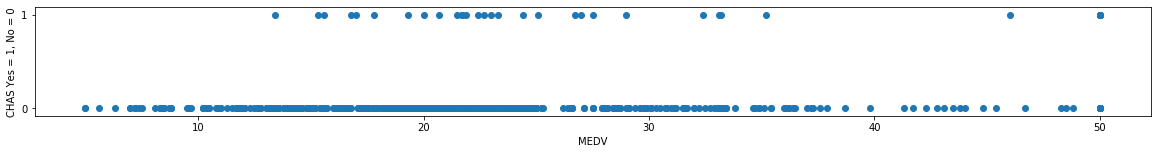

In [8]:
plt.figure(figsize=(20, 2))     #resize figure

features = ['CHAS']                 #https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
target = df['MEDV']

for i, col in enumerate(features):  #create a scatter plot showing the spread of both chas_t and chas_f vs MEDV
    plt.subplot(1, len(features) , i+1)
    x = target
    y = df[col]
    plt.scatter(x, y, marker='o')
    plt.ylabel('CHAS Yes = 1, No = 0')
    plt.yticks(np.arange(0, 1.1, 1.0))
    plt.xlabel('MEDV')

Reviewing the spread of the average prices(MEDV) across the 2 data sets (beside the Charles River (1) or not (0)), indicates that the min price of $13.4k must be geatly influencing the mean for the "beside the Charles River" data set.  


Viewing the same data in histograms again shows the difference between the 2 groups.

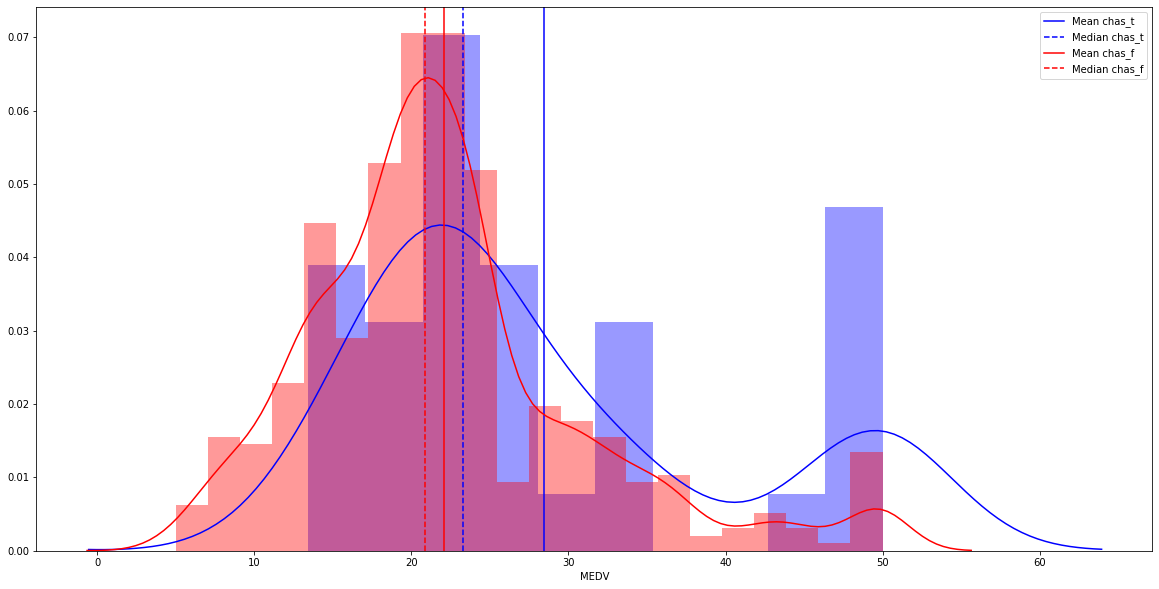

In [9]:
sns.distplot(chas_t, color='b', axlabel='MEDV', bins=10)        # houses close to the river are in blue
plt.axvline(chas_t['MEDV'].mean(), color='b', linestyle='-')    # add mean and median lines to the plot
plt.axvline(chas_t['MEDV'].median(), color='b', linestyle='--')

sns.distplot(chas_f, color='r')                                  # houses farther from the river are in red
plt.axvline(chas_f['MEDV'].mean(), color='r', linestyle='-')
plt.axvline(chas_f['MEDV'].median(), color='r', linestyle='--')

plt.legend({'Mean chas_t':chas_t['MEDV'].mean(),'Median chas_t':chas_t['MEDV'].median(), 'Mean chas_f':chas_f['MEDV'].mean(),'Median chas_f':chas_f['MEDV'].median()})

#sns.distplot(df['MEDV'], color='y', axlabel='MEDV', bins=10)     # show overall MEDV Histogram/curve

In [10]:
# Perform an independant ttest on the 2 groups to again test if they are from the same population

ss.ttest_ind(chas_t, chas_f) #source: Machine Learning Lectures, Dr. Ian McLoughlan 2019 & https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

Ttest_indResult(statistic=array([3.99643747]), pvalue=array([7.39062317e-05]))

The t=test between the 2 groups asks the question, what is the probability that the 2 sample groups are from the same overall population? Are the means of the two datasets significantly different? It assumes they are not (as per the  null hypothesis) and then tests to see if this is in fact the case. In this case the p value is extremely low and indicates that the the 2 groups are indeed different. Although they are from the same data subdivision in the dataset (CHAS) both groups are distinctly different in terms of their relationship with MEDV. A p value of >0.05 is generally needed to be seen as significantly similar. 

### What if the size of the property is a factor to consider for Charles River "affect"?
MEDV is a curious feature as it appears to be a median value for properties in each suburb not taking into account the average size of homes. After location, the size or quality of the building are surely the biggest factors influencing price. 

As we do have a column that is an inidicator of size, the average number of rooms per dwelling (RM), I will divide the total price by the average number of rooms to get an indicative "square metre price" and use it test the 2 groups again. 

In [11]:
#create a subset df of the remevant data
df_sm = df.filter(items=['CHAS', 'RM','MEDV'])
df_sm2 =  df_sm.MEDV / df_sm.RM 

#add a new column where MEDV has been divided by RM
df_sm3 = pd.concat([df_sm, df_sm2], axis=1, sort=False).drop(['RM', 'MEDV'], axis=1)
df_sm3.columns = ('CHAS', 'SMEst') #SME for Square Metre estimate
#df_sm3

#split the groups again into beside the Charles river and not
sme_t = (df_sm3[df_sm3['CHAS'] == 0].drop(['CHAS'], axis=1))
sme_f = (df_sm3[df_sm3['CHAS'] == 1].drop(['CHAS'], axis=1))

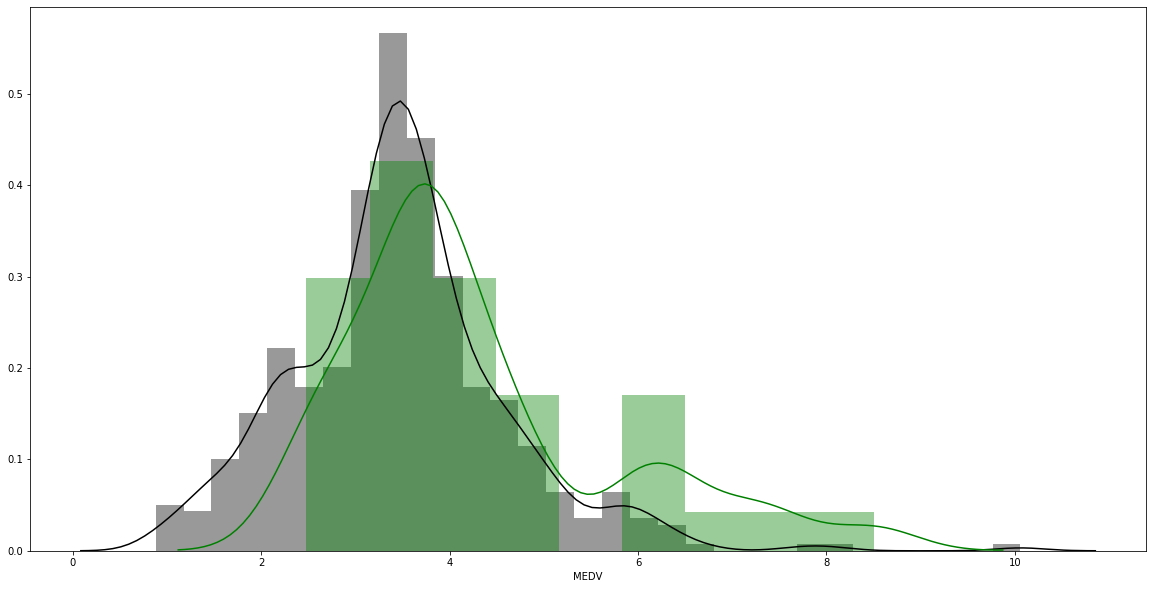

In [12]:
#plot each group's MEDV proces on a histogram
sns.distplot(sme_t, color='k', axlabel='MEDV') # house MEDV prices close to the river are in black
sns.distplot(sme_f, color='g') # house MEDV prices farther from the river are in green

In [13]:
#perform a t-test on the 2 datasets
ss.ttest_ind(sme_t, sme_f)

Ttest_indResult(statistic=array([-4.03428532]), pvalue=array([6.32638216e-05]))

Unfortnately the P value is still not close enough indicating that the RM size is not a factor for the difference in MEDV price.  

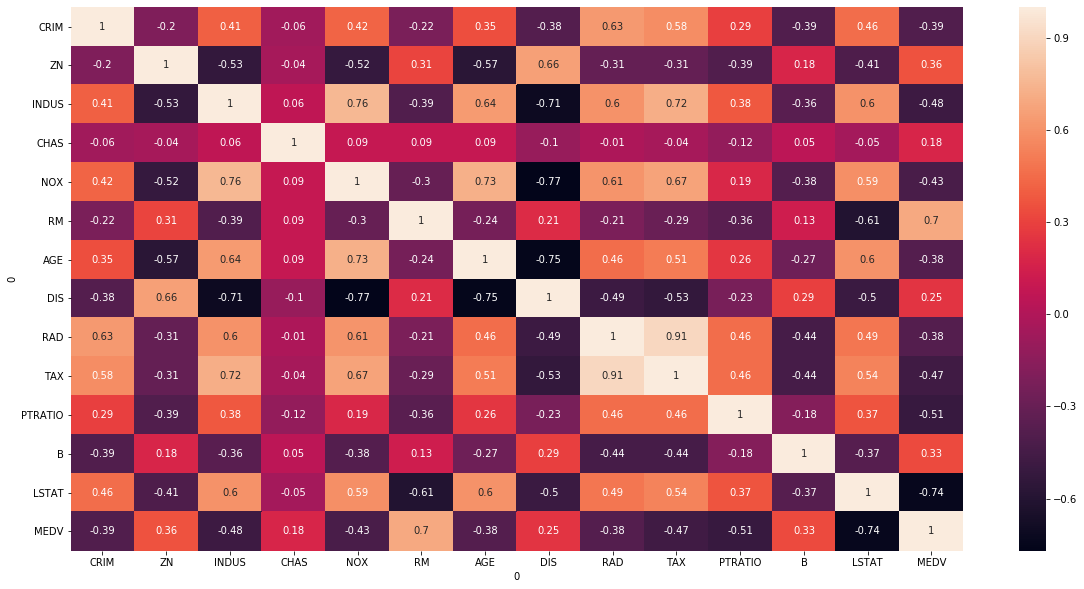

In [14]:
# Plot a heatmap to review correlations further:

correlation_matrix = df.corr().round(2) # Source: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
sns.heatmap(data=correlation_matrix, annot=True) # annot = True to print the values inside the square

# The following additional code is added to resolve a known bug while displaying the heatmap source: https://github.com/mwaskom/seaborn/issues/1773
b, t = plt.ylim()    # discover the values for bottom and top 
b += 0.5             # Add 0.5 to the bottom
t -= 0.5             # Subtract 0.5 from the top
plt.ylim(b, t)       # update the ylim(bottom, top) values
plt.show() 

> "The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there  is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation." 

Source: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

As per the above quote, very dark (close to -1) show a strong negative correlation or very light areas (close to 1) a strong positive correlation.  For example, the strongest positive correlation between RAD and TAX is seen with a score of 0.91. This means the suburbs with the most accessibility to radial highways are more likely to pay the full-value property-tax rate per $10,000.

In the case of CHAS and MEDV, a score of 0.18 is assigned indicating that there is a slight positive correlation between the 2 characteristics. The influence of the 35 suburbs of 506 by the Charles River are indeed influencing the overall connection between CHAS and MEDV. It should also be noted that CHAS does not have any very strong correlations with the other characteristics and MEDV is in fact the strongest.

This heatmap shows us other interesting correlations too which will move onto next. 

## Section 2 - Broader Analysis of the Dataset 

As we broaden our view of the dataset we notice other characteristics that have stronger correlations with MEDV. RM has a strong positive correlation at 0.7 while LSTAT has a strong negative correlation at -0.74. 

This is interesting as we move onto trying to predict the MEDV using a select number of other features programmed into a neural network. From the heatmap ‘RM’, ‘LSTAT’, ‘PTRATIO’, 'AGE', 'DIS', 'RAD', 'TAX' and ‘MEDV’ are the most interesting parameters to consider.  

From my reading, I know I should not pick similarly correlated (multicollinearity<sup>2</sup>) features for machine learning, so RM or LSTAT and AGE or DIS should only be considered.

With this in mind, I will first eatablish if RM (0.7) or LSTAT (-0.74) are the stronger candidate and then consider PTRATIO (-0.51) as it is the next strongest correlation for MEDV.



<sup>2</sup> https://stats.stackexchange.com/questions/1149/is-there-an-intuitive-explanation-why-multicollinearity-is-a-problem-in-linear-r/1150#1150

In [15]:
# Correlation chart for the most relevant parameters for further analysis 

#cols = ['MEDV', 'LSTAT', 'RM','TAX', 'RAD', 'PTRATIO', 'AGE', 'DIS']
#round(df[cols].corr(), 2)

The below pairplots confirm the positive and negative relationships particularly between MEDV and LSTAT, RM and PTRATIO.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


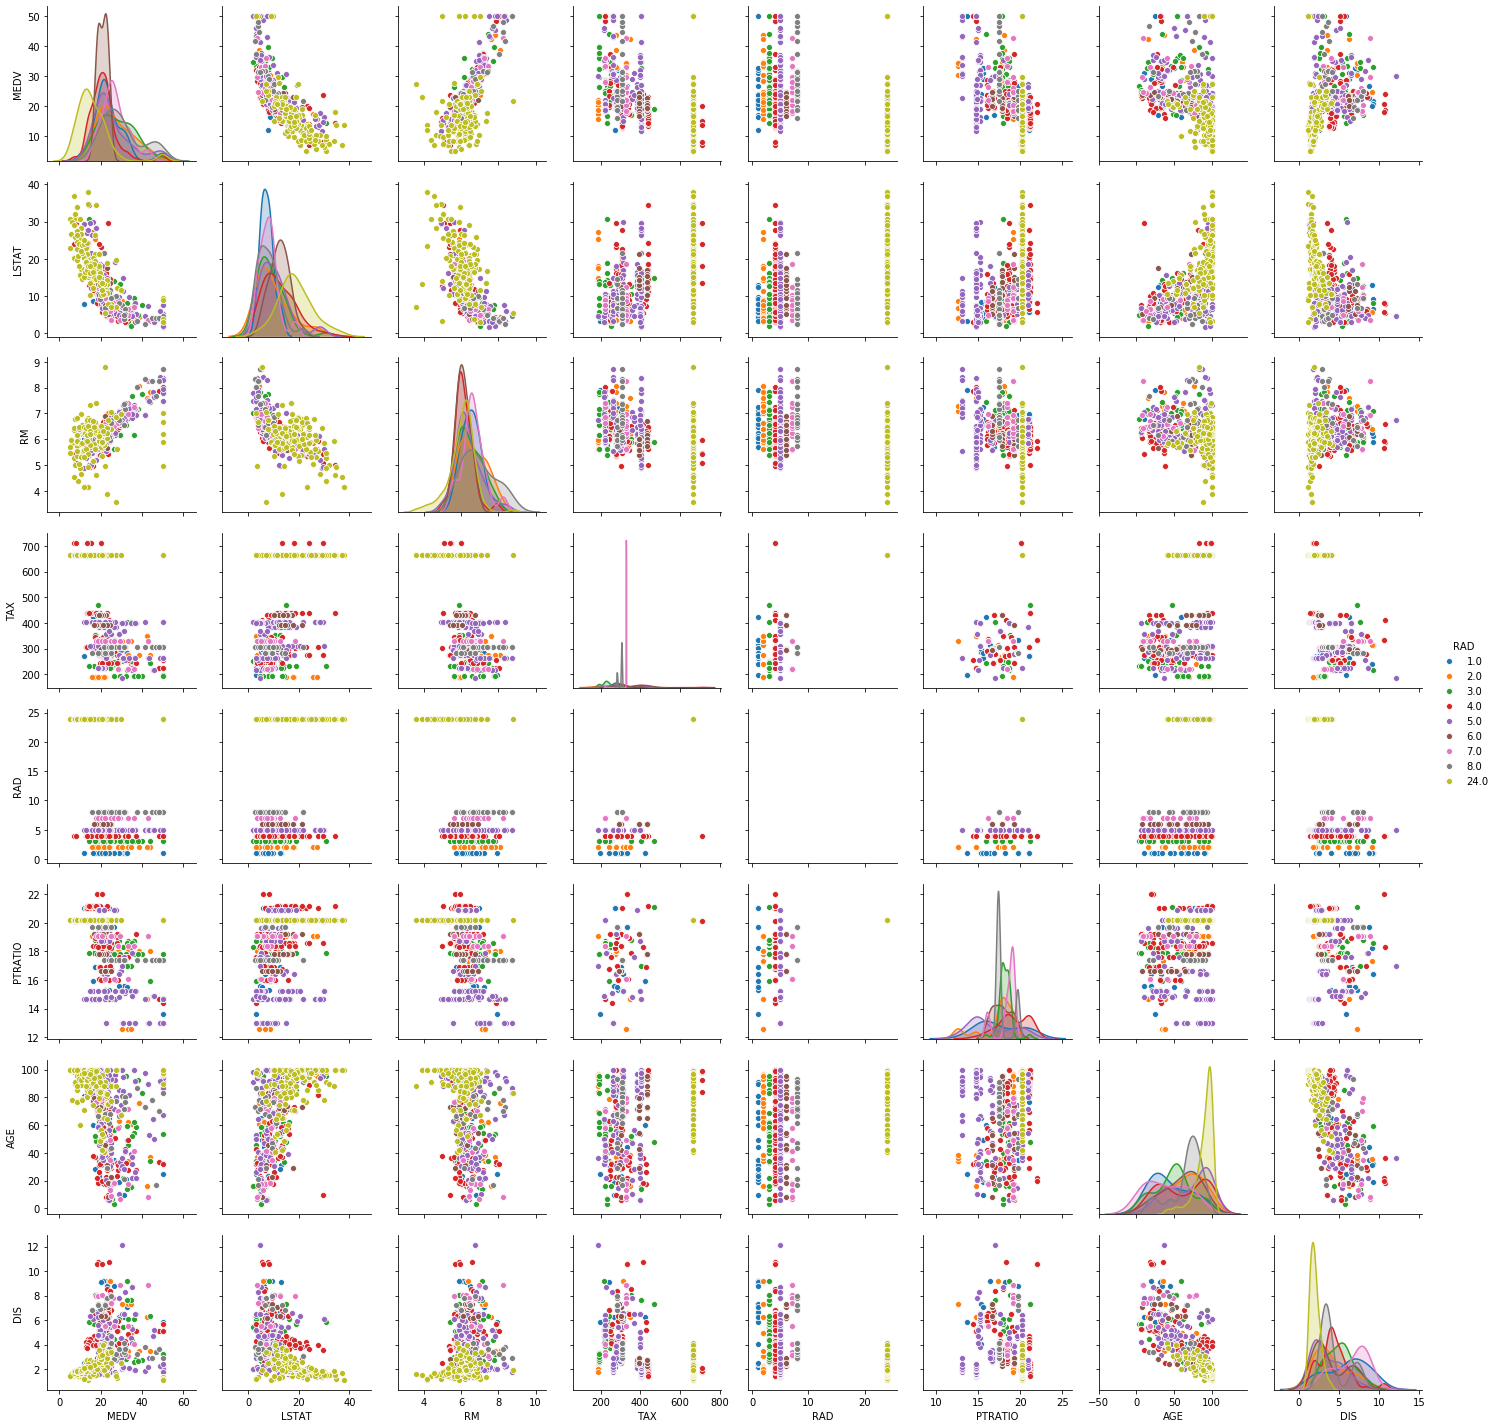

In [16]:
# Create pairplots to give an overview of the data to see if any possible trends are visable, particularly those identified in the heatmap previously

sns.pairplot(df[['MEDV', 'LSTAT', 'RM','TAX', 'RAD', 'PTRATIO', 'AGE', 'DIS']], hue='RAD') #create grid of plots where each variable is compared and colours determine the property type 
#sns.pairplot(df[['MEDV', 'LSTAT', 'RM','TAX', 'RAD', 'PTRATIO', 'AGE', 'DIS']]) 

#Source:https://seaborn.pydata.org/generated/seaborn.pairplot.html

---------

## Section 3: Further Investigation LSTAT vs MDEV and RM vs MDEV 

### Trialing LSTAT & RM Lines for BestFit 

First lets use the numpy polyfit to find thebest fit striaght line for these data sets and visualise the results.

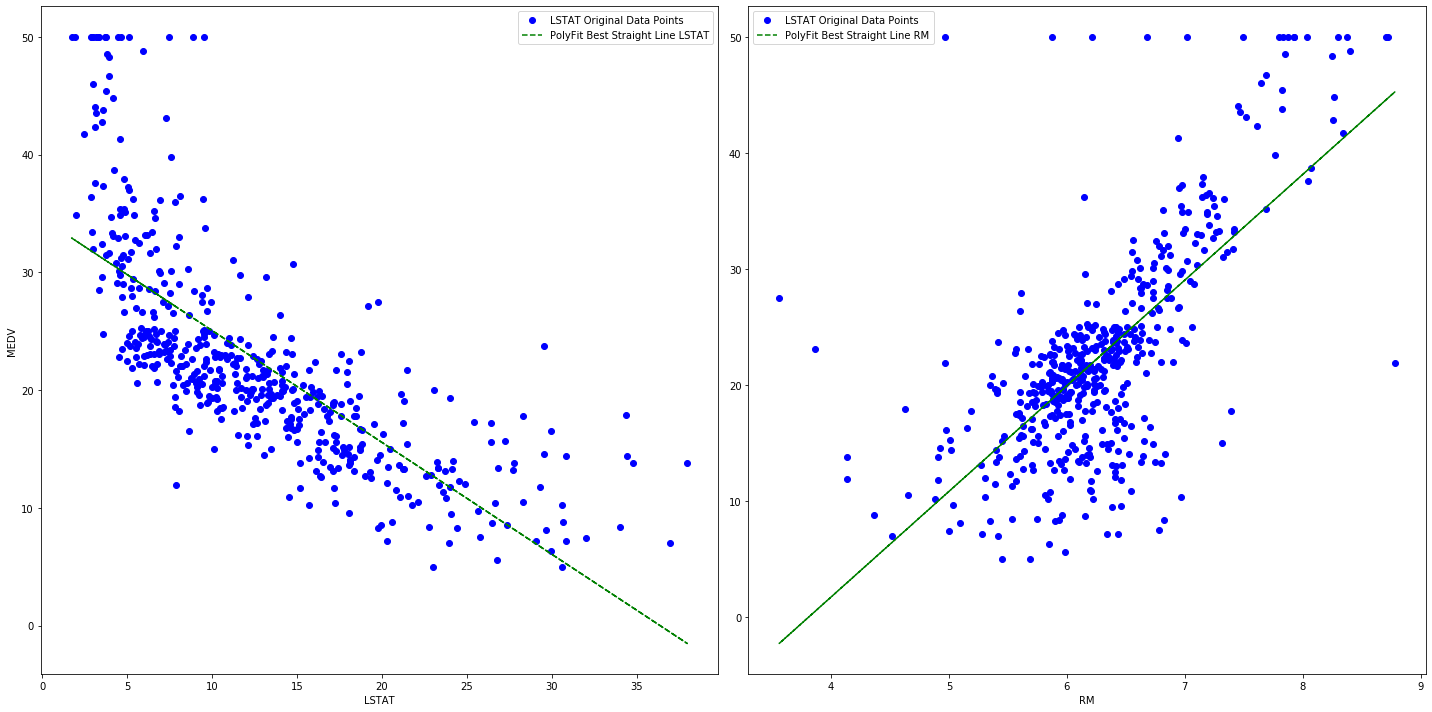

In [17]:
x_dfRM = df['RM']
y_dfRM = df['MEDV']
plt.subplot(1, 2, 2)                                                 #source:https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python
plt.plot(x_dfRM,y_dfRM, 'bo',  label='LSTAT Original Data Points')   #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
z_dfRM= np.polyfit(x_dfRM, y_dfRM, 1)
pRM = np.poly1d(z_dfRM)                                              #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial

plt.plot(x_dfRM,pRM(x_dfRM),"g--", label='PolyFit Best Straight Line RM') #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
plt.xlabel('RM')
plt.ylabel('')
plt.legend()
#where the resuting m and c are values in the equation of a straight line (y=mx+c)
#pRM  # Y = 9.10210898 x + (-34.67062078)

############################################

x_df2 = df['LSTAT']
y_df2 = df['MEDV']

plt.subplot(1, 2, 1)
plt.plot(x_df2,y_df2, 'bo', label='LSTAT Original Data Points')   
z_df2= np.polyfit(x_df2, y_df2, 1)
p2 = np.poly1d(z_df2) 

plt.plot(x_df2,p2(x_df2),"g--", label='PolyFit Best Straight Line LSTAT')

plt.xlabel('LSTAT')
plt.ylabel('MEDV')

#where the resuting m and c are values in the equation of a straight line (y=mx+c)
#p2  # Y = -0.95004935x + 34.55384088

#############################################

plt.tight_layout()
plt.legend()
plt.show()


In [18]:
# or in seaborn with 95% confidence intervals https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset

#fig, ax = plt.subplots(1, 2)
#sns.regplot('LSTAT', 'MEDV', df, ax=ax[1], ci=95, scatter_kws={'alpha': 0.4})
#sns.regplot('RM', 'MEDV', df, ax=ax[0], ci=95, scatter_kws={'alpha': 0.4})

>"It [R<sup>2</sup>] provides a measure of how well observed outcomes are replicated by the model, based on the proportion of total variation of outcomes explained by the model"

Source: https://en.wikipedia.org/wiki/Coefficient_of_determination



>"The standard error of the mean, also called the standard deviation of the mean, is a method used to estimate the standard deviation of a sampling distribution." 

Source: https://explorable.com/standard-error-of-the-mean

![alt text](https://explorable.com/images/standard-error-of-the-mean.jpg "Title")

* σM = standard error of the mean

* σ = the standard deviation of the original distribution

* N = the sample size


Both of these gives us a quantifiable method to determine how good a fit our "predictive", least squares method lines are. It should be noted that R<sup>2</sup> is most effective for linear models and less so for other fits. 

Lets test the numpy polyfit lines first to establish a "starting point". 

In [19]:
from sklearn.metrics import r2_score

#function to calculate the performance score between true and predicted values based on the metric chosen. Source: https://www.ritchieng.com/machine-learning-project-boston-home-prices/
def performance_metric(y_true, y_predict): #create function to predict the score when fed parameters
    score = r2_score(y_true, y_predict)
    return score

#Calculate the performance of the models 
score = performance_metric(y_df2, p2(x_df2))
  
score2 = performance_metric(y_dfRM, pRM(x_dfRM))

##############################

from sklearn.metrics import mean_squared_error #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

def get_mse(df, feature, y, y_pred, target='MEDV'): # create a function to determine the MSE & implement for these models
    # Get x, y to model
    y = df[target].values
    x = df[feature].values.reshape(-1,1)

    error = mean_squared_error(y, y_pred)
    print('Mean Squared Error of', feature, ' = {:.2f}'.format(error)) 

print ("LSTAT polyfit line has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")
print ("and... ")
get_mse(df, 'LSTAT', x_df2, (p2(x_df2)))
print (" ")    
print ("RM polyfit line has a coefficient of determination, R^2, of {:.3f}.".format(score2), "or", round(score2*100, 2) , "% accuracy")
print ("and... ")
get_mse(df, 'RM', x_dfRM, (pRM(x_dfRM)))


LSTAT polyfit line has a coefficient of determination, R^2, of 0.544. or 54.41 % accuracy
and... 
Mean Squared Error of LSTAT  = 38.48
 
RM polyfit line has a coefficient of determination, R^2, of 0.484. or 48.35 % accuracy
and... 
Mean Squared Error of RM  = 43.60


LSTAT has a higher accuracy and lower error and so is the dataset I will progress with.

However, when you look more closely to the LSTAT data, you notice that it in fact might just get a better fit (and lower Mean Squared Error) by perhaps using a curve rather than a straight line. Keeping in mind our observation that the MEDV data most likely was capped at $50k due to the number at this figure, applying a curved line also seems worth a try.

Lets give it ago before I begining to model the neural network..

Mean Squared Error of LSTAT  = 26.87
Mean Squared Error of LSTAT  = 28.22
Mean Squared Error of LSTAT  = 31.14


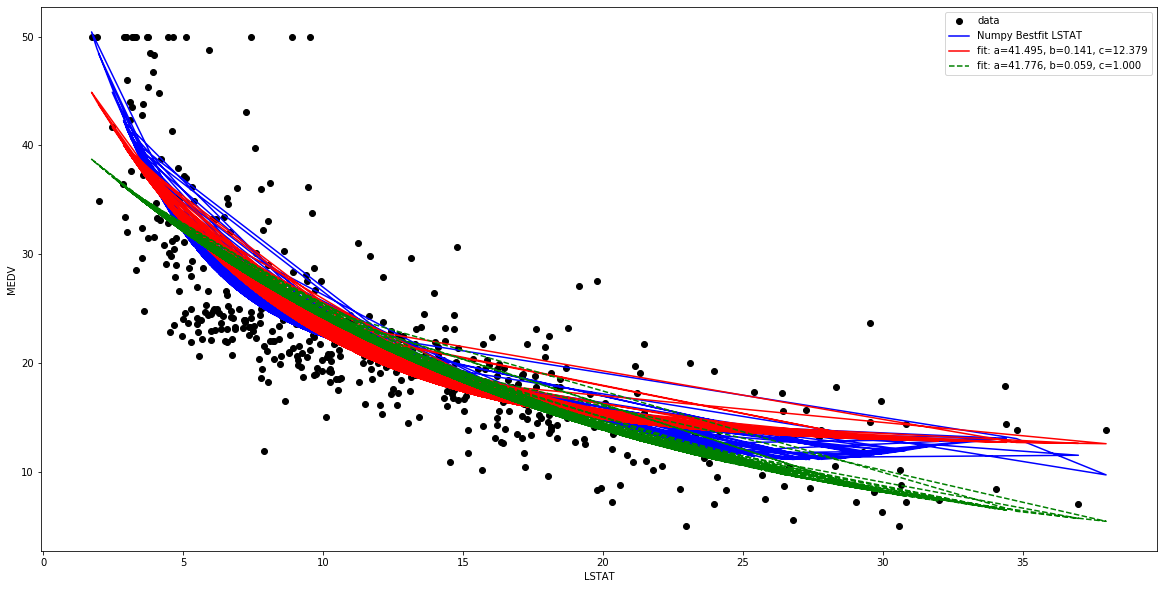

In [20]:
#here I will use 2 methods to create 3 curves and see what fits best and if any are better than the straight line. 

from scipy.optimize import curve_fit

def func(x, a, b, c):    #Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
    return a * np.exp(-b * x) + c     #Still uses least squares principle but is non linear

xdata = df['LSTAT']
ydata = df['MEDV']
plt.plot(xdata, ydata, 'ko', label='data') # plot the original data points

fit = np.poly1d(np.polyfit(xdata, ydata, 5)) #plot the polyfit function again where previously I used a np.poly1d variable of 1 for a straight line, I change it to 5 to demonstrate the curve. 
# note: The number 5 variable could be increased to achieve a lower MSE but this then was not so good to display visually below, so I decided to stick with 5. 
plt.plot(xdata, fit(xdata),'b-', label='Numpy Bestfit LSTAT')
MSE1_curve3 = get_mse(df, 'LSTAT', xdata, fit(xdata)) # Get MSE of the first curve

#Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
popt

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

curve_1_y_data = func(xdata, *popt)

MSE1_curve1 = get_mse(df, 'LSTAT', xdata, func(xdata, *popt))

#Constrain the optimization to the region of 0 <= a <= 50, 0 <= b <= 1 and 0 <= c <= 0.5:
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [55., 1., 1.0]))
popt

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
curve_2_y_data = func(xdata, *popt)

MSE1_curve2 = get_mse(df, 'LSTAT', xdata, func(xdata, *popt))

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend()
plt.show()

Sure enough the MSE reduces to under 27 with the blue curve so this is really worth keeping in mind as we begin to model with the neural network. 

SIDE-NOTE: this makes sense as when doing some training with Keras (where the LOSS is selected as MEAN sQUARED ERROR), BEFORE normalisation, I could only get down to a loss of about 27 (26.x, occasionally) for the LSTAT data. I was graphing the output each time and could see that the model was getting less error with "elu"/"relu" activations which were allowing more curvature in the predictive "line".

## Section 4 - Developing the Neural Network with Keras


### Section 4a - Preparing the data

In order to get the most from my analysis, I will follow the advice of scikit-learn and scale the input data with an aim to produce more accurate results. I will also split the data into training and testing groups.

In [21]:
# I break down the data into training and target sets - an 80:20 split, with test parameters and target(MDEV) parameters, and add the ability for sklearn to mix the groupings when run
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html & https://towardsdatascience.com/6-amateur-mistakes-ive-made-working-with-train-test-splits-916fabb421bb

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:13], df.iloc[:,13:14], test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [22]:
# Set up the scaler function & apply it to the test data but not the target data

scaler1 = pre.StandardScaler().fit(X_train) #source:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler1.fit(X_train)

xscale_train_data = pd.DataFrame(scaler1.transform(X_train))  #columns=df.columns didnt work for me unfortunately
xscale_train_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

noscale_train_targets = y_train
noscale_train_targets.columns = ['MEDV']

scaler2 = pre.StandardScaler().fit(X_test) #source:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler2.fit(X_test)
xscale_test_data = pd.DataFrame(scaler2.transform(X_test))  #columns=df.columns didnt work for me unfortunately
xscale_test_data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


noscale_test_targets = y_test
noscale_test_targets.columns = ['MEDV']

print(xscale_train_data.shape, noscale_train_targets.shape, xscale_test_data.shape, noscale_test_targets.shape)

(404, 13) (404, 1) (102, 13) (102, 1)


                                      ========================

### Section 4b -  Creating a Neural Network for LSTAT vs MEDV 

Here I am trying to introduce, assess and improve the accuracy for 1 variable from which to predict MEDV.   

In [23]:
# Create the inputs and outputs from the training/scaled data sets
inputs = xscale_train_data['LSTAT'].ravel() #se np.ravel (for a 1D view), https://stackoverflow.com/questions/13730468/from-nd-to-1d-arrays
output = noscale_train_targets['MEDV'].ravel()

In [24]:
### Create a new neural network.
n = kr.models.Sequential()

# Add neurons
n.add(kr.layers.Dense(65, input_dim=1, activation="linear")) # tested many activations from the https://keras.io/activations
n.add(kr.layers.Dense(60, activation="tanh")) 
n.add(kr.layers.Dense(70, activation="sigmoid")) 
n.add(kr.layers.Dense(45, activation="elu")) 
n.add(kr.layers.Dense(45, activation="selu")) 
n.add(kr.layers.Dense(10, activation="softmax")) 
n.add(kr.layers.Dense(60, activation="relu")) 
n.add(kr.layers.Dense(60, activation="relu")) 
n.add(kr.layers.Dense(60, activation="relu")) 
n.add(kr.layers.Dense(1, activation="linear")) 

# Compile the model.
n.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
n.fit(inputs, output, epochs=50,batch_size=10)

# Run each x value through the neural network.
p_2 = n.predict(inputs)

Epoch 1/50
404/404 [==============================] - 1s 3ms/step - loss: 257.5901
Epoch 2/50
404/404 [==============================] - 0s 626us/step - loss: 50.8171
Epoch 3/50
404/404 [==============================] - 0s 599us/step - loss: 44.9126
Epoch 4/50
404/404 [==============================] - 0s 574us/step - loss: 40.9108
Epoch 5/50
404/404 [==============================] - 0s 998us/step - loss: 44.8163
Epoch 6/50
404/404 [==============================] - 0s 562us/step - loss: 34.3654
Epoch 7/50
404/404 [==============================] - 0s 589us/step - loss: 39.9186
Epoch 8/50
404/404 [==============================] - 0s 636us/step - loss: 35.3484
Epoch 9/50
404/404 [==============================] - 0s 609us/step - loss: 35.1257
Epoch 10/50
404/404 [==============================] - 0s 696us/step - loss: 37.9581
Epoch 11/50
404/404 [==============================] - 0s 683us/step - loss: 32.6432
Epoch 12/50
404/404 [==============================] - 0s 517us/step - loss

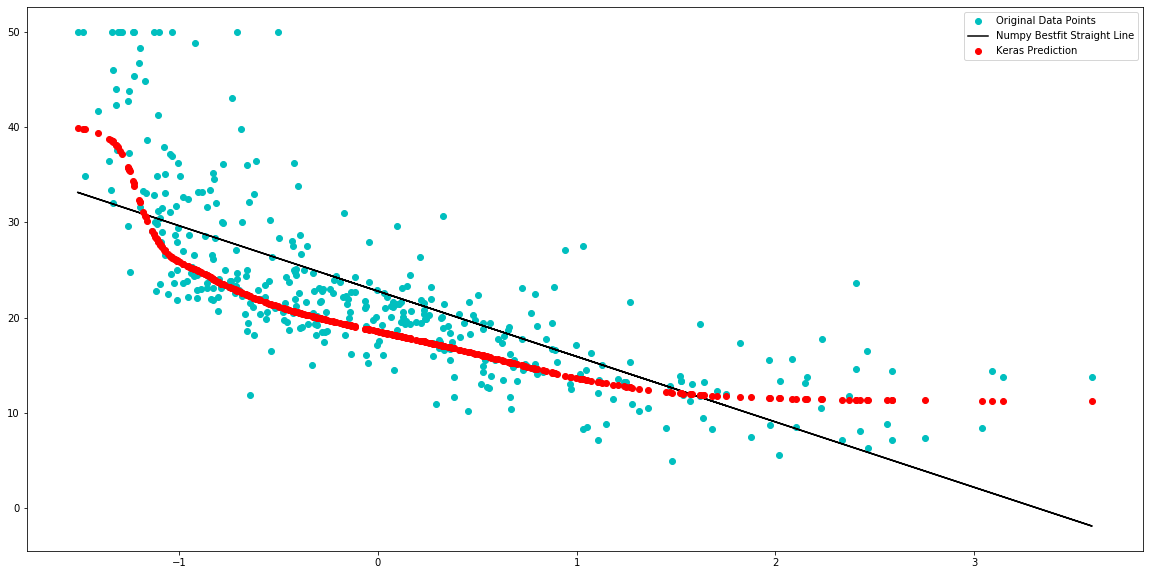

In [67]:
# Plot the predicted values vs the numpy polyfit line and original data points

plt.plot(inputs, output, 'co', label='Original Data Points')

fit = np.poly1d(np.polyfit(inputs, output, 1))
plt.plot(inputs, fit(inputs),'k-', label='Numpy Bestfit Straight Line')

plt.plot(inputs, p_2, 'ro', label='Keras Prediction')

plt.legend()

In [26]:
# Create a method to input test data points and ask the model to predict the correspondng MEDV:

i=0
results=[]

while i<len(xscale_test_data):                # for the test data fed in, create an array of the predicted results so I can compare against the actual known MEDV values
    q_5 = n.predict([xscale_test_data['LSTAT'].iloc[i]])
#    print(q_5.type)
    results.append([q_5])
    i=i+1
    
#print(results)

results = pd.DataFrame(results)
results.iloc[:,0] = results.iloc[:,0].str.get(0) # needs to be used twice to eliminate brackets from DF however will not work in IF/WHILE loop!
results.iloc[:,0] = results.iloc[:,0].str.get(0)

results1 = results.values.ravel()

# xscale_test_targets  =  the expected results we know from 102 entries in the original dataset
# MEDV Estimation  =  the estimated results the neural network has produced

keras_results1 = noscale_test_targets.copy() # create a copy of the test targets
keras_results1['MEDV Estimation'] = results1 # add a column to display the Estimation from the prediction vs actual MEDV
round(keras_results1,2)

,MEDV,MEDV Estimation
173,23.6,21.98
274,32.4,39.11
491,13.6,15.43
72,22.8,27.74
452,16.1,16.02
...,...,...
412,17.9,11.32
436,9.6,15.44
411,17.2,13.36
86,22.5,18.92


In [27]:
# show keras evaluation score (the smaller the better accuracy)
n.evaluate(xscale_test_data[['LSTAT']],keras_results1['MEDV'])

102/102 [==============================] - 0s 1ms/step


23.630709479836856

In [28]:
#Calculate the performance of this model but only if viewing it as a linear model 
#this metric should be taken with a pinch of salt as we have seen LSTAT likes to curve
score = performance_metric(output, p_2)
print ("Prediction line has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

Prediction line has a coefficient of determination, R^2, of 0.590. or 59.01 % accuracy


In [29]:
# Additional Prediction review adapted for a known set of inputs to assess how the model is evolving while changing neural network activations etc.

test_set1 = pd.DataFrame([-1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5])
test_set = test_set1.as_matrix()
i=0
test_results=[]

while i<len(test_set):
    q_5 = n.predict([test_set[i]])
#    print(q_5.type)
    test_results.append([q_5, 0])
    i=i+1

test_results2 = pd.DataFrame(test_results) #display side by side in a df
test_results2.iloc[:,0] = test_results2.iloc[:,0].str.get(0)
test_results2.iloc[:,0] = test_results2.iloc[:,0].str.get(0)
test_results2["Inputs"] = test_set
test_results2.columns =['MDEV Predictions', 'N.A.', 'Inputs']
test_results2a = test_results2.drop(columns=['N.A.'], axis=1)
test_results2a

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,MDEV Predictions,Inputs
0,25.889265,-1.0
1,21.162933,-0.5
2,18.566196,0.0
3,16.192726,0.5
4,13.682365,1.0
5,12.113033,1.5
6,11.543921,2.0
7,11.371543,2.5
8,11.307244,3.0
9,11.271185,3.5


In [30]:
# Opportunity to plot the predicted curve over the set inputs

#plt.plot(inputs, output, 'co', label='Original Data Points')
#plt.plot(test_results2a['Inputs'], test_results2a['MDEV Predictions'])

#### Comments: 

I can see the neural network is using a curved line to try and make the best predictions. However, as I can see from the raw data points in this section's plot, many are still far from the prediction model line. The MSE and keras .evaluate function results are not particularly stong but I cannot seem to get the numbers lower after much time spent manipulating parameters. Reviewing the results together, I see the R<sup>2</sup> values as too good to be true (again acknowledging the functions weakness as it moves away from linear models) and so would discount this.

Time to move on...

                                      ========================

### Section 4c -  Creating a Neural Network for PTRATIO vs MEDV 
(mirroring the approach taken for LSTAT vs MEDV)

In [31]:
#Establish data sets to be input into the model
inputs2 = xscale_train_data['PTRATIO'].ravel()
output2 = noscale_train_targets['MEDV'].ravel()

In [32]:
# Create a new neural network.
o = kr.models.Sequential()

# Add neurons
o.add(kr.layers.Dense(65, input_dim=1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
o.add(kr.layers.Dense(65, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
o.add(kr.layers.Dense(1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close


# Compile the model.
o.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
o.fit(inputs2, output2, epochs=20,batch_size=10)

# Run each x value through the neural network.
p_3 = o.predict(inputs2)

Epoch 1/20
404/404 [==============================] - 0s 1ms/step - loss: 437.0136
Epoch 2/20
404/404 [==============================] - 0s 364us/step - loss: 70.4956
Epoch 3/20
404/404 [==============================] - 0s 381us/step - loss: 68.3297
Epoch 4/20
404/404 [==============================] - 0s 381us/step - loss: 67.8919
Epoch 5/20
404/404 [==============================] - 0s 421us/step - loss: 69.6341
Epoch 6/20
404/404 [==============================] - 0s 391us/step - loss: 68.1741
Epoch 7/20
404/404 [==============================] - 0s 418us/step - loss: 67.4267
Epoch 8/20
404/404 [==============================] - 0s 366us/step - loss: 68.9745
Epoch 9/20
404/404 [==============================] - 0s 347us/step - loss: 68.0267
Epoch 10/20
404/404 [==============================] - 0s 384us/step - loss: 67.8244
Epoch 11/20
404/404 [==============================] - 0s 369us/step - loss: 68.6507
Epoch 12/20
404/404 [==============================] - 0s 366us/step - loss

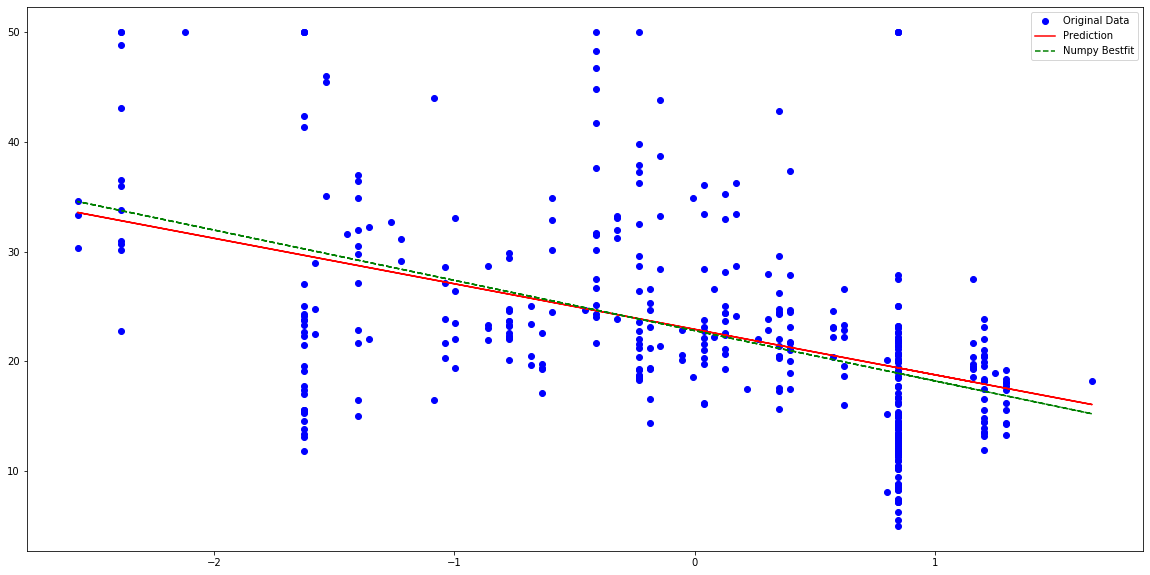

In [33]:
# Plot the predicted values with the numpy best fit line and original data points

#plt.plot(inputs, output, 'co', label='Original Data Points')
plt.plot(inputs2,output2, 'bo', label='Original Data')
plt.plot(inputs2, p_3, 'r-', label='Prediction')

z_df2= np.polyfit(inputs2, output2, 1)
p3 = np.poly1d(z_df2) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
plt.plot(inputs2,p3(inputs2),"g--", label='Numpy Bestfit') #Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 
plt.legend()
plt.show()

In [34]:
# Create a method to input data points and ask the model to predict the correspondng MEDV:

i=0
results=[]

while i<len(xscale_test_data):                # for the test data fed in, create an array of the predicted results so I can compare against the actual known MEDV values
    q_5 = o.predict([xscale_test_data['LSTAT'].iloc[i]])
#    print(q_5.type)
    results.append([q_5])
    i=i+1
    
#print(results)

results = pd.DataFrame(results)
results.iloc[:,0] = results.iloc[:,0].str.get(0) # needs to be used twice to eliminate brackets from DF however will not work in IF/WHILE loop!
results.iloc[:,0] = results.iloc[:,0].str.get(0)

results1 = results.values.ravel()

# xscale_test_targets  =  the expected results we know from 102 entries in the original dataset
# MEDV Estimation  =  the estimated results the neural network has produced

keras_results2 = noscale_test_targets.copy() # create a copy of the test targets
keras_results2['MEDV Estimation'] = results1 # add a column to display the Estimation from the prediction vs actual MEDV
round(keras_results2,2)

,MEDV,MEDV Estimation
173,23.6,25.44
274,32.4,28.61
491,13.6,20.25
72,22.8,27.46
452,16.1,20.71
...,...,...
412,17.9,10.88
436,9.6,20.26
411,17.2,18.44
86,22.5,23.25


In [35]:
# show keras evaluation score (the smaller the better accuracy)
o.evaluate(xscale_test_data[['PTRATIO']],keras_results2['MEDV'])

102/102 [==============================] - 0s 559us/step


51.01078916063496

In [36]:
#Calculate the performance of this model 
score = performance_metric(output2, p_3)
print ("This model has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

This model has a coefficient of determination, R^2, of 0.239. or 23.89 % accuracy


Although this seems to be a more straight forward linear prediction, the spread of the data points from the prediction is actually greater and it seemd to be limiting the model I can develop. Again MSE, keras .evaluate and R<sup>2</sup> values are poor after much manipulation.  

After creating 2 neural networks using single variables, I have come to the conclusion that their poor performance is probably to be expected. The actual data (particularly for PTRATIO) rarely is on the predictive line however I suspect, as I begin to bring in other variables, the accuracy may actually improve. The PTRATIO will still want to pull the prediction towards that general linear trend but also other variables will influence it so that it won't land exactly on the line and perhaps be more accurate. 

Lets continue...

                                      ========================

### Section 4d -  Creating a Neural Network for both PTRATIO and LSTAT vs MEDV

In [37]:
#Establish data sets to be input into the model

inputs3 = xscale_train_data[['PTRATIO', 'LSTAT']]
output3 = noscale_train_targets['MEDV'].ravel()

In [38]:
### Create a new neural network.
q = kr.models.Sequential()

# Add neurons
q.add(kr.layers.Dense(20, input_dim=2, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(45, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(60, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(60, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(20, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
q.add(kr.layers.Dense(1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close

# Compile the model.
q.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
q.fit(inputs3, output3, epochs=3000,batch_size=10)

# Run each x value through the neural network.
q_3 = q.predict(inputs3)

Epoch 1/3000
404/404 [==============================] - 1s 1ms/step - loss: 280.3529
Epoch 2/3000
404/404 [==============================] - 0s 163us/step - loss: 48.5447
Epoch 3/3000
404/404 [==============================] - 0s 158us/step - loss: 37.4651
Epoch 4/3000
404/404 [==============================] - 0s 163us/step - loss: 40.0384
Epoch 5/3000
404/404 [==============================] - 0s 173us/step - loss: 31.5008
Epoch 6/3000
404/404 [==============================] - 0s 158us/step - loss: 33.5406
Epoch 7/3000
404/404 [==============================] - 0s 163us/step - loss: 32.6090
Epoch 8/3000
404/404 [==============================] - 0s 163us/step - loss: 31.3179
Epoch 9/3000
404/404 [==============================] - 0s 158us/step - loss: 31.3021
Epoch 10/3000
404/404 [==============================] - 0s 166us/step - loss: 30.8975
Epoch 11/3000
404/404 [==============================] - 0s 161us/step - loss: 30.0879
Epoch 12/3000
404/404 [==============================

404/404 [==============================] - 0s 151us/step - loss: 22.7050
Epoch 96/3000
404/404 [==============================] - 0s 146us/step - loss: 21.9806
Epoch 97/3000
404/404 [==============================] - 0s 151us/step - loss: 21.7937
Epoch 98/3000
404/404 [==============================] - 0s 151us/step - loss: 21.7445
Epoch 99/3000
404/404 [==============================] - 0s 151us/step - loss: 22.6716
Epoch 100/3000
404/404 [==============================] - 0s 151us/step - loss: 22.3582
Epoch 101/3000
404/404 [==============================] - 0s 205us/step - loss: 22.6649
Epoch 102/3000
404/404 [==============================] - 0s 218us/step - loss: 22.0490
Epoch 103/3000
404/404 [==============================] - 0s 193us/step - loss: 21.6676
Epoch 104/3000
404/404 [==============================] - 0s 153us/step - loss: 21.8925
Epoch 105/3000
404/404 [==============================] - 0s 153us/step - loss: 22.2157
Epoch 106/3000
404/404 [===========================

404/404 [==============================] - 0s 161us/step - loss: 21.1324
Epoch 189/3000
404/404 [==============================] - 0s 151us/step - loss: 19.9943
Epoch 190/3000
404/404 [==============================] - 0s 149us/step - loss: 20.4198
Epoch 191/3000
404/404 [==============================] - 0s 149us/step - loss: 20.4908
Epoch 192/3000
404/404 [==============================] - 0s 151us/step - loss: 20.6039
Epoch 193/3000
404/404 [==============================] - 0s 151us/step - loss: 19.8617
Epoch 194/3000
404/404 [==============================] - 0s 151us/step - loss: 20.6078
Epoch 195/3000
404/404 [==============================] - 0s 146us/step - loss: 20.8945
Epoch 196/3000
404/404 [==============================] - 0s 153us/step - loss: 20.6705
Epoch 197/3000
404/404 [==============================] - 0s 161us/step - loss: 20.2357
Epoch 198/3000
404/404 [==============================] - 0s 153us/step - loss: 19.9151
Epoch 199/3000
404/404 [=======================

404/404 [==============================] - 0s 163us/step - loss: 19.2938
Epoch 282/3000
404/404 [==============================] - 0s 171us/step - loss: 19.2126
Epoch 283/3000
404/404 [==============================] - 0s 163us/step - loss: 18.8213
Epoch 284/3000
404/404 [==============================] - 0s 151us/step - loss: 19.9806
Epoch 285/3000
404/404 [==============================] - 0s 149us/step - loss: 19.1480
Epoch 286/3000
404/404 [==============================] - 0s 151us/step - loss: 18.7158
Epoch 287/3000
404/404 [==============================] - 0s 149us/step - loss: 18.8432
Epoch 288/3000
404/404 [==============================] - 0s 149us/step - loss: 18.9124
Epoch 289/3000
404/404 [==============================] - 0s 153us/step - loss: 19.2580
Epoch 290/3000
404/404 [==============================] - 0s 151us/step - loss: 18.9608
Epoch 291/3000
404/404 [==============================] - 0s 146us/step - loss: 19.0723
Epoch 292/3000
404/404 [=======================

404/404 [==============================] - 0s 153us/step - loss: 17.6572
Epoch 375/3000
404/404 [==============================] - 0s 156us/step - loss: 17.8999
Epoch 376/3000
404/404 [==============================] - 0s 158us/step - loss: 17.1777
Epoch 377/3000
404/404 [==============================] - 0s 153us/step - loss: 17.6926
Epoch 378/3000
404/404 [==============================] - 0s 146us/step - loss: 18.3656
Epoch 379/3000
404/404 [==============================] - 0s 153us/step - loss: 17.1475
Epoch 380/3000
404/404 [==============================] - 0s 153us/step - loss: 18.2511
Epoch 381/3000
404/404 [==============================] - 0s 153us/step - loss: 17.5749
Epoch 382/3000
404/404 [==============================] - 0s 156us/step - loss: 17.3826
Epoch 383/3000
404/404 [==============================] - 0s 151us/step - loss: 17.1835
Epoch 384/3000
404/404 [==============================] - 0s 156us/step - loss: 18.1846
Epoch 385/3000
404/404 [=======================

404/404 [==============================] - 0s 156us/step - loss: 16.3172
Epoch 468/3000
404/404 [==============================] - 0s 158us/step - loss: 16.4796
Epoch 469/3000
404/404 [==============================] - 0s 151us/step - loss: 17.2581
Epoch 470/3000
404/404 [==============================] - 0s 158us/step - loss: 16.5999
Epoch 471/3000
404/404 [==============================] - 0s 163us/step - loss: 16.6292
Epoch 472/3000
404/404 [==============================] - 0s 156us/step - loss: 16.8595
Epoch 473/3000
404/404 [==============================] - 0s 156us/step - loss: 16.8670
Epoch 474/3000
404/404 [==============================] - 0s 158us/step - loss: 16.7784
Epoch 475/3000
404/404 [==============================] - 0s 156us/step - loss: 17.2963
Epoch 476/3000
404/404 [==============================] - 0s 153us/step - loss: 16.5825
Epoch 477/3000
404/404 [==============================] - 0s 153us/step - loss: 16.2951
Epoch 478/3000
404/404 [=======================

404/404 [==============================] - 0s 161us/step - loss: 15.3681
Epoch 561/3000
404/404 [==============================] - 0s 151us/step - loss: 16.2019
Epoch 562/3000
404/404 [==============================] - 0s 146us/step - loss: 15.5513
Epoch 563/3000
404/404 [==============================] - 0s 151us/step - loss: 15.4368
Epoch 564/3000
404/404 [==============================] - 0s 156us/step - loss: 15.8749
Epoch 565/3000
404/404 [==============================] - 0s 161us/step - loss: 15.5578
Epoch 566/3000
404/404 [==============================] - 0s 151us/step - loss: 15.6746
Epoch 567/3000
404/404 [==============================] - 0s 149us/step - loss: 15.8363
Epoch 568/3000
404/404 [==============================] - 0s 151us/step - loss: 15.5975
Epoch 569/3000
404/404 [==============================] - 0s 151us/step - loss: 16.0291
Epoch 570/3000
404/404 [==============================] - 0s 158us/step - loss: 16.7073
Epoch 571/3000
404/404 [=======================

404/404 [==============================] - 0s 163us/step - loss: 15.2095
Epoch 654/3000
404/404 [==============================] - 0s 166us/step - loss: 14.5866
Epoch 655/3000
404/404 [==============================] - 0s 149us/step - loss: 15.0788
Epoch 656/3000
404/404 [==============================] - 0s 149us/step - loss: 15.2995
Epoch 657/3000
404/404 [==============================] - 0s 149us/step - loss: 15.1658
Epoch 658/3000
404/404 [==============================] - 0s 153us/step - loss: 14.6707
Epoch 659/3000
404/404 [==============================] - 0s 161us/step - loss: 15.2520
Epoch 660/3000
404/404 [==============================] - 0s 149us/step - loss: 15.3863
Epoch 661/3000
404/404 [==============================] - 0s 149us/step - loss: 14.6302
Epoch 662/3000
404/404 [==============================] - 0s 186us/step - loss: 15.4946
Epoch 663/3000
404/404 [==============================] - 0s 228us/step - loss: 15.6872
Epoch 664/3000
404/404 [=======================

Epoch 746/3000
404/404 [==============================] - 0s 173us/step - loss: 14.4812
Epoch 747/3000
404/404 [==============================] - 0s 153us/step - loss: 14.8624
Epoch 748/3000
404/404 [==============================] - 0s 151us/step - loss: 14.7673
Epoch 749/3000
404/404 [==============================] - 0s 151us/step - loss: 14.3110
Epoch 750/3000
404/404 [==============================] - 0s 149us/step - loss: 14.9662
Epoch 751/3000
404/404 [==============================] - 0s 153us/step - loss: 14.7304
Epoch 752/3000
404/404 [==============================] - 0s 156us/step - loss: 14.7377
Epoch 753/3000
404/404 [==============================] - 0s 153us/step - loss: 14.4845
Epoch 754/3000
404/404 [==============================] - 0s 151us/step - loss: 14.6953
Epoch 755/3000
404/404 [==============================] - 0s 151us/step - loss: 14.3753
Epoch 756/3000
404/404 [==============================] - 0s 151us/step - loss: 14.0657
Epoch 757/3000
404/404 [========

404/404 [==============================] - 0s 153us/step - loss: 13.9165
Epoch 840/3000
404/404 [==============================] - 0s 161us/step - loss: 14.8388
Epoch 841/3000
404/404 [==============================] - 0s 153us/step - loss: 14.1997
Epoch 842/3000
404/404 [==============================] - 0s 166us/step - loss: 14.5187
Epoch 843/3000
404/404 [==============================] - 0s 151us/step - loss: 14.3602
Epoch 844/3000
404/404 [==============================] - 0s 156us/step - loss: 14.4217
Epoch 845/3000
404/404 [==============================] - 0s 151us/step - loss: 14.2331
Epoch 846/3000
404/404 [==============================] - 0s 153us/step - loss: 14.5174
Epoch 847/3000
404/404 [==============================] - 0s 151us/step - loss: 13.7576
Epoch 848/3000
404/404 [==============================] - 0s 151us/step - loss: 13.9586
Epoch 849/3000
404/404 [==============================] - 0s 153us/step - loss: 14.3873
Epoch 850/3000
404/404 [=======================

404/404 [==============================] - 0s 163us/step - loss: 14.3044
Epoch 933/3000
404/404 [==============================] - 0s 151us/step - loss: 13.2599
Epoch 934/3000
404/404 [==============================] - 0s 158us/step - loss: 13.0325
Epoch 935/3000
404/404 [==============================] - 0s 151us/step - loss: 14.3680
Epoch 936/3000
404/404 [==============================] - 0s 151us/step - loss: 13.9438
Epoch 937/3000
404/404 [==============================] - 0s 161us/step - loss: 13.3141
Epoch 938/3000
404/404 [==============================] - 0s 161us/step - loss: 14.1702
Epoch 939/3000
404/404 [==============================] - 0s 173us/step - loss: 14.1195
Epoch 940/3000
404/404 [==============================] - 0s 156us/step - loss: 13.2233
Epoch 941/3000
404/404 [==============================] - 0s 188us/step - loss: 13.7825
Epoch 942/3000
404/404 [==============================] - 0s 153us/step - loss: 13.4620
Epoch 943/3000
404/404 [=======================

Epoch 1025/3000
404/404 [==============================] - 0s 158us/step - loss: 13.8215
Epoch 1026/3000
404/404 [==============================] - 0s 153us/step - loss: 13.5966
Epoch 1027/3000
404/404 [==============================] - 0s 153us/step - loss: 13.6140
Epoch 1028/3000
404/404 [==============================] - 0s 149us/step - loss: 13.7964
Epoch 1029/3000
404/404 [==============================] - 0s 156us/step - loss: 13.0484
Epoch 1030/3000
404/404 [==============================] - 0s 163us/step - loss: 13.4560
Epoch 1031/3000
404/404 [==============================] - 0s 153us/step - loss: 13.1498
Epoch 1032/3000
404/404 [==============================] - 0s 153us/step - loss: 13.7569
Epoch 1033/3000
404/404 [==============================] - 0s 151us/step - loss: 13.5184
Epoch 1034/3000
404/404 [==============================] - 0s 146us/step - loss: 13.4707
Epoch 1035/3000
404/404 [==============================] - 0s 158us/step - loss: 13.6746
Epoch 1036/3000
404/4

404/404 [==============================] - 0s 153us/step - loss: 12.9634
Epoch 1118/3000
404/404 [==============================] - 0s 163us/step - loss: 12.9978
Epoch 1119/3000
404/404 [==============================] - 0s 156us/step - loss: 12.7575
Epoch 1120/3000
404/404 [==============================] - 0s 151us/step - loss: 12.9407
Epoch 1121/3000
404/404 [==============================] - 0s 151us/step - loss: 13.2545
Epoch 1122/3000
404/404 [==============================] - 0s 149us/step - loss: 12.8501
Epoch 1123/3000
404/404 [==============================] - 0s 153us/step - loss: 13.2416
Epoch 1124/3000
404/404 [==============================] - 0s 153us/step - loss: 13.1632
Epoch 1125/3000
404/404 [==============================] - 0s 156us/step - loss: 13.6008
Epoch 1126/3000
404/404 [==============================] - 0s 151us/step - loss: 12.9464
Epoch 1127/3000
404/404 [==============================] - 0s 151us/step - loss: 13.3781
Epoch 1128/3000
404/404 [============

Epoch 1209/3000
404/404 [==============================] - 0s 168us/step - loss: 12.4059
Epoch 1210/3000
404/404 [==============================] - 0s 149us/step - loss: 13.2626
Epoch 1211/3000
404/404 [==============================] - 0s 153us/step - loss: 12.8020
Epoch 1212/3000
404/404 [==============================] - 0s 153us/step - loss: 13.2112
Epoch 1213/3000
404/404 [==============================] - 0s 163us/step - loss: 12.6686
Epoch 1214/3000
404/404 [==============================] - 0s 151us/step - loss: 12.4378
Epoch 1215/3000
404/404 [==============================] - 0s 153us/step - loss: 12.4136
Epoch 1216/3000
404/404 [==============================] - 0s 153us/step - loss: 12.5283
Epoch 1217/3000
404/404 [==============================] - 0s 156us/step - loss: 12.9728
Epoch 1218/3000
404/404 [==============================] - 0s 153us/step - loss: 12.8645
Epoch 1219/3000
404/404 [==============================] - 0s 151us/step - loss: 12.5437
Epoch 1220/3000
404/4

404/404 [==============================] - 0s 166us/step - loss: 12.0449
Epoch 1302/3000
404/404 [==============================] - 0s 208us/step - loss: 12.5422
Epoch 1303/3000
404/404 [==============================] - 0s 210us/step - loss: 12.7275
Epoch 1304/3000
404/404 [==============================] - 0s 188us/step - loss: 11.8839
Epoch 1305/3000
404/404 [==============================] - 0s 151us/step - loss: 12.2962
Epoch 1306/3000
404/404 [==============================] - 0s 156us/step - loss: 12.9250
Epoch 1307/3000
404/404 [==============================] - 0s 158us/step - loss: 12.6093
Epoch 1308/3000
404/404 [==============================] - 0s 153us/step - loss: 12.3893
Epoch 1309/3000
404/404 [==============================] - 0s 153us/step - loss: 12.9120
Epoch 1310/3000
404/404 [==============================] - 0s 151us/step - loss: 12.4028
Epoch 1311/3000
404/404 [==============================] - 0s 153us/step - loss: 11.9827
Epoch 1312/3000
404/404 [============

404/404 [==============================] - 0s 161us/step - loss: 11.9196
Epoch 1394/3000
404/404 [==============================] - 0s 171us/step - loss: 11.7931
Epoch 1395/3000
404/404 [==============================] - 0s 153us/step - loss: 12.4249
Epoch 1396/3000
404/404 [==============================] - 0s 156us/step - loss: 12.5251
Epoch 1397/3000
404/404 [==============================] - 0s 146us/step - loss: 12.0353
Epoch 1398/3000
404/404 [==============================] - 0s 158us/step - loss: 12.1478
Epoch 1399/3000
404/404 [==============================] - 0s 149us/step - loss: 12.6845
Epoch 1400/3000
404/404 [==============================] - 0s 156us/step - loss: 12.2059
Epoch 1401/3000
404/404 [==============================] - 0s 156us/step - loss: 12.1845
Epoch 1402/3000
404/404 [==============================] - 0s 151us/step - loss: 12.7023
Epoch 1403/3000
404/404 [==============================] - 0s 158us/step - loss: 12.3599
Epoch 1404/3000
404/404 [============

404/404 [==============================] - 0s 151us/step - loss: 12.5081
Epoch 1486/3000
404/404 [==============================] - 0s 156us/step - loss: 11.7416
Epoch 1487/3000
404/404 [==============================] - 0s 151us/step - loss: 11.9954
Epoch 1488/3000
404/404 [==============================] - 0s 153us/step - loss: 12.4705
Epoch 1489/3000
404/404 [==============================] - 0s 156us/step - loss: 11.7358
Epoch 1490/3000
404/404 [==============================] - 0s 149us/step - loss: 11.8862
Epoch 1491/3000
404/404 [==============================] - 0s 153us/step - loss: 11.7195
Epoch 1492/3000
404/404 [==============================] - 0s 151us/step - loss: 11.5770
Epoch 1493/3000
404/404 [==============================] - 0s 151us/step - loss: 12.1089
Epoch 1494/3000
404/404 [==============================] - 0s 156us/step - loss: 12.0552
Epoch 1495/3000
404/404 [==============================] - 0s 151us/step - loss: 12.1070
Epoch 1496/3000
404/404 [============

404/404 [==============================] - 0s 158us/step - loss: 11.3912
Epoch 1578/3000
404/404 [==============================] - 0s 156us/step - loss: 12.2992
Epoch 1579/3000
404/404 [==============================] - 0s 158us/step - loss: 12.1536
Epoch 1580/3000
404/404 [==============================] - 0s 151us/step - loss: 11.9686
Epoch 1581/3000
404/404 [==============================] - 0s 153us/step - loss: 12.0059
Epoch 1582/3000
404/404 [==============================] - 0s 153us/step - loss: 11.9559
Epoch 1583/3000
404/404 [==============================] - 0s 153us/step - loss: 12.2837
Epoch 1584/3000
404/404 [==============================] - 0s 158us/step - loss: 11.4435
Epoch 1585/3000
404/404 [==============================] - 0s 149us/step - loss: 10.8253
Epoch 1586/3000
404/404 [==============================] - 0s 156us/step - loss: 12.4725
Epoch 1587/3000
404/404 [==============================] - 0s 156us/step - loss: 11.7989
Epoch 1588/3000
404/404 [============

404/404 [==============================] - 0s 176us/step - loss: 11.5754
Epoch 1670/3000
404/404 [==============================] - 0s 151us/step - loss: 11.8196
Epoch 1671/3000
404/404 [==============================] - 0s 153us/step - loss: 11.5268
Epoch 1672/3000
404/404 [==============================] - 0s 149us/step - loss: 11.1308
Epoch 1673/3000
404/404 [==============================] - 0s 153us/step - loss: 11.8167
Epoch 1674/3000
404/404 [==============================] - 0s 156us/step - loss: 12.0022
Epoch 1675/3000
404/404 [==============================] - 0s 153us/step - loss: 11.3550
Epoch 1676/3000
404/404 [==============================] - 0s 156us/step - loss: 12.0744
Epoch 1677/3000
404/404 [==============================] - 0s 151us/step - loss: 11.4380
Epoch 1678/3000
404/404 [==============================] - 0s 146us/step - loss: 11.5732
Epoch 1679/3000
404/404 [==============================] - 0s 163us/step - loss: 12.1578
Epoch 1680/3000
404/404 [============

404/404 [==============================] - 0s 161us/step - loss: 11.7264
Epoch 1762/3000
404/404 [==============================] - 0s 158us/step - loss: 11.5784
Epoch 1763/3000
404/404 [==============================] - 0s 151us/step - loss: 10.9070
Epoch 1764/3000
404/404 [==============================] - 0s 153us/step - loss: 11.0253
Epoch 1765/3000
404/404 [==============================] - 0s 146us/step - loss: 11.7351
Epoch 1766/3000
404/404 [==============================] - 0s 151us/step - loss: 11.5788
Epoch 1767/3000
404/404 [==============================] - 0s 153us/step - loss: 11.4186
Epoch 1768/3000
404/404 [==============================] - 0s 151us/step - loss: 11.6368
Epoch 1769/3000
404/404 [==============================] - 0s 149us/step - loss: 11.4900
Epoch 1770/3000
404/404 [==============================] - 0s 153us/step - loss: 12.2192
Epoch 1771/3000
404/404 [==============================] - 0s 156us/step - loss: 11.0857
Epoch 1772/3000
404/404 [============

404/404 [==============================] - 0s 156us/step - loss: 11.2003
Epoch 1854/3000
404/404 [==============================] - 0s 158us/step - loss: 11.3192
Epoch 1855/3000
404/404 [==============================] - 0s 156us/step - loss: 11.5835
Epoch 1856/3000
404/404 [==============================] - 0s 181us/step - loss: 11.0648
Epoch 1857/3000
404/404 [==============================] - 0s 183us/step - loss: 11.3042
Epoch 1858/3000
404/404 [==============================] - 0s 176us/step - loss: 11.3638
Epoch 1859/3000
404/404 [==============================] - 0s 205us/step - loss: 11.2819
Epoch 1860/3000
404/404 [==============================] - 0s 178us/step - loss: 11.1873
Epoch 1861/3000
404/404 [==============================] - 0s 153us/step - loss: 11.1345
Epoch 1862/3000
404/404 [==============================] - 0s 156us/step - loss: 11.1649
Epoch 1863/3000
404/404 [==============================] - 0s 156us/step - loss: 11.3224
Epoch 1864/3000
404/404 [============

404/404 [==============================] - 0s 156us/step - loss: 10.6833
Epoch 1946/3000
404/404 [==============================] - 0s 158us/step - loss: 11.1548
Epoch 1947/3000
404/404 [==============================] - 0s 156us/step - loss: 11.0845
Epoch 1948/3000
404/404 [==============================] - 0s 153us/step - loss: 11.1545
Epoch 1949/3000
404/404 [==============================] - 0s 153us/step - loss: 10.8530
Epoch 1950/3000
404/404 [==============================] - 0s 153us/step - loss: 11.0623
Epoch 1951/3000
404/404 [==============================] - 0s 153us/step - loss: 10.8848
Epoch 1952/3000
404/404 [==============================] - 0s 166us/step - loss: 10.5299
Epoch 1953/3000
404/404 [==============================] - 0s 158us/step - loss: 10.8821
Epoch 1954/3000
404/404 [==============================] - 0s 158us/step - loss: 11.1958
Epoch 1955/3000
404/404 [==============================] - 0s 156us/step - loss: 10.7121
Epoch 1956/3000
404/404 [============

404/404 [==============================] - 0s 196us/step - loss: 10.6519
Epoch 2038/3000
404/404 [==============================] - 0s 203us/step - loss: 10.8343
Epoch 2039/3000
404/404 [==============================] - 0s 201us/step - loss: 10.4986
Epoch 2040/3000
404/404 [==============================] - 0s 196us/step - loss: 10.5441
Epoch 2041/3000
404/404 [==============================] - 0s 201us/step - loss: 10.6455
Epoch 2042/3000
404/404 [==============================] - 0s 196us/step - loss: 10.8660
Epoch 2043/3000
404/404 [==============================] - 0s 188us/step - loss: 10.3423
Epoch 2044/3000
404/404 [==============================] - 0s 201us/step - loss: 10.4409
Epoch 2045/3000
404/404 [==============================] - 0s 188us/step - loss: 10.7398
Epoch 2046/3000
404/404 [==============================] - 0s 201us/step - loss: 12.4064
Epoch 2047/3000
404/404 [==============================] - 0s 191us/step - loss: 10.4126
Epoch 2048/3000
404/404 [============

404/404 [==============================] - 0s 198us/step - loss: 10.0689
Epoch 2130/3000
404/404 [==============================] - 0s 196us/step - loss: 10.1571
Epoch 2131/3000
404/404 [==============================] - 0s 196us/step - loss: 10.6535
Epoch 2132/3000
404/404 [==============================] - 0s 188us/step - loss: 10.7008
Epoch 2133/3000
404/404 [==============================] - 0s 203us/step - loss: 10.6955
Epoch 2134/3000
404/404 [==============================] - 0s 191us/step - loss: 10.8360
Epoch 2135/3000
404/404 [==============================] - 0s 201us/step - loss: 9.9933
Epoch 2136/3000
404/404 [==============================] - 0s 208us/step - loss: 10.6080
Epoch 2137/3000
404/404 [==============================] - 0s 220us/step - loss: 9.8135
Epoch 2138/3000
404/404 [==============================] - 0s 230us/step - loss: 10.4115
Epoch 2139/3000
404/404 [==============================] - 0s 193us/step - loss: 10.4291
Epoch 2140/3000
404/404 [==============

404/404 [==============================] - 0s 156us/step - loss: 10.4684
Epoch 2222/3000
404/404 [==============================] - 0s 153us/step - loss: 10.0227
Epoch 2223/3000
404/404 [==============================] - 0s 153us/step - loss: 10.3933
Epoch 2224/3000
404/404 [==============================] - 0s 151us/step - loss: 10.5635
Epoch 2225/3000
404/404 [==============================] - 0s 156us/step - loss: 10.4944
Epoch 2226/3000
404/404 [==============================] - 0s 156us/step - loss: 10.3453
Epoch 2227/3000
404/404 [==============================] - 0s 158us/step - loss: 9.9589
Epoch 2228/3000
404/404 [==============================] - 0s 151us/step - loss: 10.1470
Epoch 2229/3000
404/404 [==============================] - 0s 153us/step - loss: 10.3427
Epoch 2230/3000
404/404 [==============================] - 0s 149us/step - loss: 9.7270
Epoch 2231/3000
404/404 [==============================] - 0s 158us/step - loss: 10.7984
Epoch 2232/3000
404/404 [==============

404/404 [==============================] - 0s 173us/step - loss: 9.8103
Epoch 2314/3000
404/404 [==============================] - 0s 176us/step - loss: 10.3046
Epoch 2315/3000
404/404 [==============================] - 0s 163us/step - loss: 9.7411
Epoch 2316/3000
404/404 [==============================] - 0s 156us/step - loss: 10.5668
Epoch 2317/3000
404/404 [==============================] - 0s 161us/step - loss: 10.0586
Epoch 2318/3000
404/404 [==============================] - 0s 153us/step - loss: 10.3824
Epoch 2319/3000
404/404 [==============================] - 0s 151us/step - loss: 10.1157
Epoch 2320/3000
404/404 [==============================] - 0s 153us/step - loss: 9.8628
Epoch 2321/3000
404/404 [==============================] - 0s 153us/step - loss: 10.4361
Epoch 2322/3000
404/404 [==============================] - 0s 156us/step - loss: 9.9946
Epoch 2323/3000
404/404 [==============================] - 0s 156us/step - loss: 10.2655
Epoch 2324/3000
404/404 [================

404/404 [==============================] - 0s 161us/step - loss: 10.1113
Epoch 2406/3000
404/404 [==============================] - 0s 161us/step - loss: 9.5986
Epoch 2407/3000
404/404 [==============================] - 0s 153us/step - loss: 9.9051
Epoch 2408/3000
404/404 [==============================] - 0s 158us/step - loss: 10.5032
Epoch 2409/3000
404/404 [==============================] - 0s 158us/step - loss: 9.4505
Epoch 2410/3000
404/404 [==============================] - 0s 158us/step - loss: 10.1880
Epoch 2411/3000
404/404 [==============================] - 0s 156us/step - loss: 9.8131
Epoch 2412/3000
404/404 [==============================] - 0s 149us/step - loss: 9.7573
Epoch 2413/3000
404/404 [==============================] - 0s 153us/step - loss: 9.7674
Epoch 2414/3000
404/404 [==============================] - 0s 151us/step - loss: 9.5643
Epoch 2415/3000
404/404 [==============================] - 0s 153us/step - loss: 9.7827
Epoch 2416/3000
404/404 [====================

404/404 [==============================] - 0s 163us/step - loss: 9.6697
Epoch 2499/3000
404/404 [==============================] - 0s 156us/step - loss: 9.2577
Epoch 2500/3000
404/404 [==============================] - 0s 153us/step - loss: 9.6512
Epoch 2501/3000
404/404 [==============================] - 0s 151us/step - loss: 9.0231
Epoch 2502/3000
404/404 [==============================] - 0s 156us/step - loss: 9.1757
Epoch 2503/3000
404/404 [==============================] - 0s 153us/step - loss: 9.7311
Epoch 2504/3000
404/404 [==============================] - 0s 153us/step - loss: 9.7303
Epoch 2505/3000
404/404 [==============================] - 0s 153us/step - loss: 9.8769
Epoch 2506/3000
404/404 [==============================] - 0s 151us/step - loss: 9.3584
Epoch 2507/3000
404/404 [==============================] - 0s 156us/step - loss: 9.7658
Epoch 2508/3000
404/404 [==============================] - 0s 151us/step - loss: 9.7487
Epoch 2509/3000
404/404 [=======================

404/404 [==============================] - 0s 156us/step - loss: 9.1055
Epoch 2592/3000
404/404 [==============================] - 0s 158us/step - loss: 9.5130
Epoch 2593/3000
404/404 [==============================] - 0s 151us/step - loss: 8.7958
Epoch 2594/3000
404/404 [==============================] - 0s 156us/step - loss: 9.1226
Epoch 2595/3000
404/404 [==============================] - 0s 149us/step - loss: 9.3931
Epoch 2596/3000
404/404 [==============================] - 0s 158us/step - loss: 9.5970
Epoch 2597/3000
404/404 [==============================] - 0s 158us/step - loss: 9.2731
Epoch 2598/3000
404/404 [==============================] - 0s 156us/step - loss: 9.5615
Epoch 2599/3000
404/404 [==============================] - 0s 153us/step - loss: 9.2527
Epoch 2600/3000
404/404 [==============================] - 0s 166us/step - loss: 9.1111
Epoch 2601/3000
404/404 [==============================] - 0s 198us/step - loss: 9.4892
Epoch 2602/3000
404/404 [=======================

404/404 [==============================] - 0s 201us/step - loss: 9.0080
Epoch 2685/3000
404/404 [==============================] - 0s 191us/step - loss: 8.7314
Epoch 2686/3000
404/404 [==============================] - 0s 201us/step - loss: 9.2846
Epoch 2687/3000
404/404 [==============================] - 0s 205us/step - loss: 8.6177
Epoch 2688/3000
404/404 [==============================] - 0s 198us/step - loss: 9.2227
Epoch 2689/3000
404/404 [==============================] - 0s 198us/step - loss: 9.0630
Epoch 2690/3000
404/404 [==============================] - 0s 193us/step - loss: 9.7643
Epoch 2691/3000
404/404 [==============================] - 0s 198us/step - loss: 9.5668
Epoch 2692/3000
404/404 [==============================] - 0s 198us/step - loss: 9.3994
Epoch 2693/3000
404/404 [==============================] - 0s 193us/step - loss: 8.5667
Epoch 2694/3000
404/404 [==============================] - 0s 208us/step - loss: 8.7527
Epoch 2695/3000
404/404 [=======================

404/404 [==============================] - 0s 203us/step - loss: 8.2029
Epoch 2778/3000
404/404 [==============================] - 0s 198us/step - loss: 8.9651
Epoch 2779/3000
404/404 [==============================] - 0s 186us/step - loss: 8.7063
Epoch 2780/3000
404/404 [==============================] - 0s 201us/step - loss: 9.5385
Epoch 2781/3000
404/404 [==============================] - 0s 198us/step - loss: 9.5321
Epoch 2782/3000
404/404 [==============================] - 0s 193us/step - loss: 8.8504
Epoch 2783/3000
404/404 [==============================] - 0s 193us/step - loss: 8.6068
Epoch 2784/3000
404/404 [==============================] - 0s 193us/step - loss: 8.9118
Epoch 2785/3000
404/404 [==============================] - 0s 198us/step - loss: 8.4607
Epoch 2786/3000
404/404 [==============================] - 0s 193us/step - loss: 9.2553
Epoch 2787/3000
404/404 [==============================] - 0s 191us/step - loss: 8.3037
Epoch 2788/3000
404/404 [=======================

404/404 [==============================] - 0s 196us/step - loss: 8.3934
Epoch 2870/3000
404/404 [==============================] - 0s 203us/step - loss: 8.7652
Epoch 2871/3000
404/404 [==============================] - 0s 198us/step - loss: 8.5620
Epoch 2872/3000
404/404 [==============================] - 0s 203us/step - loss: 8.3192
Epoch 2873/3000
404/404 [==============================] - 0s 196us/step - loss: 8.7919
Epoch 2874/3000
404/404 [==============================] - 0s 203us/step - loss: 8.2379
Epoch 2875/3000
404/404 [==============================] - 0s 203us/step - loss: 8.1954
Epoch 2876/3000
404/404 [==============================] - 0s 191us/step - loss: 8.4279
Epoch 2877/3000
404/404 [==============================] - 0s 203us/step - loss: 8.5471
Epoch 2878/3000
404/404 [==============================] - 0s 193us/step - loss: 8.1280
Epoch 2879/3000
404/404 [==============================] - 0s 191us/step - loss: 8.5724
Epoch 2880/3000
404/404 [=======================

404/404 [==============================] - 0s 156us/step - loss: 8.4108
Epoch 2963/3000
404/404 [==============================] - 0s 161us/step - loss: 7.9081
Epoch 2964/3000
404/404 [==============================] - 0s 149us/step - loss: 8.3311
Epoch 2965/3000
404/404 [==============================] - 0s 149us/step - loss: 8.1075
Epoch 2966/3000
404/404 [==============================] - 0s 156us/step - loss: 8.1147
Epoch 2967/3000
404/404 [==============================] - 0s 153us/step - loss: 8.0300
Epoch 2968/3000
404/404 [==============================] - 0s 158us/step - loss: 8.6162
Epoch 2969/3000
404/404 [==============================] - 0s 158us/step - loss: 8.2296
Epoch 2970/3000
404/404 [==============================] - 0s 151us/step - loss: 9.1221
Epoch 2971/3000
404/404 [==============================] - 0s 149us/step - loss: 8.3145
Epoch 2972/3000
404/404 [==============================] - 0s 161us/step - loss: 8.0439
Epoch 2973/3000
404/404 [=======================

In [39]:
# Create a method to input data points and ask the model to predict the correspondng MEDV:

pd.set_option('display.max_rows', 500)

i=0
results_=[]


while i<len(xscale_test_data):                # for the test data fed in, create an array of the predicted results so I can compare against the actual known MEDV values
    q_5 = q.predict(pd.DataFrame([xscale_test_data[['LSTAT', 'PTRATIO']].iloc[i]]))
#    pd.DataFrame
    results_.append(q_5[0])
    i=i+1
    
results1a = pd.DataFrame(results_)

# noscale_test_targets  =  the expected results we know from 102 entries in the original dataset
# MEDV Estimation  =  the estimated results the neural network has produced

keras_results3 = noscale_test_targets.copy() # create a copy of the test targets
keras_results3 = keras_results3.reset_index()
keras_results3['MEDV Estimation'] = results1a # add a column to display the Estimation from the prediction vs actual MEDV
round(keras_results3,2)

,index,MEDV,MEDV Estimation
0,173,23.6,40.41
1,274,32.4,31.97
2,491,13.6,13.85
3,72,22.8,22.67
4,452,16.1,17.74
5,76,20.0,20.56
6,316,17.8,16.91
7,140,14.0,15.10
8,471,19.6,19.54
9,500,16.8,19.86


In [40]:
# show keras evaluation score (the smaller the better accuracy)
q.evaluate(xscale_test_data[['LSTAT', 'PTRATIO']],keras_results3['MEDV'])

102/102 [==============================] - 0s 716us/step


386.6991622027229

In [41]:
#Calculate the performance of this model but only if viewing it as a linear model 
#this metric should be taken with a pinch of salt as although both are similar we have seen LSTAT likes to curve a lot more than the model for PTRATIO
score = performance_metric(output3, q_3)
print ("This prediction has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

This prediction has a coefficient of determination, R^2, of 0.920. or 91.96 % accuracy


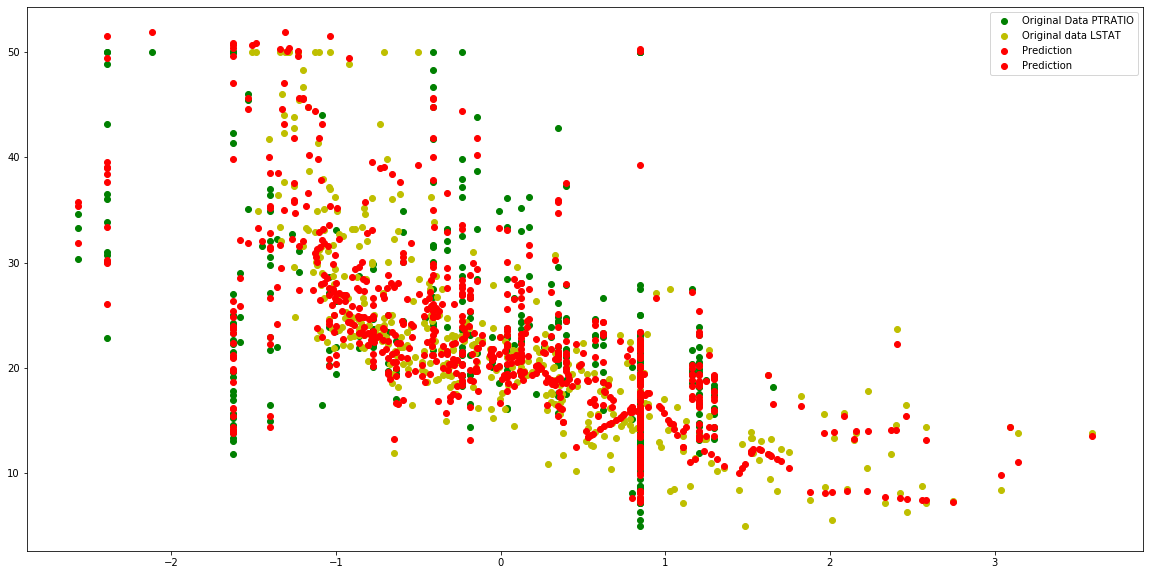

In [42]:
#Plot the data points to see how much overlap exists 

plt.plot(inputs3['PTRATIO'], output3, 'go', label='Original Data PTRATIO')
plt.plot(inputs3['LSTAT'], output3, 'yo', label='Original data LSTAT')
plt.plot(inputs3, q_3, 'ro', label='Prediction')

plt.legend()
plt.show()

It took more runs (epochs=3000) but with this model, I could drive the MSE down to under 7.5, significantly better than previous attempts. The R<sup>2</sup> value has also jumped up to over 90% but again I would think this is too good to be true as the keras .evaluate function still registers a weak performance. For me, plotting the predicted points vs the actual MEDV values show us that the model is doing a much better job and so I continue to add the other parameters previously identified as reasonably correlated with MEDV.

                                      ========================

### Section 4e -  Creating a Neural Network for PTRATIO, TAX, AGE and LSTAT vs MEDV

In [43]:
#Create datasets to input into the model
inputs4 = xscale_train_data[['LSTAT', 'TAX', 'PTRATIO', 'AGE']]
output4 = noscale_train_targets['MEDV'].ravel()

## WARNING!! This cell has 10000 epochs and takes some time to run

however the activations do continue to reduce the MSE (slowly) eventually reaching under 1.  

In [44]:
#Create a new neural network.
r = kr.models.Sequential()

# Add neurons
r.add(kr.layers.Dense(20, input_dim=4, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
r.add(kr.layers.Dense(45, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
r.add(kr.layers.Dense(60, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
r.add(kr.layers.Dense(60, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
r.add(kr.layers.Dense(20, activation="relu")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close
r.add(kr.layers.Dense(1, activation="linear")) #adjusting from 10 to 30,improves loss to 41.x at epoch 45, visually looks v.close

# Compile the model.
r.compile(loss="mean_squared_error", optimizer="Adadelta") # through testing the optomisers from the https://keras.io/optimizers/ website, the best was found to be Adadelta

# Train the model.
r.fit(inputs4, output4, epochs=10000,batch_size=10)

# Run each x value through the neural network.
r_3 = r.predict(inputs4)

Epoch 1/10000
404/404 [==============================] - 1s 1ms/step - loss: 261.5757
Epoch 2/10000
404/404 [==============================] - 0s 153us/step - loss: 33.1501
Epoch 3/10000
404/404 [==============================] - 0s 158us/step - loss: 37.3921
Epoch 4/10000
404/404 [==============================] - 0s 166us/step - loss: 33.8552
Epoch 5/10000
404/404 [==============================] - 0s 163us/step - loss: 26.3033
Epoch 6/10000
404/404 [==============================] - 0s 161us/step - loss: 23.9522
Epoch 7/10000
404/404 [==============================] - 0s 168us/step - loss: 27.5871
Epoch 8/10000
404/404 [==============================] - 0s 158us/step - loss: 24.9320
Epoch 9/10000
404/404 [==============================] - 0s 161us/step - loss: 23.2959
Epoch 10/10000
404/404 [==============================] - 0s 163us/step - loss: 23.3225
Epoch 11/10000
404/404 [==============================] - 0s 161us/step - loss: 23.5999
Epoch 12/10000
404/404 [==================

404/404 [==============================] - 0s 191us/step - loss: 16.1364
Epoch 95/10000
404/404 [==============================] - 0s 161us/step - loss: 15.6962
Epoch 96/10000
404/404 [==============================] - 0s 153us/step - loss: 15.6009
Epoch 97/10000
404/404 [==============================] - 0s 153us/step - loss: 15.9283
Epoch 98/10000
404/404 [==============================] - 0s 149us/step - loss: 16.5270
Epoch 99/10000
404/404 [==============================] - 0s 156us/step - loss: 15.8405
Epoch 100/10000
404/404 [==============================] - 0s 153us/step - loss: 15.3971
Epoch 101/10000
404/404 [==============================] - 0s 151us/step - loss: 15.8330
Epoch 102/10000
404/404 [==============================] - 0s 158us/step - loss: 15.2401
Epoch 103/10000
404/404 [==============================] - 0s 203us/step - loss: 15.9217
Epoch 104/10000
404/404 [==============================] - 0s 203us/step - loss: 15.9144
Epoch 105/10000
404/404 [=================

404/404 [==============================] - 0s 158us/step - loss: 13.4828
Epoch 187/10000
404/404 [==============================] - 0s 166us/step - loss: 13.5930
Epoch 188/10000
404/404 [==============================] - 0s 166us/step - loss: 13.1991
Epoch 189/10000
404/404 [==============================] - 0s 156us/step - loss: 14.0061
Epoch 190/10000
404/404 [==============================] - 0s 156us/step - loss: 13.2040
Epoch 191/10000
404/404 [==============================] - 0s 153us/step - loss: 13.3953
Epoch 192/10000
404/404 [==============================] - 0s 161us/step - loss: 12.9015
Epoch 193/10000
404/404 [==============================] - 0s 153us/step - loss: 13.4270
Epoch 194/10000
404/404 [==============================] - 0s 161us/step - loss: 13.2205
Epoch 195/10000
404/404 [==============================] - 0s 156us/step - loss: 13.1160
Epoch 196/10000
404/404 [==============================] - 0s 158us/step - loss: 13.4283
Epoch 197/10000
404/404 [============

404/404 [==============================] - 0s 151us/step - loss: 12.2716
Epoch 279/10000
404/404 [==============================] - 0s 156us/step - loss: 11.5162
Epoch 280/10000
404/404 [==============================] - 0s 151us/step - loss: 12.1628
Epoch 281/10000
404/404 [==============================] - 0s 149us/step - loss: 11.8145
Epoch 282/10000
404/404 [==============================] - 0s 161us/step - loss: 12.0567
Epoch 283/10000
404/404 [==============================] - 0s 153us/step - loss: 11.9348
Epoch 284/10000
404/404 [==============================] - 0s 153us/step - loss: 12.0538
Epoch 285/10000
404/404 [==============================] - 0s 156us/step - loss: 11.7997
Epoch 286/10000
404/404 [==============================] - 0s 161us/step - loss: 11.7176
Epoch 287/10000
404/404 [==============================] - 0s 156us/step - loss: 11.5294
Epoch 288/10000
404/404 [==============================] - 0s 153us/step - loss: 12.0310
Epoch 289/10000
404/404 [============

404/404 [==============================] - 0s 223us/step - loss: 10.9177
Epoch 371/10000
404/404 [==============================] - 0s 205us/step - loss: 10.7234
Epoch 372/10000
404/404 [==============================] - 0s 193us/step - loss: 11.0230
Epoch 373/10000
404/404 [==============================] - 0s 203us/step - loss: 10.6854
Epoch 374/10000
404/404 [==============================] - 0s 193us/step - loss: 10.3112
Epoch 375/10000
404/404 [==============================] - 0s 193us/step - loss: 10.7966
Epoch 376/10000
404/404 [==============================] - 0s 201us/step - loss: 10.1464
Epoch 377/10000
404/404 [==============================] - 0s 193us/step - loss: 10.2424
Epoch 378/10000
404/404 [==============================] - 0s 191us/step - loss: 10.7448
Epoch 379/10000
404/404 [==============================] - 0s 188us/step - loss: 10.2024
Epoch 380/10000
404/404 [==============================] - 0s 191us/step - loss: 10.4678
Epoch 381/10000
404/404 [============

404/404 [==============================] - 0s 193us/step - loss: 9.8422
Epoch 463/10000
404/404 [==============================] - 0s 220us/step - loss: 9.7438
Epoch 464/10000
404/404 [==============================] - 0s 213us/step - loss: 9.1090
Epoch 465/10000
404/404 [==============================] - 0s 205us/step - loss: 10.1482
Epoch 466/10000
404/404 [==============================] - 0s 198us/step - loss: 9.1944
Epoch 467/10000
404/404 [==============================] - 0s 193us/step - loss: 9.9411
Epoch 468/10000
404/404 [==============================] - 0s 188us/step - loss: 9.5509
Epoch 469/10000
404/404 [==============================] - 0s 193us/step - loss: 9.2661
Epoch 470/10000
404/404 [==============================] - 0s 188us/step - loss: 9.7703
Epoch 471/10000
404/404 [==============================] - 0s 198us/step - loss: 9.7588
Epoch 472/10000
404/404 [==============================] - 0s 203us/step - loss: 9.7024
Epoch 473/10000
404/404 [======================

404/404 [==============================] - 0s 188us/step - loss: 8.2642
Epoch 555/10000
404/404 [==============================] - 0s 191us/step - loss: 8.4219
Epoch 556/10000
404/404 [==============================] - 0s 196us/step - loss: 8.4759
Epoch 557/10000
404/404 [==============================] - 0s 196us/step - loss: 8.7722
Epoch 558/10000
404/404 [==============================] - 0s 188us/step - loss: 8.6682
Epoch 559/10000
404/404 [==============================] - 0s 186us/step - loss: 8.8097
Epoch 560/10000
404/404 [==============================] - 0s 196us/step - loss: 8.0712
Epoch 561/10000
404/404 [==============================] - 0s 203us/step - loss: 8.7504
Epoch 562/10000
404/404 [==============================] - 0s 196us/step - loss: 8.9172
Epoch 563/10000
404/404 [==============================] - 0s 188us/step - loss: 8.5339
Epoch 564/10000
404/404 [==============================] - 0s 191us/step - loss: 8.4511
Epoch 565/10000
404/404 [=======================

404/404 [==============================] - 0s 201us/step - loss: 7.9913
Epoch 648/10000
404/404 [==============================] - 0s 201us/step - loss: 7.9737
Epoch 649/10000
404/404 [==============================] - 0s 186us/step - loss: 7.8759
Epoch 650/10000
404/404 [==============================] - 0s 193us/step - loss: 8.2409
Epoch 651/10000
404/404 [==============================] - 0s 196us/step - loss: 7.5441
Epoch 652/10000
404/404 [==============================] - 0s 201us/step - loss: 8.0186
Epoch 653/10000
404/404 [==============================] - 0s 188us/step - loss: 7.5844
Epoch 654/10000
404/404 [==============================] - 0s 191us/step - loss: 7.8357
Epoch 655/10000
404/404 [==============================] - 0s 208us/step - loss: 7.7358
Epoch 656/10000
404/404 [==============================] - 0s 210us/step - loss: 8.1399
Epoch 657/10000
404/404 [==============================] - 0s 220us/step - loss: 7.7249
Epoch 658/10000
404/404 [=======================

Epoch 740/10000
404/404 [==============================] - 0s 193us/step - loss: 6.9610
Epoch 741/10000
404/404 [==============================] - 0s 188us/step - loss: 7.2379
Epoch 742/10000
404/404 [==============================] - 0s 198us/step - loss: 7.2397
Epoch 743/10000
404/404 [==============================] - 0s 193us/step - loss: 6.9416
Epoch 744/10000
404/404 [==============================] - 0s 193us/step - loss: 7.0848
Epoch 745/10000
404/404 [==============================] - 0s 198us/step - loss: 7.1333
Epoch 746/10000
404/404 [==============================] - 0s 205us/step - loss: 6.8065
Epoch 747/10000
404/404 [==============================] - 0s 196us/step - loss: 7.0970
Epoch 748/10000
404/404 [==============================] - 0s 193us/step - loss: 7.3062
Epoch 749/10000
404/404 [==============================] - 0s 203us/step - loss: 7.0079
Epoch 750/10000
404/404 [==============================] - 0s 196us/step - loss: 6.9583
Epoch 751/10000
404/404 [=======

404/404 [==============================] - 0s 196us/step - loss: 6.5453
Epoch 833/10000
404/404 [==============================] - 0s 193us/step - loss: 6.4513
Epoch 834/10000
404/404 [==============================] - 0s 186us/step - loss: 6.2113
Epoch 835/10000
404/404 [==============================] - 0s 196us/step - loss: 6.3703
Epoch 836/10000
404/404 [==============================] - 0s 188us/step - loss: 6.6882
Epoch 837/10000
404/404 [==============================] - 0s 191us/step - loss: 6.5373
Epoch 838/10000
404/404 [==============================] - 0s 188us/step - loss: 6.2644
Epoch 839/10000
404/404 [==============================] - 0s 196us/step - loss: 6.2096
Epoch 840/10000
404/404 [==============================] - 0s 186us/step - loss: 5.9502
Epoch 841/10000
404/404 [==============================] - 0s 203us/step - loss: 6.4894
Epoch 842/10000
404/404 [==============================] - 0s 191us/step - loss: 6.6029
Epoch 843/10000
404/404 [=======================

404/404 [==============================] - 0s 173us/step - loss: 5.9227
Epoch 926/10000
404/404 [==============================] - 0s 183us/step - loss: 5.8471
Epoch 927/10000
404/404 [==============================] - 0s 171us/step - loss: 5.6233
Epoch 928/10000
404/404 [==============================] - 0s 151us/step - loss: 5.6003
Epoch 929/10000
404/404 [==============================] - 0s 153us/step - loss: 5.6201
Epoch 930/10000
404/404 [==============================] - 0s 149us/step - loss: 6.1395
Epoch 931/10000
404/404 [==============================] - 0s 151us/step - loss: 5.3284
Epoch 932/10000
404/404 [==============================] - 0s 158us/step - loss: 5.7467
Epoch 933/10000
404/404 [==============================] - 0s 163us/step - loss: 5.4123
Epoch 934/10000
404/404 [==============================] - 0s 153us/step - loss: 5.8417
Epoch 935/10000
404/404 [==============================] - 0s 156us/step - loss: 5.3083
Epoch 936/10000
404/404 [=======================

404/404 [==============================] - 0s 188us/step - loss: 5.4426
Epoch 1019/10000
404/404 [==============================] - 0s 198us/step - loss: 4.9251
Epoch 1020/10000
404/404 [==============================] - 0s 178us/step - loss: 4.6692
Epoch 1021/10000
404/404 [==============================] - 0s 156us/step - loss: 4.5154
Epoch 1022/10000
404/404 [==============================] - 0s 151us/step - loss: 5.0082
Epoch 1023/10000
404/404 [==============================] - 0s 156us/step - loss: 4.9526
Epoch 1024/10000
404/404 [==============================] - 0s 153us/step - loss: 4.7289
Epoch 1025/10000
404/404 [==============================] - 0s 158us/step - loss: 4.6849
Epoch 1026/10000
404/404 [==============================] - 0s 151us/step - loss: 5.0858
Epoch 1027/10000
404/404 [==============================] - 0s 151us/step - loss: 5.0675
Epoch 1028/10000
404/404 [==============================] - 0s 151us/step - loss: 4.3306
Epoch 1029/10000
404/404 [============

404/404 [==============================] - 0s 161us/step - loss: 4.3657
Epoch 1111/10000
404/404 [==============================] - 0s 158us/step - loss: 4.4077
Epoch 1112/10000
404/404 [==============================] - 0s 161us/step - loss: 4.3867
Epoch 1113/10000
404/404 [==============================] - 0s 161us/step - loss: 4.3515
Epoch 1114/10000
404/404 [==============================] - 0s 163us/step - loss: 4.0469
Epoch 1115/10000
404/404 [==============================] - 0s 161us/step - loss: 4.2575
Epoch 1116/10000
404/404 [==============================] - 0s 153us/step - loss: 4.6847
Epoch 1117/10000
404/404 [==============================] - 0s 156us/step - loss: 4.2302
Epoch 1118/10000
404/404 [==============================] - 0s 173us/step - loss: 4.1545
Epoch 1119/10000
404/404 [==============================] - 0s 171us/step - loss: 4.3250
Epoch 1120/10000
404/404 [==============================] - 0s 173us/step - loss: 4.2028
Epoch 1121/10000
404/404 [============

404/404 [==============================] - 0s 161us/step - loss: 3.5491
Epoch 1203/10000
404/404 [==============================] - 0s 156us/step - loss: 3.9052
Epoch 1204/10000
404/404 [==============================] - 0s 151us/step - loss: 3.7817
Epoch 1205/10000
404/404 [==============================] - 0s 156us/step - loss: 3.8584
Epoch 1206/10000
404/404 [==============================] - 0s 161us/step - loss: 3.9450
Epoch 1207/10000
404/404 [==============================] - 0s 153us/step - loss: 4.2077
Epoch 1208/10000
404/404 [==============================] - 0s 161us/step - loss: 3.4463
Epoch 1209/10000
404/404 [==============================] - 0s 156us/step - loss: 3.8480
Epoch 1210/10000
404/404 [==============================] - 0s 153us/step - loss: 3.5838
Epoch 1211/10000
404/404 [==============================] - 0s 156us/step - loss: 3.3863
Epoch 1212/10000
404/404 [==============================] - 0s 153us/step - loss: 3.4426
Epoch 1213/10000
404/404 [============

404/404 [==============================] - 0s 223us/step - loss: 3.3512
Epoch 1295/10000
404/404 [==============================] - 0s 223us/step - loss: 3.5323
Epoch 1296/10000
404/404 [==============================] - 0s 252us/step - loss: 3.0111
Epoch 1297/10000
404/404 [==============================] - 0s 225us/step - loss: 3.3961
Epoch 1298/10000
404/404 [==============================] - 0s 218us/step - loss: 3.6103
Epoch 1299/10000
404/404 [==============================] - 0s 228us/step - loss: 3.5474
Epoch 1300/10000
404/404 [==============================] - 0s 196us/step - loss: 3.2713
Epoch 1301/10000
404/404 [==============================] - 0s 215us/step - loss: 3.2900
Epoch 1302/10000
404/404 [==============================] - 0s 223us/step - loss: 3.1875
Epoch 1303/10000
404/404 [==============================] - 0s 215us/step - loss: 3.3088
Epoch 1304/10000
404/404 [==============================] - 0s 220us/step - loss: 3.1646
Epoch 1305/10000
404/404 [============

404/404 [==============================] - 0s 196us/step - loss: 2.9858
Epoch 1387/10000
404/404 [==============================] - 0s 198us/step - loss: 3.1312
Epoch 1388/10000
404/404 [==============================] - 0s 201us/step - loss: 3.0799
Epoch 1389/10000
404/404 [==============================] - 0s 193us/step - loss: 3.1968
Epoch 1390/10000
404/404 [==============================] - 0s 191us/step - loss: 2.8318
Epoch 1391/10000
404/404 [==============================] - 0s 186us/step - loss: 2.9354
Epoch 1392/10000
404/404 [==============================] - 0s 201us/step - loss: 3.3234
Epoch 1393/10000
404/404 [==============================] - 0s 193us/step - loss: 3.5140
Epoch 1394/10000
404/404 [==============================] - 0s 196us/step - loss: 2.7275
Epoch 1395/10000
404/404 [==============================] - 0s 191us/step - loss: 2.7874
Epoch 1396/10000
404/404 [==============================] - 0s 188us/step - loss: 3.0724
Epoch 1397/10000
404/404 [============

Epoch 1478/10000
404/404 [==============================] - 0s 208us/step - loss: 3.1786
Epoch 1479/10000
404/404 [==============================] - 0s 191us/step - loss: 2.9081
Epoch 1480/10000
404/404 [==============================] - 0s 198us/step - loss: 2.6400
Epoch 1481/10000
404/404 [==============================] - 0s 188us/step - loss: 3.0224
Epoch 1482/10000
404/404 [==============================] - 0s 183us/step - loss: 2.6888
Epoch 1483/10000
404/404 [==============================] - 0s 201us/step - loss: 2.5648
Epoch 1484/10000
404/404 [==============================] - 0s 188us/step - loss: 2.7464
Epoch 1485/10000
404/404 [==============================] - 0s 198us/step - loss: 2.8331
Epoch 1486/10000
404/404 [==============================] - 0s 196us/step - loss: 2.8265
Epoch 1487/10000
404/404 [==============================] - 0s 196us/step - loss: 3.0540
Epoch 1488/10000
404/404 [==============================] - 0s 196us/step - loss: 2.8958
Epoch 1489/10000
404/

404/404 [==============================] - 0s 208us/step - loss: 2.5169
Epoch 1571/10000
404/404 [==============================] - 0s 218us/step - loss: 2.8340
Epoch 1572/10000
404/404 [==============================] - 0s 243us/step - loss: 2.5096
Epoch 1573/10000
404/404 [==============================] - 0s 238us/step - loss: 2.4535
Epoch 1574/10000
404/404 [==============================] - 0s 196us/step - loss: 2.5077
Epoch 1575/10000
404/404 [==============================] - 0s 201us/step - loss: 2.7226
Epoch 1576/10000
404/404 [==============================] - 0s 193us/step - loss: 3.1763
Epoch 1577/10000
404/404 [==============================] - 0s 201us/step - loss: 2.6345
Epoch 1578/10000
404/404 [==============================] - 0s 193us/step - loss: 2.6417
Epoch 1579/10000
404/404 [==============================] - 0s 186us/step - loss: 2.8770
Epoch 1580/10000
404/404 [==============================] - 0s 188us/step - loss: 2.9602
Epoch 1581/10000
404/404 [============

404/404 [==============================] - 0s 193us/step - loss: 2.6940
Epoch 1663/10000
404/404 [==============================] - 0s 198us/step - loss: 2.5027
Epoch 1664/10000
404/404 [==============================] - 0s 183us/step - loss: 2.3245
Epoch 1665/10000
404/404 [==============================] - 0s 188us/step - loss: 2.3551
Epoch 1666/10000
404/404 [==============================] - 0s 191us/step - loss: 2.8742
Epoch 1667/10000
404/404 [==============================] - 0s 198us/step - loss: 2.3359
Epoch 1668/10000
404/404 [==============================] - 0s 196us/step - loss: 3.0373
Epoch 1669/10000
404/404 [==============================] - 0s 205us/step - loss: 2.3197
Epoch 1670/10000
404/404 [==============================] - 0s 201us/step - loss: 2.6201
Epoch 1671/10000
404/404 [==============================] - 0s 201us/step - loss: 2.4843
Epoch 1672/10000
404/404 [==============================] - 0s 196us/step - loss: 2.7001
Epoch 1673/10000
404/404 [============

404/404 [==============================] - 0s 163us/step - loss: 2.3193
Epoch 1755/10000
404/404 [==============================] - 0s 156us/step - loss: 2.4522
Epoch 1756/10000
404/404 [==============================] - 0s 151us/step - loss: 2.1473
Epoch 1757/10000
404/404 [==============================] - 0s 151us/step - loss: 2.5452
Epoch 1758/10000
404/404 [==============================] - 0s 158us/step - loss: 2.4084
Epoch 1759/10000
404/404 [==============================] - 0s 153us/step - loss: 2.0869
Epoch 1760/10000
404/404 [==============================] - 0s 156us/step - loss: 2.5957
Epoch 1761/10000
404/404 [==============================] - 0s 153us/step - loss: 2.6890
Epoch 1762/10000
404/404 [==============================] - 0s 158us/step - loss: 2.7340
Epoch 1763/10000
404/404 [==============================] - 0s 161us/step - loss: 2.6266
Epoch 1764/10000
404/404 [==============================] - 0s 161us/step - loss: 2.5318
Epoch 1765/10000
404/404 [============

404/404 [==============================] - 0s 166us/step - loss: 2.1782
Epoch 1847/10000
404/404 [==============================] - 0s 166us/step - loss: 2.4100
Epoch 1848/10000
404/404 [==============================] - 0s 163us/step - loss: 2.3091
Epoch 1849/10000
404/404 [==============================] - 0s 161us/step - loss: 2.2817
Epoch 1850/10000
404/404 [==============================] - 0s 163us/step - loss: 2.4575
Epoch 1851/10000
404/404 [==============================] - 0s 163us/step - loss: 2.0841
Epoch 1852/10000
404/404 [==============================] - 0s 158us/step - loss: 2.3969
Epoch 1853/10000
404/404 [==============================] - 0s 163us/step - loss: 2.3049
Epoch 1854/10000
404/404 [==============================] - 0s 163us/step - loss: 2.3817
Epoch 1855/10000
404/404 [==============================] - 0s 168us/step - loss: 2.2572
Epoch 1856/10000
404/404 [==============================] - 0s 166us/step - loss: 2.4991
Epoch 1857/10000
404/404 [============

404/404 [==============================] - 0s 168us/step - loss: 1.9646
Epoch 1939/10000
404/404 [==============================] - 0s 171us/step - loss: 2.5088
Epoch 1940/10000
404/404 [==============================] - 0s 166us/step - loss: 2.2744
Epoch 1941/10000
404/404 [==============================] - 0s 166us/step - loss: 1.9909
Epoch 1942/10000
404/404 [==============================] - 0s 166us/step - loss: 2.1297
Epoch 1943/10000
404/404 [==============================] - 0s 166us/step - loss: 2.0482
Epoch 1944/10000
404/404 [==============================] - 0s 163us/step - loss: 2.0991
Epoch 1945/10000
404/404 [==============================] - 0s 158us/step - loss: 2.0492
Epoch 1946/10000
404/404 [==============================] - 0s 158us/step - loss: 2.5101
Epoch 1947/10000
404/404 [==============================] - 0s 158us/step - loss: 1.9338
Epoch 1948/10000
404/404 [==============================] - 0s 166us/step - loss: 2.0404
Epoch 1949/10000
404/404 [============

404/404 [==============================] - 0s 168us/step - loss: 2.0896
Epoch 2031/10000
404/404 [==============================] - 0s 163us/step - loss: 1.9373
Epoch 2032/10000
404/404 [==============================] - 0s 166us/step - loss: 2.2096
Epoch 2033/10000
404/404 [==============================] - 0s 161us/step - loss: 1.9905
Epoch 2034/10000
404/404 [==============================] - 0s 161us/step - loss: 2.2117
Epoch 2035/10000
404/404 [==============================] - 0s 166us/step - loss: 2.1009
Epoch 2036/10000
404/404 [==============================] - 0s 166us/step - loss: 2.1829
Epoch 2037/10000
404/404 [==============================] - 0s 163us/step - loss: 2.0627
Epoch 2038/10000
404/404 [==============================] - 0s 163us/step - loss: 2.4499
Epoch 2039/10000
404/404 [==============================] - 0s 163us/step - loss: 1.9239
Epoch 2040/10000
404/404 [==============================] - 0s 168us/step - loss: 1.8449
Epoch 2041/10000
404/404 [============

404/404 [==============================] - 0s 158us/step - loss: 2.1926
Epoch 2123/10000
404/404 [==============================] - 0s 166us/step - loss: 1.8559
Epoch 2124/10000
404/404 [==============================] - 0s 163us/step - loss: 2.0454
Epoch 2125/10000
404/404 [==============================] - 0s 163us/step - loss: 2.0435
Epoch 2126/10000
404/404 [==============================] - 0s 163us/step - loss: 1.9545
Epoch 2127/10000
404/404 [==============================] - 0s 166us/step - loss: 1.8762
Epoch 2128/10000
404/404 [==============================] - 0s 163us/step - loss: 2.1283
Epoch 2129/10000
404/404 [==============================] - 0s 173us/step - loss: 2.1355
Epoch 2130/10000
404/404 [==============================] - 0s 161us/step - loss: 2.2499
Epoch 2131/10000
404/404 [==============================] - 0s 163us/step - loss: 1.9459
Epoch 2132/10000
404/404 [==============================] - 0s 163us/step - loss: 1.9770
Epoch 2133/10000
404/404 [============

404/404 [==============================] - 0s 201us/step - loss: 2.2026
Epoch 2215/10000
404/404 [==============================] - 0s 201us/step - loss: 1.9426
Epoch 2216/10000
404/404 [==============================] - 0s 198us/step - loss: 1.9155
Epoch 2217/10000
404/404 [==============================] - 0s 203us/step - loss: 2.0031
Epoch 2218/10000
404/404 [==============================] - 0s 203us/step - loss: 1.8028
Epoch 2219/10000
404/404 [==============================] - 0s 193us/step - loss: 1.8010
Epoch 2220/10000
404/404 [==============================] - 0s 198us/step - loss: 1.9481
Epoch 2221/10000
404/404 [==============================] - 0s 205us/step - loss: 1.7382
Epoch 2222/10000
404/404 [==============================] - 0s 203us/step - loss: 1.9321
Epoch 2223/10000
404/404 [==============================] - 0s 201us/step - loss: 2.2283
Epoch 2224/10000
404/404 [==============================] - 0s 191us/step - loss: 1.8585
Epoch 2225/10000
404/404 [============

404/404 [==============================] - 0s 203us/step - loss: 1.7119
Epoch 2307/10000
404/404 [==============================] - 0s 203us/step - loss: 2.2197
Epoch 2308/10000
404/404 [==============================] - 0s 203us/step - loss: 1.8757
Epoch 2309/10000
404/404 [==============================] - 0s 208us/step - loss: 1.9010
Epoch 2310/10000
404/404 [==============================] - 0s 235us/step - loss: 1.6190
Epoch 2311/10000
404/404 [==============================] - 0s 225us/step - loss: 1.8833
Epoch 2312/10000
404/404 [==============================] - 0s 208us/step - loss: 1.9687
Epoch 2313/10000
404/404 [==============================] - 0s 215us/step - loss: 1.8325
Epoch 2314/10000
404/404 [==============================] - 0s 198us/step - loss: 1.7022
Epoch 2315/10000
404/404 [==============================] - 0s 201us/step - loss: 1.8523
Epoch 2316/10000
404/404 [==============================] - 0s 198us/step - loss: 1.9073
Epoch 2317/10000
404/404 [============

Epoch 2398/10000
404/404 [==============================] - 0s 201us/step - loss: 1.8867
Epoch 2399/10000
404/404 [==============================] - 0s 198us/step - loss: 1.6917
Epoch 2400/10000
404/404 [==============================] - 0s 201us/step - loss: 1.9148
Epoch 2401/10000
404/404 [==============================] - 0s 203us/step - loss: 1.8033
Epoch 2402/10000
404/404 [==============================] - 0s 193us/step - loss: 1.6488
Epoch 2403/10000
404/404 [==============================] - 0s 196us/step - loss: 1.6913
Epoch 2404/10000
404/404 [==============================] - 0s 205us/step - loss: 1.7607
Epoch 2405/10000
404/404 [==============================] - 0s 198us/step - loss: 1.5706
Epoch 2406/10000
404/404 [==============================] - 0s 203us/step - loss: 1.9631
Epoch 2407/10000
404/404 [==============================] - 0s 196us/step - loss: 1.7760
Epoch 2408/10000
404/404 [==============================] - 0s 203us/step - loss: 1.8281
Epoch 2409/10000
404/

404/404 [==============================] - 0s 210us/step - loss: 1.9052
Epoch 2490/10000
404/404 [==============================] - 0s 228us/step - loss: 1.8622
Epoch 2491/10000
404/404 [==============================] - 0s 240us/step - loss: 1.6185
Epoch 2492/10000
404/404 [==============================] - 0s 208us/step - loss: 1.7910
Epoch 2493/10000
404/404 [==============================] - 0s 208us/step - loss: 1.5871
Epoch 2494/10000
404/404 [==============================] - 0s 205us/step - loss: 1.7152
Epoch 2495/10000
404/404 [==============================] - 0s 193us/step - loss: 1.7425
Epoch 2496/10000
404/404 [==============================] - 0s 203us/step - loss: 1.5925
Epoch 2497/10000
404/404 [==============================] - 0s 208us/step - loss: 1.9435
Epoch 2498/10000
404/404 [==============================] - 0s 193us/step - loss: 1.6359
Epoch 2499/10000
404/404 [==============================] - 0s 208us/step - loss: 1.8038
Epoch 2500/10000
404/404 [============

404/404 [==============================] - 0s 203us/step - loss: 1.6653
Epoch 2582/10000
404/404 [==============================] - 0s 205us/step - loss: 1.8038
Epoch 2583/10000
404/404 [==============================] - 0s 198us/step - loss: 1.6680
Epoch 2584/10000
404/404 [==============================] - 0s 203us/step - loss: 1.4988
Epoch 2585/10000
404/404 [==============================] - 0s 201us/step - loss: 1.7107
Epoch 2586/10000
404/404 [==============================] - 0s 205us/step - loss: 1.7797
Epoch 2587/10000
404/404 [==============================] - 0s 201us/step - loss: 1.5713
Epoch 2588/10000
404/404 [==============================] - 0s 198us/step - loss: 1.7685
Epoch 2589/10000
404/404 [==============================] - 0s 196us/step - loss: 1.4918
Epoch 2590/10000
404/404 [==============================] - 0s 205us/step - loss: 1.4694
Epoch 2591/10000
404/404 [==============================] - 0s 198us/step - loss: 1.6093
Epoch 2592/10000
404/404 [============

404/404 [==============================] - 0s 228us/step - loss: 1.5035
Epoch 2674/10000
404/404 [==============================] - 0s 208us/step - loss: 1.9834
Epoch 2675/10000
404/404 [==============================] - 0s 208us/step - loss: 1.4531
Epoch 2676/10000
404/404 [==============================] - 0s 210us/step - loss: 1.5586
Epoch 2677/10000
404/404 [==============================] - 0s 208us/step - loss: 1.4752
Epoch 2678/10000
404/404 [==============================] - 0s 201us/step - loss: 1.6070
Epoch 2679/10000
404/404 [==============================] - 0s 203us/step - loss: 1.6000
Epoch 2680/10000
404/404 [==============================] - 0s 201us/step - loss: 1.8165
Epoch 2681/10000
404/404 [==============================] - 0s 198us/step - loss: 1.6402
Epoch 2682/10000
404/404 [==============================] - 0s 201us/step - loss: 1.5834
Epoch 2683/10000
404/404 [==============================] - 0s 201us/step - loss: 1.5058
Epoch 2684/10000
404/404 [============

404/404 [==============================] - 0s 203us/step - loss: 1.4901
Epoch 2766/10000
404/404 [==============================] - 0s 208us/step - loss: 1.5369
Epoch 2767/10000
404/404 [==============================] - 0s 201us/step - loss: 1.4118
Epoch 2768/10000
404/404 [==============================] - 0s 213us/step - loss: 1.4036
Epoch 2769/10000
404/404 [==============================] - 0s 201us/step - loss: 1.4915
Epoch 2770/10000
404/404 [==============================] - 0s 203us/step - loss: 1.4351
Epoch 2771/10000
404/404 [==============================] - 0s 198us/step - loss: 1.5831
Epoch 2772/10000
404/404 [==============================] - 0s 196us/step - loss: 1.7940
Epoch 2773/10000
404/404 [==============================] - 0s 198us/step - loss: 1.4396
Epoch 2774/10000
404/404 [==============================] - 0s 196us/step - loss: 1.4702
Epoch 2775/10000
404/404 [==============================] - 0s 193us/step - loss: 1.6590
Epoch 2776/10000
404/404 [============

404/404 [==============================] - 0s 201us/step - loss: 1.4254
Epoch 2858/10000
404/404 [==============================] - 0s 198us/step - loss: 1.2830
Epoch 2859/10000
404/404 [==============================] - 0s 218us/step - loss: 1.4022
Epoch 2860/10000
404/404 [==============================] - 0s 203us/step - loss: 1.4264
Epoch 2861/10000
404/404 [==============================] - 0s 203us/step - loss: 1.7120
Epoch 2862/10000
404/404 [==============================] - 0s 201us/step - loss: 1.4583
Epoch 2863/10000
404/404 [==============================] - 0s 201us/step - loss: 1.3049
Epoch 2864/10000
404/404 [==============================] - 0s 210us/step - loss: 1.6881
Epoch 2865/10000
404/404 [==============================] - 0s 193us/step - loss: 1.5090
Epoch 2866/10000
404/404 [==============================] - 0s 198us/step - loss: 1.3716
Epoch 2867/10000
404/404 [==============================] - 0s 210us/step - loss: 1.3361
Epoch 2868/10000
404/404 [============

404/404 [==============================] - 0s 168us/step - loss: 1.1122
Epoch 2950/10000
404/404 [==============================] - 0s 173us/step - loss: 1.4365
Epoch 2951/10000
404/404 [==============================] - 0s 161us/step - loss: 1.4956
Epoch 2952/10000
404/404 [==============================] - 0s 176us/step - loss: 1.4034
Epoch 2953/10000
404/404 [==============================] - 0s 166us/step - loss: 1.3105
Epoch 2954/10000
404/404 [==============================] - 0s 168us/step - loss: 1.3610
Epoch 2955/10000
404/404 [==============================] - 0s 173us/step - loss: 1.5647
Epoch 2956/10000
404/404 [==============================] - 0s 163us/step - loss: 1.4903
Epoch 2957/10000
404/404 [==============================] - 0s 163us/step - loss: 1.4513
Epoch 2958/10000
404/404 [==============================] - 0s 166us/step - loss: 1.4523
Epoch 2959/10000
404/404 [==============================] - 0s 168us/step - loss: 1.5215
Epoch 2960/10000
404/404 [============

404/404 [==============================] - 0s 166us/step - loss: 1.3477
Epoch 3042/10000
404/404 [==============================] - 0s 173us/step - loss: 1.4183
Epoch 3043/10000
404/404 [==============================] - 0s 163us/step - loss: 1.2190
Epoch 3044/10000
404/404 [==============================] - 0s 168us/step - loss: 1.3419
Epoch 3045/10000
404/404 [==============================] - 0s 166us/step - loss: 1.4985
Epoch 3046/10000
404/404 [==============================] - 0s 166us/step - loss: 1.2471
Epoch 3047/10000
404/404 [==============================] - 0s 171us/step - loss: 1.3529
Epoch 3048/10000
404/404 [==============================] - 0s 166us/step - loss: 1.3556
Epoch 3049/10000
404/404 [==============================] - 0s 158us/step - loss: 1.3510
Epoch 3050/10000
404/404 [==============================] - 0s 158us/step - loss: 1.5526
Epoch 3051/10000
404/404 [==============================] - 0s 168us/step - loss: 1.2447
Epoch 3052/10000
404/404 [============

404/404 [==============================] - 0s 166us/step - loss: 1.2720
Epoch 3134/10000
404/404 [==============================] - 0s 163us/step - loss: 1.1421
Epoch 3135/10000
404/404 [==============================] - 0s 161us/step - loss: 1.4675
Epoch 3136/10000
404/404 [==============================] - 0s 161us/step - loss: 1.3979
Epoch 3137/10000
404/404 [==============================] - 0s 156us/step - loss: 1.4142
Epoch 3138/10000
404/404 [==============================] - 0s 168us/step - loss: 1.2974
Epoch 3139/10000
404/404 [==============================] - 0s 176us/step - loss: 1.4209
Epoch 3140/10000
404/404 [==============================] - 0s 198us/step - loss: 1.5626
Epoch 3141/10000
404/404 [==============================] - 0s 158us/step - loss: 1.3316
Epoch 3142/10000
404/404 [==============================] - 0s 166us/step - loss: 1.3311
Epoch 3143/10000
404/404 [==============================] - 0s 163us/step - loss: 1.3181
Epoch 3144/10000
404/404 [============

404/404 [==============================] - 0s 168us/step - loss: 1.6689
Epoch 3226/10000
404/404 [==============================] - 0s 166us/step - loss: 1.1616
Epoch 3227/10000
404/404 [==============================] - 0s 166us/step - loss: 1.1685
Epoch 3228/10000
404/404 [==============================] - 0s 158us/step - loss: 1.1693
Epoch 3229/10000
404/404 [==============================] - 0s 163us/step - loss: 1.1854
Epoch 3230/10000
404/404 [==============================] - 0s 168us/step - loss: 1.2247
Epoch 3231/10000
404/404 [==============================] - 0s 166us/step - loss: 1.3399
Epoch 3232/10000
404/404 [==============================] - 0s 161us/step - loss: 1.4630
Epoch 3233/10000
404/404 [==============================] - 0s 166us/step - loss: 1.2472
Epoch 3234/10000
404/404 [==============================] - 0s 166us/step - loss: 1.4655
Epoch 3235/10000
404/404 [==============================] - 0s 166us/step - loss: 1.0762
Epoch 3236/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 1.0513
Epoch 3318/10000
404/404 [==============================] - 0s 205us/step - loss: 1.2604
Epoch 3319/10000
404/404 [==============================] - 0s 196us/step - loss: 1.4050
Epoch 3320/10000
404/404 [==============================] - 0s 196us/step - loss: 1.0947
Epoch 3321/10000
404/404 [==============================] - 0s 201us/step - loss: 1.2874
Epoch 3322/10000
404/404 [==============================] - 0s 198us/step - loss: 1.4979
Epoch 3323/10000
404/404 [==============================] - 0s 210us/step - loss: 1.0979
Epoch 3324/10000
404/404 [==============================] - 0s 196us/step - loss: 1.0688
Epoch 3325/10000
404/404 [==============================] - 0s 203us/step - loss: 1.4829
Epoch 3326/10000
404/404 [==============================] - 0s 193us/step - loss: 1.3998
Epoch 3327/10000
404/404 [==============================] - 0s 205us/step - loss: 1.5966
Epoch 3328/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 1.1978
Epoch 3410/10000
404/404 [==============================] - 0s 205us/step - loss: 1.2745
Epoch 3411/10000
404/404 [==============================] - 0s 201us/step - loss: 1.2261
Epoch 3412/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0817
Epoch 3413/10000
404/404 [==============================] - 0s 203us/step - loss: 1.1519
Epoch 3414/10000
404/404 [==============================] - 0s 208us/step - loss: 1.5172
Epoch 3415/10000
404/404 [==============================] - 0s 196us/step - loss: 1.1909
Epoch 3416/10000
404/404 [==============================] - 0s 203us/step - loss: 1.2892
Epoch 3417/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0305
Epoch 3418/10000
404/404 [==============================] - 0s 220us/step - loss: 1.0854
Epoch 3419/10000
404/404 [==============================] - 0s 218us/step - loss: 1.6016
Epoch 3420/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 1.1799
Epoch 3502/10000
404/404 [==============================] - 0s 203us/step - loss: 1.3380
Epoch 3503/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9199
Epoch 3504/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0072
Epoch 3505/10000
404/404 [==============================] - 0s 203us/step - loss: 1.3818
Epoch 3506/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1521
Epoch 3507/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0703
Epoch 3508/10000
404/404 [==============================] - 0s 196us/step - loss: 1.2305
Epoch 3509/10000
404/404 [==============================] - 0s 201us/step - loss: 1.3484
Epoch 3510/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0692
Epoch 3511/10000
404/404 [==============================] - 0s 198us/step - loss: 1.3443
Epoch 3512/10000
404/404 [============

404/404 [==============================] - 0s 230us/step - loss: 1.1567
Epoch 3594/10000
404/404 [==============================] - 0s 220us/step - loss: 1.2357
Epoch 3595/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0257
Epoch 3596/10000
404/404 [==============================] - 0s 203us/step - loss: 1.1430
Epoch 3597/10000
404/404 [==============================] - 0s 196us/step - loss: 1.1361
Epoch 3598/10000
404/404 [==============================] - 0s 201us/step - loss: 1.3753
Epoch 3599/10000
404/404 [==============================] - 0s 203us/step - loss: 1.1465
Epoch 3600/10000
404/404 [==============================] - 0s 203us/step - loss: 1.4723
Epoch 3601/10000
404/404 [==============================] - 0s 203us/step - loss: 1.3934
Epoch 3602/10000
404/404 [==============================] - 0s 203us/step - loss: 1.1544
Epoch 3603/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0443
Epoch 3604/10000
404/404 [============

404/404 [==============================] - 0s 196us/step - loss: 1.1439
Epoch 3686/10000
404/404 [==============================] - 0s 201us/step - loss: 1.2783
Epoch 3687/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0207
Epoch 3688/10000
404/404 [==============================] - 0s 196us/step - loss: 1.0588
Epoch 3689/10000
404/404 [==============================] - 0s 196us/step - loss: 1.0275
Epoch 3690/10000
404/404 [==============================] - 0s 205us/step - loss: 1.3511
Epoch 3691/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0079
Epoch 3692/10000
404/404 [==============================] - 0s 203us/step - loss: 1.3059
Epoch 3693/10000
404/404 [==============================] - 0s 196us/step - loss: 1.3042
Epoch 3694/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8926
Epoch 3695/10000
404/404 [==============================] - 0s 191us/step - loss: 0.9979
Epoch 3696/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 1.1498
Epoch 3778/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0835
Epoch 3779/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1088
Epoch 3780/10000
404/404 [==============================] - 0s 201us/step - loss: 0.9690
Epoch 3781/10000
404/404 [==============================] - 0s 201us/step - loss: 1.2190
Epoch 3782/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9661
Epoch 3783/10000
404/404 [==============================] - 0s 198us/step - loss: 1.1221
Epoch 3784/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0242
Epoch 3785/10000
404/404 [==============================] - 0s 201us/step - loss: 1.2182
Epoch 3786/10000
404/404 [==============================] - 0s 203us/step - loss: 1.2775
Epoch 3787/10000
404/404 [==============================] - 0s 205us/step - loss: 0.9254
Epoch 3788/10000
404/404 [============

404/404 [==============================] - 0s 161us/step - loss: 1.2935
Epoch 3870/10000
404/404 [==============================] - 0s 163us/step - loss: 1.0751
Epoch 3871/10000
404/404 [==============================] - 0s 156us/step - loss: 1.0134
Epoch 3872/10000
404/404 [==============================] - 0s 161us/step - loss: 0.8904
Epoch 3873/10000
404/404 [==============================] - 0s 161us/step - loss: 1.4553
Epoch 3874/10000
404/404 [==============================] - 0s 161us/step - loss: 1.1695
Epoch 3875/10000
404/404 [==============================] - 0s 161us/step - loss: 0.9290
Epoch 3876/10000
404/404 [==============================] - 0s 168us/step - loss: 1.0093
Epoch 3877/10000
404/404 [==============================] - 0s 163us/step - loss: 1.1364
Epoch 3878/10000
404/404 [==============================] - 0s 163us/step - loss: 1.0468
Epoch 3879/10000
404/404 [==============================] - 0s 161us/step - loss: 0.9851
Epoch 3880/10000
404/404 [============

404/404 [==============================] - 0s 178us/step - loss: 1.0245
Epoch 3962/10000
404/404 [==============================] - 0s 163us/step - loss: 1.0834
Epoch 3963/10000
404/404 [==============================] - 0s 166us/step - loss: 1.1440
Epoch 3964/10000
404/404 [==============================] - 0s 173us/step - loss: 1.0515
Epoch 3965/10000
404/404 [==============================] - 0s 168us/step - loss: 1.0940
Epoch 3966/10000
404/404 [==============================] - 0s 186us/step - loss: 1.1332
Epoch 3967/10000
404/404 [==============================] - 0s 171us/step - loss: 0.9112
Epoch 3968/10000
404/404 [==============================] - 0s 161us/step - loss: 1.4527
Epoch 3969/10000
404/404 [==============================] - 0s 176us/step - loss: 1.3343
Epoch 3970/10000
404/404 [==============================] - 0s 191us/step - loss: 0.8695
Epoch 3971/10000
404/404 [==============================] - 0s 176us/step - loss: 0.9337
Epoch 3972/10000
404/404 [============

404/404 [==============================] - 0s 171us/step - loss: 0.9148
Epoch 4054/10000
404/404 [==============================] - 0s 161us/step - loss: 1.3401
Epoch 4055/10000
404/404 [==============================] - 0s 168us/step - loss: 0.9628
Epoch 4056/10000
404/404 [==============================] - 0s 171us/step - loss: 1.3603
Epoch 4057/10000
404/404 [==============================] - 0s 171us/step - loss: 1.0102
Epoch 4058/10000
404/404 [==============================] - 0s 166us/step - loss: 0.9293
Epoch 4059/10000
404/404 [==============================] - 0s 163us/step - loss: 1.0341
Epoch 4060/10000
404/404 [==============================] - 0s 168us/step - loss: 1.1664
Epoch 4061/10000
404/404 [==============================] - 0s 168us/step - loss: 0.9159
Epoch 4062/10000
404/404 [==============================] - 0s 173us/step - loss: 0.9061
Epoch 4063/10000
404/404 [==============================] - 0s 161us/step - loss: 1.1583
Epoch 4064/10000
404/404 [============

404/404 [==============================] - 0s 171us/step - loss: 1.0027
Epoch 4146/10000
404/404 [==============================] - 0s 166us/step - loss: 1.1655
Epoch 4147/10000
404/404 [==============================] - 0s 163us/step - loss: 1.0482
Epoch 4148/10000
404/404 [==============================] - 0s 163us/step - loss: 1.0244
Epoch 4149/10000
404/404 [==============================] - 0s 183us/step - loss: 1.0031
Epoch 4150/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9279
Epoch 4151/10000
404/404 [==============================] - 0s 196us/step - loss: 1.0693
Epoch 4152/10000
404/404 [==============================] - 0s 161us/step - loss: 1.3977
Epoch 4153/10000
404/404 [==============================] - 0s 166us/step - loss: 1.0541
Epoch 4154/10000
404/404 [==============================] - 0s 168us/step - loss: 0.9404
Epoch 4155/10000
404/404 [==============================] - 0s 168us/step - loss: 0.9336
Epoch 4156/10000
404/404 [============

404/404 [==============================] - 0s 203us/step - loss: 1.0242
Epoch 4238/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9919
Epoch 4239/10000
404/404 [==============================] - 0s 201us/step - loss: 1.2417
Epoch 4240/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9016
Epoch 4241/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8816
Epoch 4242/10000
404/404 [==============================] - 0s 201us/step - loss: 1.1156
Epoch 4243/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0291
Epoch 4244/10000
404/404 [==============================] - 0s 196us/step - loss: 1.1508
Epoch 4245/10000
404/404 [==============================] - 0s 205us/step - loss: 0.9113
Epoch 4246/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0396
Epoch 4247/10000
404/404 [==============================] - 0s 215us/step - loss: 1.2039
Epoch 4248/10000
404/404 [============

Epoch 4329/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0175
Epoch 4330/10000
404/404 [==============================] - 0s 201us/step - loss: 1.1556
Epoch 4331/10000
404/404 [==============================] - 0s 228us/step - loss: 0.9587
Epoch 4332/10000
404/404 [==============================] - 0s 228us/step - loss: 1.1002
Epoch 4333/10000
404/404 [==============================] - 0s 248us/step - loss: 1.2891
Epoch 4334/10000
404/404 [==============================] - 0s 218us/step - loss: 1.0791
Epoch 4335/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9239
Epoch 4336/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9272
Epoch 4337/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0632
Epoch 4338/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0103
Epoch 4339/10000
404/404 [==============================] - 0s 235us/step - loss: 1.3194
Epoch 4340/10000
404/

404/404 [==============================] - 0s 240us/step - loss: 1.1451
Epoch 4422/10000
404/404 [==============================] - 0s 225us/step - loss: 1.4302
Epoch 4423/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1201
Epoch 4424/10000
404/404 [==============================] - 0s 213us/step - loss: 1.1609
Epoch 4425/10000
404/404 [==============================] - 0s 201us/step - loss: 0.8837
Epoch 4426/10000
404/404 [==============================] - 0s 210us/step - loss: 1.0866
Epoch 4427/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9666
Epoch 4428/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8596
Epoch 4429/10000
404/404 [==============================] - 0s 198us/step - loss: 1.0106
Epoch 4430/10000
404/404 [==============================] - 0s 201us/step - loss: 0.9455
Epoch 4431/10000
404/404 [==============================] - 0s 201us/step - loss: 1.3013
Epoch 4432/10000
404/404 [============

404/404 [==============================] - 0s 210us/step - loss: 1.4013
Epoch 4514/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9375
Epoch 4515/10000
404/404 [==============================] - 0s 203us/step - loss: 0.7680
Epoch 4516/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0041
Epoch 4517/10000
404/404 [==============================] - 0s 205us/step - loss: 1.2448
Epoch 4518/10000
404/404 [==============================] - 0s 208us/step - loss: 1.2046
Epoch 4519/10000
404/404 [==============================] - 0s 198us/step - loss: 1.0144
Epoch 4520/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9699
Epoch 4521/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0606
Epoch 4522/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8855
Epoch 4523/10000
404/404 [==============================] - 0s 275us/step - loss: 0.9037
Epoch 4524/10000
404/404 [============

404/404 [==============================] - 0s 208us/step - loss: 0.8390
Epoch 4606/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0085
Epoch 4607/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1233
Epoch 4608/10000
404/404 [==============================] - 0s 198us/step - loss: 1.2493
Epoch 4609/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0186
Epoch 4610/10000
404/404 [==============================] - 0s 198us/step - loss: 0.8813
Epoch 4611/10000
404/404 [==============================] - 0s 198us/step - loss: 0.9748
Epoch 4612/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0875
Epoch 4613/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0989
Epoch 4614/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9974
Epoch 4615/10000
404/404 [==============================] - 0s 225us/step - loss: 0.8780
Epoch 4616/10000
404/404 [============

404/404 [==============================] - 0s 210us/step - loss: 1.4924
Epoch 4698/10000
404/404 [==============================] - 0s 205us/step - loss: 1.1955
Epoch 4699/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0056
Epoch 4700/10000
404/404 [==============================] - 0s 193us/step - loss: 0.9021
Epoch 4701/10000
404/404 [==============================] - 0s 201us/step - loss: 0.7768
Epoch 4702/10000
404/404 [==============================] - 0s 203us/step - loss: 1.1666
Epoch 4703/10000
404/404 [==============================] - 0s 191us/step - loss: 1.0443
Epoch 4704/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9587
Epoch 4705/10000
404/404 [==============================] - 0s 201us/step - loss: 0.9505
Epoch 4706/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9815
Epoch 4707/10000
404/404 [==============================] - 0s 280us/step - loss: 0.9676
Epoch 4708/10000
404/404 [============

Epoch 4789/10000
404/404 [==============================] - 0s 220us/step - loss: 1.4600
Epoch 4790/10000
404/404 [==============================] - 0s 235us/step - loss: 1.0317
Epoch 4791/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0618
Epoch 4792/10000
404/404 [==============================] - 0s 238us/step - loss: 0.8788
Epoch 4793/10000
404/404 [==============================] - 0s 235us/step - loss: 0.9669
Epoch 4794/10000
404/404 [==============================] - 0s 228us/step - loss: 0.9668
Epoch 4795/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0052
Epoch 4796/10000
404/404 [==============================] - 0s 220us/step - loss: 0.9046
Epoch 4797/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9383
Epoch 4798/10000
404/404 [==============================] - 0s 205us/step - loss: 0.9374
Epoch 4799/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9946
Epoch 4800/10000
404/

404/404 [==============================] - 0s 280us/step - loss: 1.0376
Epoch 4881/10000
404/404 [==============================] - 0s 220us/step - loss: 0.9803
Epoch 4882/10000
404/404 [==============================] - 0s 233us/step - loss: 1.2596
Epoch 4883/10000
404/404 [==============================] - 0s 223us/step - loss: 1.0713
Epoch 4884/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9460
Epoch 4885/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8442
Epoch 4886/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9865
Epoch 4887/10000
404/404 [==============================] - 0s 218us/step - loss: 1.0666
Epoch 4888/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7895
Epoch 4889/10000
404/404 [==============================] - 0s 210us/step - loss: 1.1482
Epoch 4890/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9294
Epoch 4891/10000
404/404 [============

404/404 [==============================] - 0s 223us/step - loss: 1.3426
Epoch 4973/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8740
Epoch 4974/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7834
Epoch 4975/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9647
Epoch 4976/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8840
Epoch 4977/10000
404/404 [==============================] - 0s 215us/step - loss: 1.2299
Epoch 4978/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8971
Epoch 4979/10000
404/404 [==============================] - 0s 213us/step - loss: 1.0025
Epoch 4980/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8266
Epoch 4981/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9019
Epoch 4982/10000
404/404 [==============================] - ETA: 0s - loss: 1.058 - 0s 213us/step - loss: 0.8354
Epoch 4983/100

404/404 [==============================] - 0s 228us/step - loss: 0.8280
Epoch 5064/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7726
Epoch 5065/10000
404/404 [==============================] - 0s 223us/step - loss: 1.4493
Epoch 5066/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9078
Epoch 5067/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7696
Epoch 5068/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9692
Epoch 5069/10000
404/404 [==============================] - 0s 230us/step - loss: 1.0749
Epoch 5070/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8477
Epoch 5071/10000
404/404 [==============================] - 0s 297us/step - loss: 0.9349
Epoch 5072/10000
404/404 [==============================] - 0s 267us/step - loss: 1.0070
Epoch 5073/10000
404/404 [==============================] - 0s 240us/step - loss: 1.0305
Epoch 5074/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 0.9557
Epoch 5156/10000
404/404 [==============================] - 0s 218us/step - loss: 1.0060
Epoch 5157/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8827
Epoch 5158/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9953
Epoch 5159/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0193
Epoch 5160/10000
404/404 [==============================] - 0s 248us/step - loss: 1.0231
Epoch 5161/10000
404/404 [==============================] - 0s 270us/step - loss: 0.7892
Epoch 5162/10000
404/404 [==============================] - 0s 240us/step - loss: 0.9351
Epoch 5163/10000
404/404 [==============================] - 0s 210us/step - loss: 1.0578
Epoch 5164/10000
404/404 [==============================] - 0s 210us/step - loss: 1.0398
Epoch 5165/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8670
Epoch 5166/10000
404/404 [============

404/404 [==============================] - 0s 210us/step - loss: 0.9111
Epoch 5248/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8537
Epoch 5249/10000
404/404 [==============================] - 0s 245us/step - loss: 0.8993
Epoch 5250/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0878
Epoch 5251/10000
404/404 [==============================] - 0s 210us/step - loss: 1.7528
Epoch 5252/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8885
Epoch 5253/10000
404/404 [==============================] - 0s 240us/step - loss: 0.8177
Epoch 5254/10000
404/404 [==============================] - 0s 272us/step - loss: 0.8376
Epoch 5255/10000
404/404 [==============================] - 0s 245us/step - loss: 0.8732
Epoch 5256/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1415
Epoch 5257/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9113
Epoch 5258/10000
404/404 [============

404/404 [==============================] - 0s 250us/step - loss: 1.1148
Epoch 5340/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9634
Epoch 5341/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8763
Epoch 5342/10000
404/404 [==============================] - 0s 235us/step - loss: 1.0012
Epoch 5343/10000
404/404 [==============================] - 0s 243us/step - loss: 0.9161
Epoch 5344/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9050
Epoch 5345/10000
404/404 [==============================] - 0s 248us/step - loss: 0.8971
Epoch 5346/10000
404/404 [==============================] - 0s 240us/step - loss: 0.9918
Epoch 5347/10000
404/404 [==============================] - 0s 243us/step - loss: 1.0693
Epoch 5348/10000
404/404 [==============================] - 0s 248us/step - loss: 0.8420
Epoch 5349/10000
404/404 [==============================] - 0s 248us/step - loss: 0.8834
Epoch 5350/10000
404/404 [============

Epoch 5431/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9620
Epoch 5432/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9453
Epoch 5433/10000
404/404 [==============================] - 0s 238us/step - loss: 1.1257
Epoch 5434/10000
404/404 [==============================] - 0s 243us/step - loss: 0.9385
Epoch 5435/10000
404/404 [==============================] - 0s 243us/step - loss: 0.8382
Epoch 5436/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0069
Epoch 5437/10000
404/404 [==============================] - 0s 230us/step - loss: 0.8779
Epoch 5438/10000
404/404 [==============================] - 0s 240us/step - loss: 0.8185
Epoch 5439/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9008
Epoch 5440/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8638
Epoch 5441/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0329
Epoch 5442/10000
404/

404/404 [==============================] - 0s 248us/step - loss: 0.9569
Epoch 5523/10000
404/404 [==============================] - 0s 270us/step - loss: 1.0051
Epoch 5524/10000
404/404 [==============================] - 0s 272us/step - loss: 0.9055
Epoch 5525/10000
404/404 [==============================] - 0s 297us/step - loss: 1.4627
Epoch 5526/10000
404/404 [==============================] - 0s 255us/step - loss: 0.8598
Epoch 5527/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8860
Epoch 5528/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9756
Epoch 5529/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8289
Epoch 5530/10000
404/404 [==============================] - 0s 210us/step - loss: 1.0088
Epoch 5531/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9062
Epoch 5532/10000
404/404 [==============================] - 0s 243us/step - loss: 0.8019
Epoch 5533/10000
404/404 [============

404/404 [==============================] - 0s 213us/step - loss: 0.9652
Epoch 5615/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8452
Epoch 5616/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8682
Epoch 5617/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8576
Epoch 5618/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9033
Epoch 5619/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9694
Epoch 5620/10000
404/404 [==============================] - 0s 201us/step - loss: 1.0608
Epoch 5621/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8355
Epoch 5622/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7771
Epoch 5623/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0830
Epoch 5624/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8114
Epoch 5625/10000
404/404 [============

404/404 [==============================] - 0s 218us/step - loss: 0.8055
Epoch 5707/10000
404/404 [==============================] - 0s 250us/step - loss: 0.9439
Epoch 5708/10000
404/404 [==============================] - 0s 248us/step - loss: 1.7506
Epoch 5709/10000
404/404 [==============================] - 0s 255us/step - loss: 1.0988
Epoch 5710/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7691
Epoch 5711/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8379
Epoch 5712/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8620
Epoch 5713/10000
404/404 [==============================] - 0s 248us/step - loss: 0.8766
Epoch 5714/10000
404/404 [==============================] - 0s 248us/step - loss: 1.0565
Epoch 5715/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8727
Epoch 5716/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8673
Epoch 5717/10000
404/404 [============

Epoch 5798/10000
404/404 [==============================] - 0s 243us/step - loss: 0.9022
Epoch 5799/10000
404/404 [==============================] - 0s 213us/step - loss: 1.0177
Epoch 5800/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7628
Epoch 5801/10000
404/404 [==============================] - 0s 243us/step - loss: 0.8475
Epoch 5802/10000
404/404 [==============================] - 0s 248us/step - loss: 0.8882
Epoch 5803/10000
404/404 [==============================] - 0s 252us/step - loss: 0.9133
Epoch 5804/10000
404/404 [==============================] - 0s 233us/step - loss: 1.0094
Epoch 5805/10000
404/404 [==============================] - 0s 208us/step - loss: 1.2232
Epoch 5806/10000
404/404 [==============================] - 0s 203us/step - loss: 0.7958
Epoch 5807/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8214
Epoch 5808/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8334
Epoch 5809/10000
404/

404/404 [==============================] - 0s 230us/step - loss: 1.0021
Epoch 5890/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7574
Epoch 5891/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9607
Epoch 5892/10000
404/404 [==============================] - 0s 295us/step - loss: 0.8727
Epoch 5893/10000
404/404 [==============================] - 0s 277us/step - loss: 0.8346
Epoch 5894/10000
404/404 [==============================] - 0s 233us/step - loss: 0.8664
Epoch 5895/10000
404/404 [==============================] - 0s 356us/step - loss: 0.8347
Epoch 5896/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9809
Epoch 5897/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8371
Epoch 5898/10000
404/404 [==============================] - 0s 228us/step - loss: 0.9239
Epoch 5899/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7784
Epoch 5900/10000
404/404 [============

404/404 [==============================] - 0s 225us/step - loss: 0.8365
Epoch 5981/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8252
Epoch 5982/10000
404/404 [==============================] - 0s 228us/step - loss: 0.9201
Epoch 5983/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9843
Epoch 5984/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7994
Epoch 5985/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8637
Epoch 5986/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7255 0s - loss: 0.642
Epoch 5987/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8501
Epoch 5988/10000
404/404 [==============================] - 0s 205us/step - loss: 1.0700
Epoch 5989/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9767
Epoch 5990/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9142
Epoch 5991/10000
404/

404/404 [==============================] - 0s 208us/step - loss: 0.8985
Epoch 6072/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8397
Epoch 6073/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0990
Epoch 6074/10000
404/404 [==============================] - 0s 225us/step - loss: 0.8531
Epoch 6075/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7711
Epoch 6076/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9142
Epoch 6077/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7536
Epoch 6078/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1281
Epoch 6079/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7212
Epoch 6080/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7464
Epoch 6081/10000
404/404 [==============================] - 0s 220us/step - loss: 0.9800
Epoch 6082/10000
404/404 [============

404/404 [==============================] - 0s 233us/step - loss: 0.9011
Epoch 6164/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8817
Epoch 6165/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8351
Epoch 6166/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7245
Epoch 6167/10000
404/404 [==============================] - 0s 203us/step - loss: 1.0244
Epoch 6168/10000
404/404 [==============================] - 0s 213us/step - loss: 1.0106
Epoch 6169/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7099
Epoch 6170/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8313
Epoch 6171/10000
404/404 [==============================] - 0s 245us/step - loss: 0.9092
Epoch 6172/10000
404/404 [==============================] - ETA: 0s - loss: 1.0848 - 0s 210us/step - loss: 0.7731
Epoch 6173/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7981
Epoch 6174/10

Epoch 6255/10000
404/404 [==============================] - 0s 225us/step - loss: 0.8310
Epoch 6256/10000
404/404 [==============================] - 0s 235us/step - loss: 0.9977
Epoch 6257/10000
404/404 [==============================] - 0s 250us/step - loss: 0.8994
Epoch 6258/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8098
Epoch 6259/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9344
Epoch 6260/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9461
Epoch 6261/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7987
Epoch 6262/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7483
Epoch 6263/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8247
Epoch 6264/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8797
Epoch 6265/10000
404/404 [==============================] - 0s 257us/step - loss: 0.9108
Epoch 6266/10000
404/

404/404 [==============================] - 0s 223us/step - loss: 0.7296
Epoch 6347/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9032
Epoch 6348/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7801
Epoch 6349/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9252
Epoch 6350/10000
404/404 [==============================] - 0s 213us/step - loss: 1.0190
Epoch 6351/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8399
Epoch 6352/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7591
Epoch 6353/10000
404/404 [==============================] - 0s 203us/step - loss: 0.7438
Epoch 6354/10000
404/404 [==============================] - 0s 245us/step - loss: 0.8411
Epoch 6355/10000
404/404 [==============================] - 0s 280us/step - loss: 1.5066
Epoch 6356/10000
404/404 [==============================] - 0s 257us/step - loss: 0.9602
Epoch 6357/10000
404/404 [============

Epoch 6438/10000
404/404 [==============================] - 0s 257us/step - loss: 0.9199
Epoch 6439/10000
404/404 [==============================] - 0s 255us/step - loss: 0.9020
Epoch 6440/10000
404/404 [==============================] - 0s 260us/step - loss: 0.9213
Epoch 6441/10000
404/404 [==============================] - 0s 252us/step - loss: 0.7862
Epoch 6442/10000
404/404 [==============================] - 0s 240us/step - loss: 0.8318
Epoch 6443/10000
404/404 [==============================] - 0s 220us/step - loss: 0.9469
Epoch 6444/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8907
Epoch 6445/10000
404/404 [==============================] - 0s 238us/step - loss: 0.8156
Epoch 6446/10000
404/404 [==============================] - 0s 245us/step - loss: 0.8489
Epoch 6447/10000
404/404 [==============================] - 0s 243us/step - loss: 0.9125
Epoch 6448/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9383
Epoch 6449/10000
404/

404/404 [==============================] - 0s 213us/step - loss: 0.8161
Epoch 6530/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7739
Epoch 6531/10000
404/404 [==============================] - 0s 210us/step - loss: 1.0546
Epoch 6532/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8452
Epoch 6533/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7538
Epoch 6534/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8030
Epoch 6535/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8025
Epoch 6536/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7934
Epoch 6537/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9176
Epoch 6538/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7791
Epoch 6539/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9411
Epoch 6540/10000
404/404 [============

Epoch 6621/10000
404/404 [==============================] - 0s 233us/step - loss: 0.8096
Epoch 6622/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8354
Epoch 6623/10000
404/404 [==============================] - 0s 220us/step - loss: 1.0701
Epoch 6624/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9732
Epoch 6625/10000
404/404 [==============================] - 0s 225us/step - loss: 0.9262
Epoch 6626/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8655
Epoch 6627/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0413
Epoch 6628/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9364
Epoch 6629/10000
404/404 [==============================] - 0s 210us/step - loss: 0.6940
Epoch 6630/10000
404/404 [==============================] - 0s 201us/step - loss: 0.7359
Epoch 6631/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9669
Epoch 6632/10000
404/

404/404 [==============================] - 0s 218us/step - loss: 0.8296
Epoch 6714/10000
404/404 [==============================] - 0s 228us/step - loss: 1.2643
Epoch 6715/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7336
Epoch 6716/10000
404/404 [==============================] - 0s 238us/step - loss: 0.7019
Epoch 6717/10000
404/404 [==============================] - 0s 255us/step - loss: 0.7180
Epoch 6718/10000
404/404 [==============================] - 0s 215us/step - loss: 1.1178
Epoch 6719/10000
404/404 [==============================] - 0s 208us/step - loss: 1.1724
Epoch 6720/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0183
Epoch 6721/10000
404/404 [==============================] - 0s 240us/step - loss: 0.7029
Epoch 6722/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7927
Epoch 6723/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7046
Epoch 6724/10000
404/404 [============

404/404 [==============================] - 0s 223us/step - loss: 0.7376
Epoch 6805/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7716
Epoch 6806/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9647
Epoch 6807/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9910
Epoch 6808/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9163
Epoch 6809/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8023
Epoch 6810/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8490
Epoch 6811/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8809
Epoch 6812/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8405
Epoch 6813/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8146
Epoch 6814/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7532
Epoch 6815/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 0.8224
Epoch 6896/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7605
Epoch 6897/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8491
Epoch 6898/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8833
Epoch 6899/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8251
Epoch 6900/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0117
Epoch 6901/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7873
Epoch 6902/10000
404/404 [==============================] - 0s 210us/step - loss: 0.6872
Epoch 6903/10000
404/404 [==============================] - 0s 225us/step - loss: 0.9175
Epoch 6904/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7406
Epoch 6905/10000
404/404 [==============================] - 0s 233us/step - loss: 0.8952
Epoch 6906/10000
404/404 [============

Epoch 6987/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7766
Epoch 6988/10000
404/404 [==============================] - 0s 287us/step - loss: 0.7689
Epoch 6989/10000
404/404 [==============================] - 0s 287us/step - loss: 0.7657
Epoch 6990/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9118
Epoch 6991/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8057
Epoch 6992/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9569
Epoch 6993/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8896
Epoch 6994/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8074
Epoch 6995/10000
404/404 [==============================] - 0s 248us/step - loss: 0.9124
Epoch 6996/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7927
Epoch 6997/10000
404/404 [==============================] - 0s 228us/step - loss: 0.6850
Epoch 6998/10000
404/

Epoch 7079/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7604
Epoch 7080/10000
404/404 [==============================] - 0s 238us/step - loss: 0.8970
Epoch 7081/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9181
Epoch 7082/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8811
Epoch 7083/10000
404/404 [==============================] - 0s 205us/step - loss: 0.6889
Epoch 7084/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8133
Epoch 7085/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7600
Epoch 7086/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8338
Epoch 7087/10000
404/404 [==============================] - 0s 203us/step - loss: 0.8032
Epoch 7088/10000
404/404 [==============================] - 0s 240us/step - loss: 0.9197
Epoch 7089/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8298
Epoch 7090/10000
404/

404/404 [==============================] - 0s 245us/step - loss: 0.7724
Epoch 7171/10000
404/404 [==============================] - 0s 250us/step - loss: 0.7120
Epoch 7172/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7985
Epoch 7173/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8357
Epoch 7174/10000
404/404 [==============================] - ETA: 0s - loss: 1.106 - 0s 220us/step - loss: 1.0055
Epoch 7175/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0357
Epoch 7176/10000
404/404 [==============================] - 0s 203us/step - loss: 0.8611
Epoch 7177/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7339
Epoch 7178/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7149
Epoch 7179/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7754
Epoch 7180/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9460
Epoch 7181/100

404/404 [==============================] - 0s 287us/step - loss: 0.8800
Epoch 7262/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8252
Epoch 7263/10000
404/404 [==============================] - 0s 220us/step - loss: 0.9521
Epoch 7264/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8290
Epoch 7265/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8225
Epoch 7266/10000
404/404 [==============================] - 0s 223us/step - loss: 0.9210
Epoch 7267/10000
404/404 [==============================] - 0s 230us/step - loss: 0.9840
Epoch 7268/10000
404/404 [==============================] - 0s 238us/step - loss: 0.9300
Epoch 7269/10000
404/404 [==============================] - 0s 280us/step - loss: 0.9595
Epoch 7270/10000
404/404 [==============================] - 0s 248us/step - loss: 0.7367
Epoch 7271/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7053
Epoch 7272/10000
404/404 [============

404/404 [==============================] - 0s 220us/step - loss: 0.6904
Epoch 7353/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7151
Epoch 7354/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8527
Epoch 7355/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7080
Epoch 7356/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8357
Epoch 7357/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8426
Epoch 7358/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7663
Epoch 7359/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8845
Epoch 7360/10000
404/404 [==============================] - 0s 233us/step - loss: 0.8644
Epoch 7361/10000
404/404 [==============================] - 0s 220us/step - loss: 0.9113
Epoch 7362/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9368
Epoch 7363/10000
404/404 [============

404/404 [==============================] - 0s 228us/step - loss: 0.8153
Epoch 7445/10000
404/404 [==============================] - 0s 233us/step - loss: 1.0505
Epoch 7446/10000
404/404 [==============================] - 0s 205us/step - loss: 0.9032
Epoch 7447/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7391
Epoch 7448/10000
404/404 [==============================] - ETA: 0s - loss: 1.031 - 0s 235us/step - loss: 0.7481
Epoch 7449/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8015
Epoch 7450/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7952
Epoch 7451/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8483
Epoch 7452/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7935
Epoch 7453/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9189
Epoch 7454/10000
404/404 [==============================] - 0s 235us/step - loss: 0.7839
Epoch 7455/100

Epoch 7535/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7677
Epoch 7536/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8588
Epoch 7537/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8471
Epoch 7538/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7977
Epoch 7539/10000
404/404 [==============================] - 0s 203us/step - loss: 0.9036
Epoch 7540/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0002
Epoch 7541/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7971
Epoch 7542/10000
404/404 [==============================] - 0s 208us/step - loss: 0.6901
Epoch 7543/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7248
Epoch 7544/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8060
Epoch 7545/10000
404/404 [==============================] - 0s 203us/step - loss: 0.8393
Epoch 7546/10000
404/

404/404 [==============================] - 0s 220us/step - loss: 0.8046
Epoch 7627/10000
404/404 [==============================] - 0s 228us/step - loss: 1.0847
Epoch 7628/10000
404/404 [==============================] - 0s 225us/step - loss: 0.6518
Epoch 7629/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7317 0s - loss: 0.433
Epoch 7630/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8027
Epoch 7631/10000
404/404 [==============================] - 0s 218us/step - loss: 1.0395
Epoch 7632/10000
404/404 [==============================] - 0s 223us/step - loss: 0.9086
Epoch 7633/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6968
Epoch 7634/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6398
Epoch 7635/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7726
Epoch 7636/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8528
Epoch 7637/10000
404/

404/404 [==============================] - 0s 205us/step - loss: 1.0360
Epoch 7718/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7750
Epoch 7719/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9279
Epoch 7720/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7815
Epoch 7721/10000
404/404 [==============================] - 0s 228us/step - loss: 0.6910
Epoch 7722/10000
404/404 [==============================] - 0s 280us/step - loss: 0.7445
Epoch 7723/10000
404/404 [==============================] - 0s 272us/step - loss: 0.6762
Epoch 7724/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7247
Epoch 7725/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8153
Epoch 7726/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7626
Epoch 7727/10000
404/404 [==============================] - 0s 230us/step - loss: 0.8430
Epoch 7728/10000
404/404 [============

404/404 [==============================] - 0s 225us/step - loss: 0.8613
Epoch 7810/10000
404/404 [==============================] - 0s 238us/step - loss: 0.8212
Epoch 7811/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7571
Epoch 7812/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9615
Epoch 7813/10000
404/404 [==============================] - ETA: 0s - loss: 0.783 - 0s 215us/step - loss: 0.7676
Epoch 7814/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7304
Epoch 7815/10000
404/404 [==============================] - ETA: 0s - loss: 0.274 - ETA: 0s - loss: 0.379 - 0s 208us/step - loss: 0.7384
Epoch 7816/10000
404/404 [==============================] - 0s 223us/step - loss: 1.0165
Epoch 7817/10000
404/404 [==============================] - 0s 208us/step - loss: 0.8484
Epoch 7818/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7107
Epoch 7819/10000
404/404 [=============================

404/404 [==============================] - 0s 304us/step - loss: 0.7227
Epoch 7901/10000
404/404 [==============================] - 0s 245us/step - loss: 0.8073 0s - loss: 0.574
Epoch 7902/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8949
Epoch 7903/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7131
Epoch 7904/10000
404/404 [==============================] - 0s 238us/step - loss: 0.6806
Epoch 7905/10000
404/404 [==============================] - 0s 230us/step - loss: 0.6418
Epoch 7906/10000
404/404 [==============================] - 0s 243us/step - loss: 0.8889
Epoch 7907/10000
404/404 [==============================] - 0s 225us/step - loss: 0.9274
Epoch 7908/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9436
Epoch 7909/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9072
Epoch 7910/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6539
Epoch 7911/10000
404/

404/404 [==============================] - 0s 215us/step - loss: 1.1824
Epoch 7993/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7757
Epoch 7994/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8672
Epoch 7995/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7783
Epoch 7996/10000
404/404 [==============================] - 0s 213us/step - loss: 0.6722
Epoch 7997/10000
404/404 [==============================] - 0s 203us/step - loss: 0.7135
Epoch 7998/10000
404/404 [==============================] - 0s 225us/step - loss: 0.8414
Epoch 7999/10000
404/404 [==============================] - 0s 225us/step - loss: 0.9309
Epoch 8000/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8143
Epoch 8001/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7047
Epoch 8002/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9933
Epoch 8003/10000
404/404 [============

Epoch 8084/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8227
Epoch 8085/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0206
Epoch 8086/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8860
Epoch 8087/10000
404/404 [==============================] - 0s 210us/step - loss: 0.6617
Epoch 8088/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7493
Epoch 8089/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8515
Epoch 8090/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7314
Epoch 8091/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7955
Epoch 8092/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8821
Epoch 8093/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8071
Epoch 8094/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7130
Epoch 8095/10000
404/

404/404 [==============================] - 0s 220us/step - loss: 0.7553
Epoch 8176/10000
404/404 [==============================] - 0s 238us/step - loss: 0.7173
Epoch 8177/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7755
Epoch 8178/10000
404/404 [==============================] - 0s 238us/step - loss: 0.8250
Epoch 8179/10000
404/404 [==============================] - 0s 257us/step - loss: 0.6744
Epoch 8180/10000
404/404 [==============================] - 0s 275us/step - loss: 0.7516
Epoch 8181/10000
404/404 [==============================] - 0s 275us/step - loss: 0.8291
Epoch 8182/10000
404/404 [==============================] - 0s 270us/step - loss: 1.1584
Epoch 8183/10000
404/404 [==============================] - 0s 230us/step - loss: 0.6654
Epoch 8184/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8364
Epoch 8185/10000
404/404 [==============================] - 0s 213us/step - loss: 0.8540
Epoch 8186/10000
404/404 [============

404/404 [==============================] - 0s 205us/step - loss: 0.9904
Epoch 8268/10000
404/404 [==============================] - 0s 186us/step - loss: 0.8976
Epoch 8269/10000
404/404 [==============================] - 0s 196us/step - loss: 0.8995
Epoch 8270/10000
404/404 [==============================] - 0s 193us/step - loss: 0.6079
Epoch 8271/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8141
Epoch 8272/10000
404/404 [==============================] - 0s 238us/step - loss: 0.6511
Epoch 8273/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6859
Epoch 8274/10000
404/404 [==============================] - 0s 215us/step - loss: 1.0518
Epoch 8275/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8565
Epoch 8276/10000
404/404 [==============================] - 0s 255us/step - loss: 0.7374
Epoch 8277/10000
404/404 [==============================] - 0s 243us/step - loss: 0.6481
Epoch 8278/10000
404/404 [============

404/404 [==============================] - 0s 215us/step - loss: 0.7155
Epoch 8359/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7446
Epoch 8360/10000
404/404 [==============================] - 0s 215us/step - loss: 0.9952 0s - loss: 0.551
Epoch 8361/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7869
Epoch 8362/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7223
Epoch 8363/10000
404/404 [==============================] - 0s 245us/step - loss: 0.7233
Epoch 8364/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8170
Epoch 8365/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7311
Epoch 8366/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7543
Epoch 8367/10000
404/404 [==============================] - 0s 210us/step - loss: 0.9003
Epoch 8368/10000
404/404 [==============================] - 0s 208us/step - loss: 0.6972
Epoch 8369/10000
404/

404/404 [==============================] - 0s 223us/step - loss: 0.9905
Epoch 8450/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6456
Epoch 8451/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7359
Epoch 8452/10000
404/404 [==============================] - 0s 215us/step - loss: 0.6760
Epoch 8453/10000
404/404 [==============================] - 0s 233us/step - loss: 0.7187
Epoch 8454/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9397
Epoch 8455/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7816
Epoch 8456/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8484
Epoch 8457/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7993
Epoch 8458/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7840
Epoch 8459/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7250
Epoch 8460/10000
404/404 [============

404/404 [==============================] - 0s 228us/step - loss: 0.9174
Epoch 8541/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8025
Epoch 8542/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7183
Epoch 8543/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7254
Epoch 8544/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9123
Epoch 8545/10000
404/404 [==============================] - 0s 213us/step - loss: 0.6586
Epoch 8546/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7891
Epoch 8547/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7404
Epoch 8548/10000
404/404 [==============================] - 0s 208us/step - loss: 1.0281
Epoch 8549/10000
404/404 [==============================] - 0s 205us/step - loss: 0.6978
Epoch 8550/10000
404/404 [==============================] - 0s 213us/step - loss: 0.6702
Epoch 8551/10000
404/404 [============

404/404 [==============================] - 0s 255us/step - loss: 0.6537
Epoch 8633/10000
404/404 [==============================] - 0s 248us/step - loss: 0.7982
Epoch 8634/10000
404/404 [==============================] - 0s 230us/step - loss: 0.8755
Epoch 8635/10000
404/404 [==============================] - 0s 257us/step - loss: 0.8999
Epoch 8636/10000
404/404 [==============================] - 0s 277us/step - loss: 0.9635
Epoch 8637/10000
404/404 [==============================] - 0s 240us/step - loss: 0.8120
Epoch 8638/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7511
Epoch 8639/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7332
Epoch 8640/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6359
Epoch 8641/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7392
Epoch 8642/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8694
Epoch 8643/10000
404/404 [============

404/404 [==============================] - 0s 233us/step - loss: 0.7729
Epoch 8725/10000
404/404 [==============================] - 0s 446us/step - loss: 1.0077
Epoch 8726/10000
404/404 [==============================] - 0s 374us/step - loss: 0.8213
Epoch 8727/10000
404/404 [==============================] - 0s 314us/step - loss: 0.6548
Epoch 8728/10000
404/404 [==============================] - 0s 314us/step - loss: 0.6994
Epoch 8729/10000
404/404 [==============================] - 0s 277us/step - loss: 0.8388
Epoch 8730/10000
404/404 [==============================] - 0s 290us/step - loss: 0.7247
Epoch 8731/10000
404/404 [==============================] - 0s 307us/step - loss: 0.8149
Epoch 8732/10000
404/404 [==============================] - 0s 339us/step - loss: 0.6931
Epoch 8733/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8799
Epoch 8734/10000
404/404 [==============================] - 0s 260us/step - loss: 0.8569
Epoch 8735/10000
404/404 [============

404/404 [==============================] - 0s 218us/step - loss: 0.7070
Epoch 8817/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7767
Epoch 8818/10000
404/404 [==============================] - 0s 218us/step - loss: 0.8741
Epoch 8819/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6702
Epoch 8820/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7158
Epoch 8821/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7802
Epoch 8822/10000
404/404 [==============================] - 0s 277us/step - loss: 0.6544
Epoch 8823/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6971
Epoch 8824/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6446
Epoch 8825/10000
404/404 [==============================] - 0s 213us/step - loss: 0.9231
Epoch 8826/10000
404/404 [==============================] - 0s 225us/step - loss: 0.6040
Epoch 8827/10000
404/404 [============

404/404 [==============================] - 0s 223us/step - loss: 0.7174
Epoch 8909/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7587
Epoch 8910/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7204
Epoch 8911/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8265
Epoch 8912/10000
404/404 [==============================] - 0s 225us/step - loss: 0.9350
Epoch 8913/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7765
Epoch 8914/10000
404/404 [==============================] - 0s 225us/step - loss: 0.8717
Epoch 8915/10000
404/404 [==============================] - 0s 235us/step - loss: 0.6739
Epoch 8916/10000
404/404 [==============================] - 0s 235us/step - loss: 0.7598
Epoch 8917/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7458
Epoch 8918/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6205
Epoch 8919/10000
404/404 [============

404/404 [==============================] - 0s 220us/step - loss: 0.7051
Epoch 9000/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7930
Epoch 9001/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7711
Epoch 9002/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6500
Epoch 9003/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7340
Epoch 9004/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7765
Epoch 9005/10000
404/404 [==============================] - 0s 208us/step - loss: 0.6782
Epoch 9006/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9528
Epoch 9007/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9606
Epoch 9008/10000
404/404 [==============================] - 0s 252us/step - loss: 0.6456
Epoch 9009/10000
404/404 [==============================] - 0s 245us/step - loss: 0.7375
Epoch 9010/10000
404/404 [============

Epoch 9091/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7046
Epoch 9092/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7023
Epoch 9093/10000
404/404 [==============================] - 0s 240us/step - loss: 0.6697
Epoch 9094/10000
404/404 [==============================] - 0s 262us/step - loss: 0.7104
Epoch 9095/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8932
Epoch 9096/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6987
Epoch 9097/10000
404/404 [==============================] - 0s 220us/step - loss: 0.8899
Epoch 9098/10000
404/404 [==============================] - 0s 228us/step - loss: 0.6994
Epoch 9099/10000
404/404 [==============================] - 0s 210us/step - loss: 0.6677
Epoch 9100/10000
404/404 [==============================] - 0s 208us/step - loss: 0.9802
Epoch 9101/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7033
Epoch 9102/10000
404/

404/404 [==============================] - 0s 300us/step - loss: 0.8201
Epoch 9184/10000
404/404 [==============================] - 0s 285us/step - loss: 0.7255
Epoch 9185/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7719
Epoch 9186/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7689
Epoch 9187/10000
404/404 [==============================] - 0s 225us/step - loss: 0.6529
Epoch 9188/10000
404/404 [==============================] - 0s 245us/step - loss: 0.8104
Epoch 9189/10000
404/404 [==============================] - 0s 235us/step - loss: 0.6362
Epoch 9190/10000
404/404 [==============================] - 0s 240us/step - loss: 0.8690
Epoch 9191/10000
404/404 [==============================] - 0s 252us/step - loss: 1.5463
Epoch 9192/10000
404/404 [==============================] - 0s 228us/step - loss: 0.8424
Epoch 9193/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6891
Epoch 9194/10000
404/404 [============

404/404 [==============================] - 0s 238us/step - loss: 0.7759
Epoch 9275/10000
404/404 [==============================] - 0s 238us/step - loss: 0.7631
Epoch 9276/10000
404/404 [==============================] - 0s 359us/step - loss: 0.7087
Epoch 9277/10000
404/404 [==============================] - 0s 327us/step - loss: 0.7669
Epoch 9278/10000
404/404 [==============================] - 0s 215us/step - loss: 0.6764
Epoch 9279/10000
404/404 [==============================] - 0s 282us/step - loss: 0.9585
Epoch 9280/10000
404/404 [==============================] - 0s 428us/step - loss: 0.6895
Epoch 9281/10000
404/404 [==============================] - 0s 287us/step - loss: 0.6659
Epoch 9282/10000
404/404 [==============================] - 0s 252us/step - loss: 0.8737
Epoch 9283/10000
404/404 [==============================] - 0s 233us/step - loss: 0.7300
Epoch 9284/10000
404/404 [==============================] - 0s 248us/step - loss: 0.6412
Epoch 9285/10000
404/404 [============

404/404 [==============================] - 0s 233us/step - loss: 0.7624
Epoch 9366/10000
404/404 [==============================] - 0s 220us/step - loss: 0.7536
Epoch 9367/10000
404/404 [==============================] - 0s 215us/step - loss: 0.6589
Epoch 9368/10000
404/404 [==============================] - 0s 228us/step - loss: 0.7085
Epoch 9369/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7742
Epoch 9370/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6967
Epoch 9371/10000
404/404 [==============================] - 0s 215us/step - loss: 0.6587
Epoch 9372/10000
404/404 [==============================] - 0s 248us/step - loss: 0.7195
Epoch 9373/10000
404/404 [==============================] - 0s 240us/step - loss: 0.7889
Epoch 9374/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7474
Epoch 9375/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7752
Epoch 9376/10000
404/404 [============

404/404 [==============================] - 0s 215us/step - loss: 0.7032
Epoch 9458/10000
404/404 [==============================] - 0s 228us/step - loss: 0.6394
Epoch 9459/10000
404/404 [==============================] - 0s 215us/step - loss: 0.8947
Epoch 9460/10000
404/404 [==============================] - 0s 205us/step - loss: 0.6714
Epoch 9461/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6323
Epoch 9462/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7102
Epoch 9463/10000
404/404 [==============================] - 0s 218us/step - loss: 0.7067
Epoch 9464/10000
404/404 [==============================] - 0s 218us/step - loss: 0.9149
Epoch 9465/10000
404/404 [==============================] - 0s 223us/step - loss: 0.9230
Epoch 9466/10000
404/404 [==============================] - 0s 210us/step - loss: 0.8074
Epoch 9467/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7293
Epoch 9468/10000
404/404 [============

404/404 [==============================] - 0s 300us/step - loss: 0.6651
Epoch 9550/10000
404/404 [==============================] - 0s 292us/step - loss: 0.6937 0s - loss: 0.53
Epoch 9551/10000
404/404 [==============================] - 0s 307us/step - loss: 0.8043
Epoch 9552/10000
404/404 [==============================] - 0s 275us/step - loss: 0.8199
Epoch 9553/10000
404/404 [==============================] - 0s 235us/step - loss: 0.7449
Epoch 9554/10000
404/404 [==============================] - 0s 307us/step - loss: 0.6581
Epoch 9555/10000
404/404 [==============================] - 0s 282us/step - loss: 0.7629
Epoch 9556/10000
404/404 [==============================] - 0s 223us/step - loss: 0.9111
Epoch 9557/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6913
Epoch 9558/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7067
Epoch 9559/10000
404/404 [==============================] - 0s 215us/step - loss: 0.6564
Epoch 9560/10000
404/4

404/404 [==============================] - 0s 285us/step - loss: 0.9612
Epoch 9642/10000
404/404 [==============================] - 0s 275us/step - loss: 0.5961
Epoch 9643/10000
404/404 [==============================] - 0s 285us/step - loss: 0.7411
Epoch 9644/10000
404/404 [==============================] - 0s 297us/step - loss: 0.9046
Epoch 9645/10000
404/404 [==============================] - 0s 285us/step - loss: 0.7743
Epoch 9646/10000
404/404 [==============================] - 0s 304us/step - loss: 0.7299
Epoch 9647/10000
404/404 [==============================] - 0s 248us/step - loss: 0.7689
Epoch 9648/10000
404/404 [==============================] - 0s 255us/step - loss: 0.6382
Epoch 9649/10000
404/404 [==============================] - 0s 250us/step - loss: 0.5877
Epoch 9650/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7751
Epoch 9651/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8183
Epoch 9652/10000
404/404 [============

Epoch 9733/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6718
Epoch 9734/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7340
Epoch 9735/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7024
Epoch 9736/10000
404/404 [==============================] - 0s 213us/step - loss: 0.6826
Epoch 9737/10000
404/404 [==============================] - 0s 215us/step - loss: 0.6782
Epoch 9738/10000
404/404 [==============================] - 0s 245us/step - loss: 0.9225
Epoch 9739/10000
404/404 [==============================] - 0s 210us/step - loss: 0.7274
Epoch 9740/10000
404/404 [==============================] - 0s 215us/step - loss: 0.7552
Epoch 9741/10000
404/404 [==============================] - 0s 205us/step - loss: 0.7052
Epoch 9742/10000
404/404 [==============================] - 0s 233us/step - loss: 0.6765
Epoch 9743/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6269
Epoch 9744/10000
404/

404/404 [==============================] - 0s 270us/step - loss: 0.7242
Epoch 9825/10000
404/404 [==============================] - 0s 230us/step - loss: 0.7065
Epoch 9826/10000
404/404 [==============================] - 0s 205us/step - loss: 0.8508
Epoch 9827/10000
404/404 [==============================] - 0s 225us/step - loss: 0.9559
Epoch 9828/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6405
Epoch 9829/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6987
Epoch 9830/10000
404/404 [==============================] - 0s 210us/step - loss: 0.6801
Epoch 9831/10000
404/404 [==============================] - 0s 208us/step - loss: 0.7435
Epoch 9832/10000
404/404 [==============================] - 0s 225us/step - loss: 0.7647
Epoch 9833/10000
404/404 [==============================] - 0s 235us/step - loss: 0.8242
Epoch 9834/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6784
Epoch 9835/10000
404/404 [============

404/404 [==============================] - 0s 223us/step - loss: 0.6375
Epoch 9917/10000
404/404 [==============================] - 0s 225us/step - loss: 0.6942
Epoch 9918/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6751
Epoch 9919/10000
404/404 [==============================] - 0s 213us/step - loss: 0.7397
Epoch 9920/10000
404/404 [==============================] - 0s 223us/step - loss: 0.8048
Epoch 9921/10000
404/404 [==============================] - 0s 223us/step - loss: 0.6455
Epoch 9922/10000
404/404 [==============================] - 0s 223us/step - loss: 0.7527
Epoch 9923/10000
404/404 [==============================] - 0s 218us/step - loss: 0.6983
Epoch 9924/10000
404/404 [==============================] - 0s 220us/step - loss: 0.6723
Epoch 9925/10000
404/404 [==============================] - 0s 243us/step - loss: 0.6789
Epoch 9926/10000
404/404 [==============================] - 0s 238us/step - loss: 0.6935
Epoch 9927/10000
404/404 [============

In [45]:
# Create a method to input data points and ask the model to predict the correspondng MEDV:

i=0
results_=[]


while i<len(xscale_test_data):                # for the test data fed in, create an array of the predicted results so I can compare against the actual known MEDV values
    q_5 = r.predict(pd.DataFrame([xscale_test_data[['LSTAT', 'TAX', 'PTRATIO', 'AGE']].iloc[i]]))
#    pd.DataFrame
    results_.append(q_5[0])
    i=i+1
    
results1a = pd.DataFrame(results_)

# noscale_test_targets  =  the expected results we know from 102 entries in the original dataset
# MEDV Estimation  =  the estimated results the neural network has produced

keras_results4 = noscale_test_targets.copy() # create a copy of the test targets
keras_results4 = keras_results4.reset_index()
keras_results4['MEDV Estimation'] = results1a # add a column to display the Estimation from the prediction vs actual MEDV
round(keras_results4,2)

,index,MEDV,MEDV Estimation
0,173,23.6,27.63
1,274,32.4,38.76
2,491,13.6,13.44
3,72,22.8,24.47
4,452,16.1,14.94
5,76,20.0,26.44
6,316,17.8,20.53
7,140,14.0,14.67
8,471,19.6,21.14
9,500,16.8,23.53


In [46]:
# show keras evaluation score (the smaller the better accuracy)
r.evaluate(xscale_test_data[['LSTAT', 'TAX', 'PTRATIO', 'AGE']],keras_results4['MEDV'])

102/102 [==============================] - 0s 1ms/step


31.714416204714308

In [47]:
#Calculate the performance of this model but only if viewing it as a linear model 
#this metric should be taken with a pinch of salt as although both are similar we have seen LSTAT likes to curve a lot more than the model for PTRATIO
score = performance_metric(output4, r_3)
print ("This model has a coefficient of determination, R^2, of {:.3f}.".format(score), "or", round(score*100, 2) , "% accuracy")

This model has a coefficient of determination, R^2, of 0.993. or 99.31 % accuracy


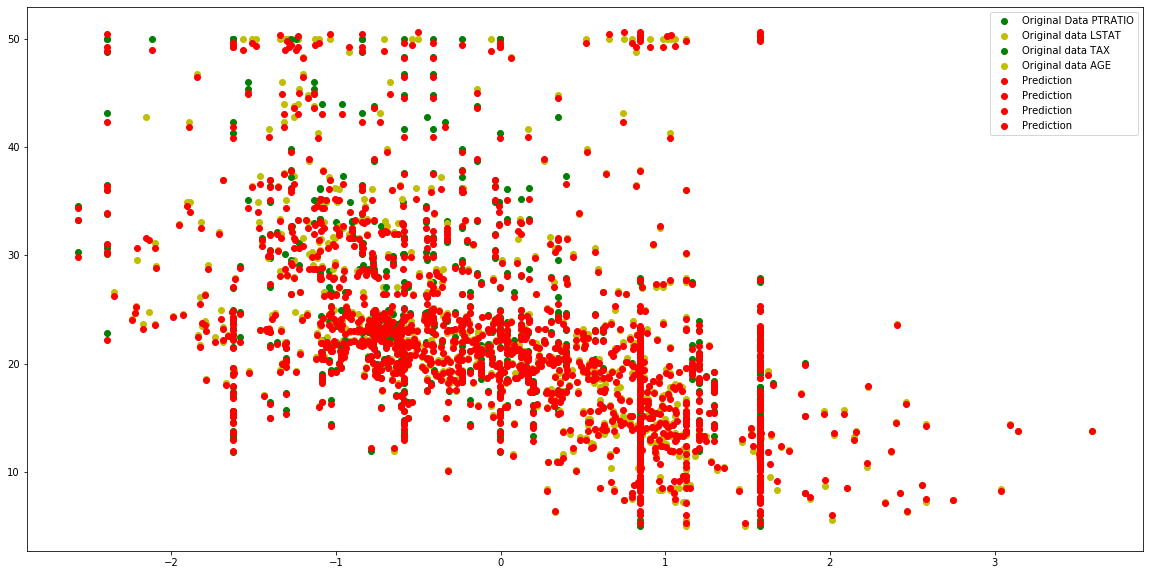

In [48]:
#Plot the data points to see how much overlap exists 

plt.plot(inputs4['PTRATIO'], output4, 'go', label='Original Data PTRATIO')
plt.plot(inputs4['LSTAT'], output4, 'yo', label='Original data LSTAT')
plt.plot(inputs4['TAX'], output4, 'go', label='Original data TAX')
plt.plot(inputs4['AGE'], output4, 'yo', label='Original data AGE')

plt.plot(inputs4, r_3, 'ro', label='Prediction')


plt.legend()
plt.show()

It appears the addition of further parameters has been successful in creating a model where combined, they influence the prediction to produce better results. The MSE loss has reduced under 1, the keras .evauation has reduced again, the R<sup>2</sup> value is over 99%. I am am still somewhat wary of the R<sup>2</sup> value, however reviewing the raw data results and the plot above, I seems that the model is performing reasonably well even if it took 10k epochs to drive the MSE down under 1. 

## Conclusion

In conclusion, the Boston House Price Data set (1978) has been reviewed, assessed to establish that the price of homes by the Charles River have a higher median price and appear to be influenced by their location. I have created a Keras generated neural network to estimate the MEDV (median price) from a number of known parameters. Parameters can now be fed into the neural network and a predicted/estimated MEDV returned. 

## End

--------------------------------

# Back up

# RAD vs TAX relationship

-----------------------------

Firstly I built a function to split out data and allow me to review for trends before deciding which characteristics to choose for predictions.

The function is based on the below principles:

That the unique groupigns can be identified easily using .unique(),
`df1.RAD.unique()` 


and each group then separated for further analysis.
`df_rad1 = ((df1[df1['RAD'] == "4"]))`

The first review was for RAD vs TAX based on the correlation we could see in the heat map above. 

In [49]:
def impact(rating, column_name_string1, column_name_string2, column_name_string_return):
        df_rad1 = ((df1[df1[column_name_string1] == str(rating)]))
        df_rad11 = pd.concat([df[column_name_string2], df_rad1], axis=1, sort=False)
        rad_1y = ((df_rad11[df_rad11[column_name_string1] == True]).drop([column_name_string1], axis=1))
        rad_1y1 = rad_1y.values
        #len_1x = len(rad_1y)
        rad_1x = []
        i = 0
        while i<len(rad_1y):
            i=i+1
            rad_1x.append(rating)
        return df_rad1[column_name_string_return]
    
#####################################

run1 = impact(1, 'RAD', 'TAX', 'TAX')
run2 = impact(2, 'RAD', 'TAX', 'TAX')
run3 = impact(3, 'RAD', 'TAX', 'TAX')
run4 = impact(4, 'RAD', 'TAX', 'TAX')
run5 = impact(5, 'RAD', 'TAX', 'TAX')
run6 = impact(6, 'RAD', 'TAX', 'TAX')
run7 = impact(7, 'RAD', 'TAX', 'TAX')
run8 = impact(8, 'RAD', 'TAX', 'TAX')
run9 = impact(24, 'RAD', 'TAX', 'TAX')

#Check point:
#print(len(rad_impact(24))+len(rad_impact(1))+ len(rad_impact(2))+ len(rad_impact(3))+ len(rad_impact(4))+ len(rad_impact(5))+ len(rad_impact(6))+ len(rad_impact(7))+ len(rad_impact(8)))

radx = pd.concat([run1, run2, run3, run4, run5, run6, run7, run8, run9], axis=1)
radx.columns=("1", "2","3" ,"4" ,"5" ,"6" ,"7" ,"8", "24")

run10 = impact(1, 'RAD', 'TAX', 'MEDV')
run11 = impact(2, 'RAD', 'TAX', 'MEDV')
run12 = impact(3, 'RAD', 'TAX', 'MEDV')
run13 = impact(4, 'RAD', 'TAX', 'MEDV')
run14 = impact(5, 'RAD', 'TAX', 'MEDV')
run15 = impact(6, 'RAD', 'TAX', 'MEDV')
run16 = impact(7, 'RAD', 'TAX', 'MEDV')
run17 = impact(8, 'RAD', 'TAX', 'MEDV')
run18 = impact(24, 'RAD', 'TAX', 'MEDV')

#Check point:
#print(len(rad_impact(24))+len(rad_impact(1))+ len(rad_impact(2))+ len(rad_impact(3))+ len(rad_impact(4))+ len(rad_impact(5))+ len(rad_impact(6))+ len(rad_impact(7))+ len(rad_impact(8)))

radx_2 = pd.concat([run10, run11, run12, run13, run14, run15, run16, run17, run18], axis=1)
radx_2.columns=("1", "2","3" ,"4" ,"5" ,"6" ,"7" ,"8", "24")

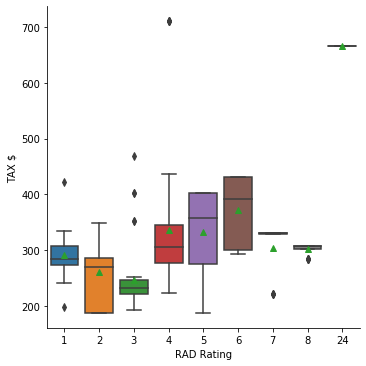

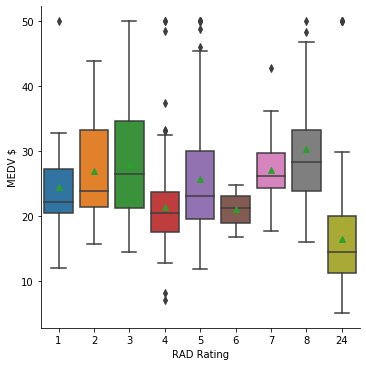

In [50]:
ax = sns.catplot(kind="box",data=radx, showmeans=True)
ax.set(xlabel='RAD Rating', ylabel='TAX $')

ay = sns.catplot(kind="box",data=radx_2, showmeans=True)
ay.set(xlabel='RAD Rating', ylabel='MEDV $')


In [51]:
radx1 = radx.astype(float)
radx2 = radx1.mean(axis=0, skipna=True)
rad_mean = pd.DataFrame(radx2).T
rad_mean.columns=("1 (mean)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)")
rx1 = ["1 (mean TAX)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)"]
ry1 = rad_mean.iloc[0,:]
round(rad_mean, 3)

,1 (mean),2 (mean),3 (mean),4 (mean),5 (mean),6 (mean),7 (mean),8 (mean),24 (mean)
0,291.45,260.667,246.079,335.982,331.843,372.885,304.412,301.25,666.0


In [52]:
radx1 = radx_2.astype(float)
radx2 = radx1.mean(axis=0, skipna=True)
rad_mean = pd.DataFrame(radx2).T
rad_mean.columns=("1 (mean)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)")
rx2 = ["1 (mean MEDV)", "2 (mean)","3 (mean)" ,"4 (mean)" ,"5 (mean)" ,"6 (mean)" ,"7 (mean)" ,"8 (mean)", "24 (mean)"]
ry2 = rad_mean.iloc[0,:]
round(rad_mean, 3)

,1 (mean),2 (mean),3 (mean),4 (mean),5 (mean),6 (mean),7 (mean),8 (mean),24 (mean)
0,24.365,26.833,27.929,21.387,25.707,20.977,27.106,30.358,16.404


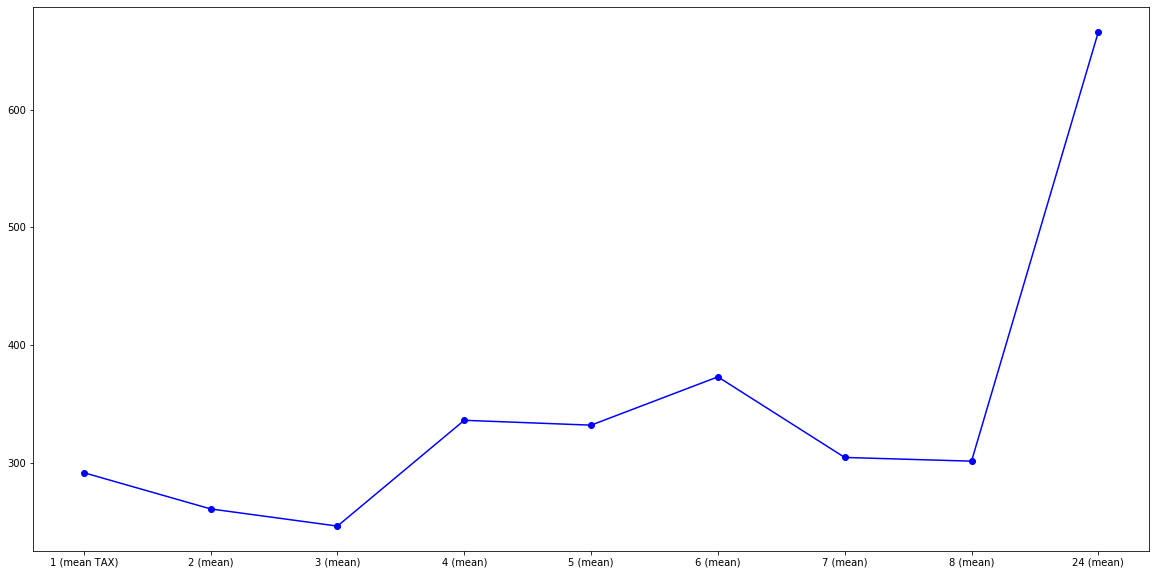

In [53]:
plt.plot(rx1, ry1, '-bo')

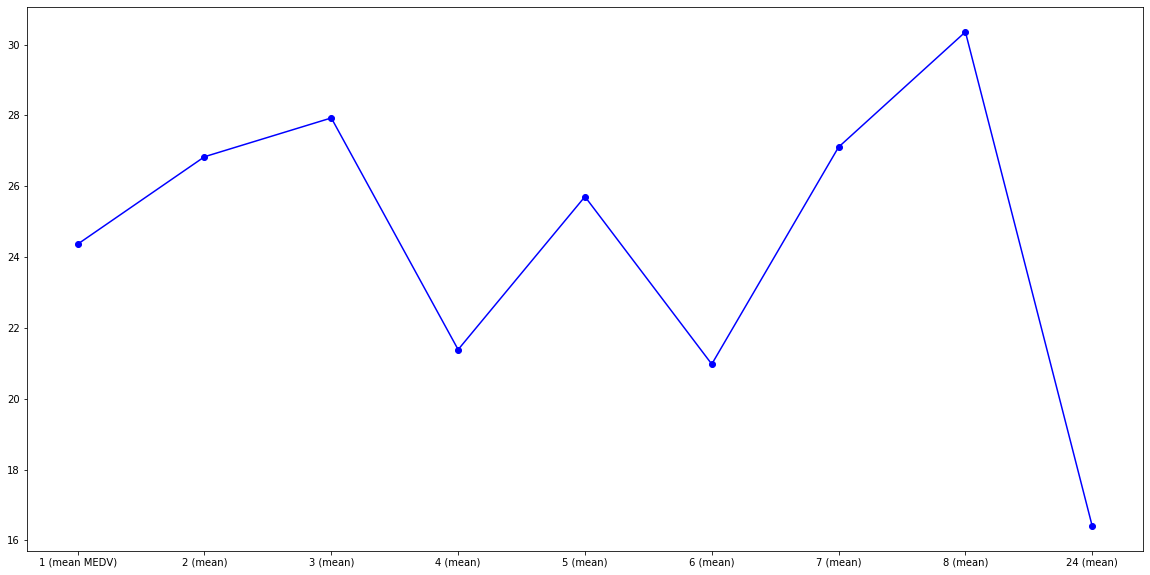

In [54]:
plt.plot(rx2, ry2, '-bo')

In [55]:
df_rad24 = ((df[df['RAD'] == 24]))  
df_rad24

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
356,8.98296,0.0,18.1,1.0,0.770,6.212,97.4,2.1222,24.0,666.0,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0.0,0.770,6.112,81.3,2.5091,24.0,666.0,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0.0,0.770,6.398,88.0,2.5182,24.0,666.0,20.2,374.56,7.79,25.0
361,3.83684,0.0,18.1,0.0,0.770,6.251,91.1,2.2955,24.0,666.0,20.2,350.65,14.19,19.9
362,3.67822,0.0,18.1,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19,20.8
363,4.22239,0.0,18.1,1.0,0.770,5.803,89.0,1.9047,24.0,666.0,20.2,353.04,14.64,16.8
364,3.47428,0.0,18.1,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
365,4.55587,0.0,18.1,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5


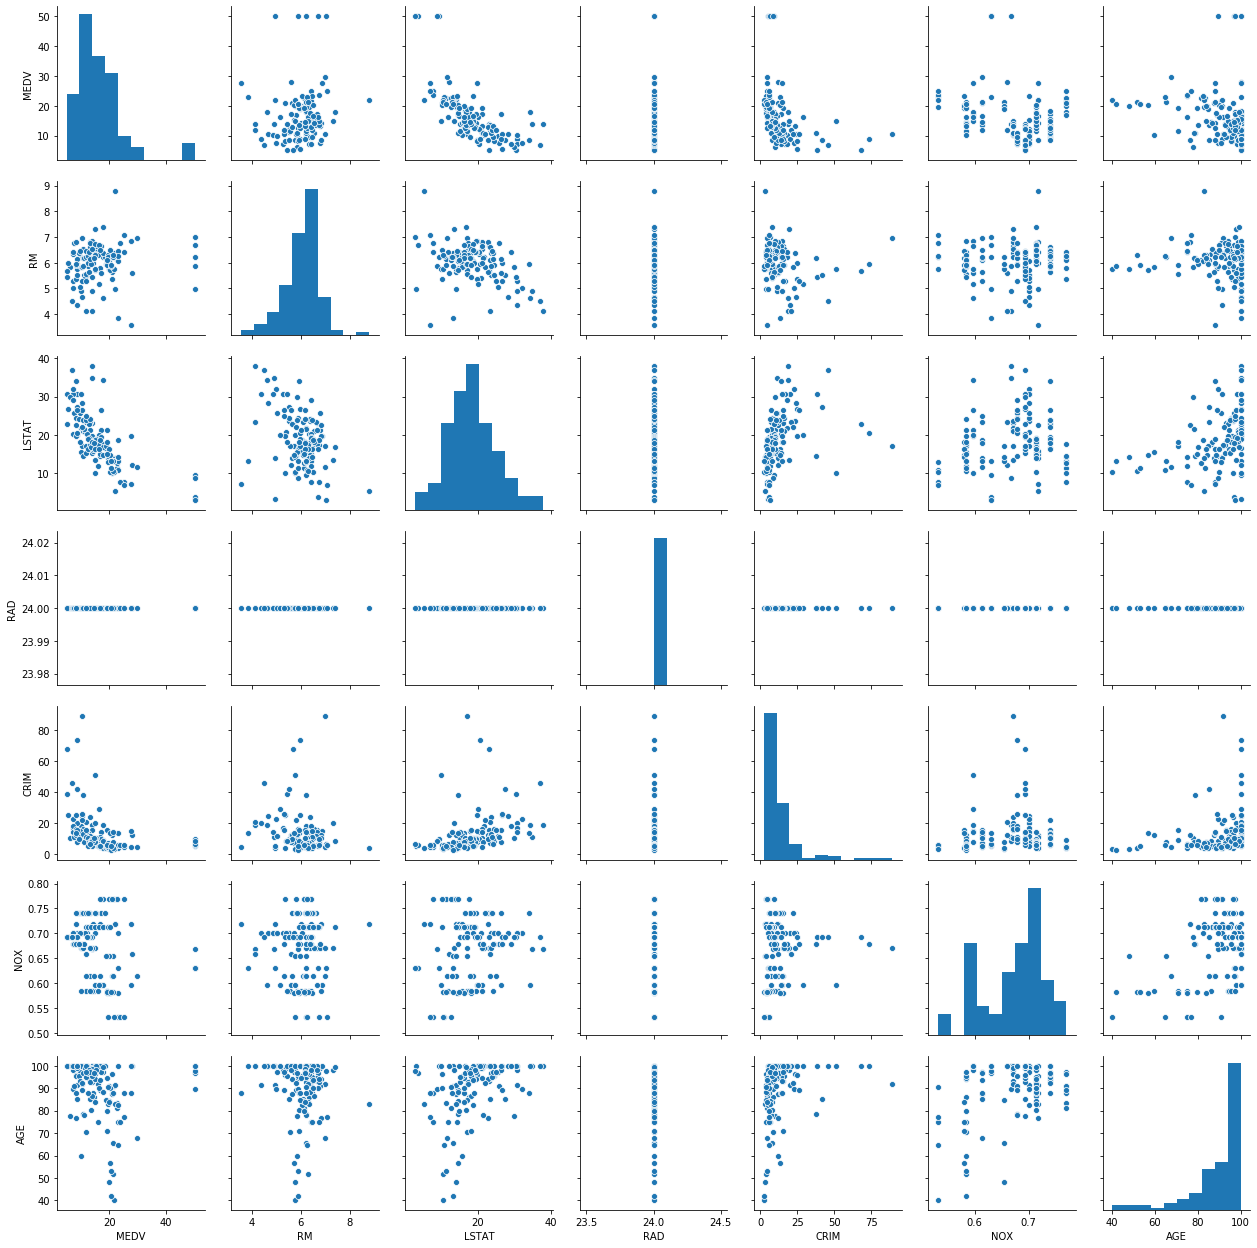

In [57]:
sns.pairplot(df_rad24[['MEDV', 'RM','LSTAT', 'RAD', 'CRIM', 'NOX', 'AGE']]) #create grid of plots where each variable is compared and colours determine the property type 

#Source:https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [58]:
run9 = impact(24, 'RAD', 'TAX', 'TAX')

run18 = impact(24, 'RAD', 'TAX', 'MEDV')

run19 = impact(24, 'RAD', 'CRIM', 'MEDV')

radx_2 = pd.concat([run9, run18], axis=1)